# 클러스터링 분석

## K-means, GMM, Spectral, HDBSCAN 클러스터링 적용

## XAI 해석 (SHAP, LIME, Permutation Importance 적용)

### 사용할 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
# macOS에서 한글 폰트 설정
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스(-)가 깨질 수 있는 것을 방지함
plt.rcParams['axes.unicode_minus'] = False


### 데이터 불러오기 (window별 데이터)

In [3]:
# 절대경로로 불러옴
df_2020_2022 = pd.read_csv("../csv/financial_data_window_2020_2022.csv")
df_2021_2023 = pd.read_csv("../csv/financial_data_window_2021_2023.csv")
df_2022_2024 = pd.read_csv("../csv/financial_data_window_2022_2024.csv")

# 기업명을 따로 저장한 후, feature만 따로 분리함
company_2020_2022 = df_2020_2022['기업명_그룹']
company_2021_2023 = df_2021_2023['기업명_그룹']
company_2022_2024 = df_2022_2024['기업명_그룹']
X_raw_2020_2022 = df_2020_2022.drop(columns=["기업명_그룹"])
X_raw_2021_2023 = df_2021_2023.drop(columns=["기업명_그룹"])
X_raw_2022_2024 = df_2022_2024.drop(columns=["기업명_그룹"])

X_raw_2020_2022

매출액          영업이익        당기순이익          자산총계           자본총계  \
0     70985.166667   2197.000000  1664.000000  2.733767e+04    8672.000000   
1     65153.666667  10667.500000  7884.333333  1.302548e+06  104070.666667   
2    372903.000000  19360.833333  6464.000000  4.477637e+05  169206.666667   
3    116434.333333   3747.500000  1749.333333  9.451867e+04   40292.666667   
4    278437.666667  15670.833333  8298.833333  2.822718e+05  110611.666667   
..             ...           ...          ...           ...            ...   
186  169082.333333  11569.000000  8470.166667  4.893132e+05   72241.666667   
187   42520.500000    478.666667  -632.833333  2.837017e+04    5662.000000   
188   32839.500000   1189.833333   368.333333  4.304900e+04   10586.666667   
189   81669.500000   5808.000000  3736.166667  4.139467e+04   14648.500000   
190    4760.000000    725.333333   670.833333  7.623500e+03    3430.166667   

         자본금      영업활동현금흐름         이자발생부채      영업이익률       순이익률     ROE(%)  \
0      173.0   5791.166667    7519.166667   3.071667   2.326667  20.556667   
1    16297.0  13934.833333  188141.666667  16.550000  12.281667   8.033333   
2     1790.0  36457.000000  181936.166667   5.175000   1.726667   4.171667   
3     1141.0   5215.333333   32803.333333   3.213333   1.496667   3.723333   
4      819.0  17094.166667  106516.166667   5.633333   3.008333  10.466667   
..       ...           ...            ...        ...        ...        ...   
186    447.0   9939.333333   11728.833333   7.235000   5.293333  13.046667   
187   2000.0   1157.333333   16159.000000   0.873333  -1.751667  -9.115000   
188    466.0    677.500000   14398.833333   3.580000   1.130000   2.238333   
189    216.0   4552.666667   14565.000000   7.075000   4.560000  30.030000   
190    467.5    817.166667    2791.166667  13.891667  12.106667  19.770000   

        ROA(%)         부채비율        EPS(원)     PER(배)         BPS(원)    PBR(배)  \
0     6.370000   216.680000   9629.666667  18.258333   50201.166667  3.486667   
1     0.630000  1150.475000   2278.500000   3.096667   29234.333333  0.236667   
2     1.501667   164.290000   5808.000000  17.345000  150724.833333  0.565000   
3     1.875000   134.561667   5678.333333  28.503333  176992.666667  0.658333   
4     3.048333   154.990000  37635.166667  10.200000  392853.166667  0.983333   
..         ...          ...           ...        ...            ...       ...   
186   1.703333   665.428333   9474.166667   3.616667   91999.166667  0.303333   
187  -2.041667   402.983333  -1582.166667   3.356680   14950.833333  5.455000   
188   0.911667   305.755000   2210.333333  34.394582  101515.833333  0.678333   
189  10.281667   193.871667  65943.333333  67.425000  274582.666667  1.400000   
190   9.141667   121.613333    603.500000  55.366667    3134.500000  5.115000   

      발행주식수(보통주)  
0     17283906.0  
1    325935246.0  
2     29176998.0  
3     22812344.0  
4     15054186.0  
..           ...  
186   89400000.0  
187   39248121.0  
188    9324548.0  
189    4327682.0  
190   96406064.0  

[191 rows x 18 columns]

## 다중공선성 확인

### Window: 2020 ~ 2022

In [4]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_raw_2020_2022)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

Feature        VIF
3        당기순이익  23.237646
2         영업이익  22.286116
5         자본총계  12.369585
14      EPS(원)   8.917612
1          매출액   8.309715
16      BPS(원)   8.092324
4         자산총계   7.685596
8       이자발생부채   6.880909
0        const   5.326411
6          자본금   5.025774
11      ROE(%)   4.545957
18  발행주식수(보통주)   4.165631
12      ROA(%)   3.990016
9        영업이익률   3.165976
13        부채비율   2.776595
7     영업활동현금흐름   2.725360
10        순이익률   2.589902
17      PBR(배)   1.370480
15      PER(배)   1.134636

In [5]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 feature들만 남긴 새로운 DataFrame 생성
X_raw_2020_2022 = X_raw_2020_2022[valid_features]


### Window: 2021 ~ 2023

In [6]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_raw_2021_2023)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

Feature        VIF
2         영업이익  31.819736
3        당기순이익  30.261065
5         자본총계  13.197567
1          매출액   9.038077
8       이자발생부채   7.892144
4         자산총계   7.690996
0        const   5.888997
6          자본금   4.701214
12      ROA(%)   4.012625
18  발행주식수(보통주)   3.956254
14      EPS(원)   3.796829
7     영업활동현금흐름   3.624800
11      ROE(%)   3.541834
13        부채비율   3.283663
16      BPS(원)   3.055135
9        영업이익률   2.126059
10        순이익률   1.683406
17      PBR(배)   1.596223
15      PER(배)   1.410688

In [7]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 feature들만 남긴 새로운 DataFrame 생성
X_raw_2021_2023 = X_raw_2021_2023[valid_features]


### Window: 2022 ~ 2024

In [8]:
# 상수항 추가 (VIF 계산 시 필요)
X_with_const = sm.add_constant(X_raw_2022_2024)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# 결과 확인
vif_data.sort_values("VIF", ascending=False)

Feature        VIF
2         영업이익  32.017576
3        당기순이익  28.701173
5         자본총계  15.183636
1          매출액  12.047871
8       이자발생부채   8.734619
4         자산총계   7.836410
12      ROA(%)   7.623210
11      ROE(%)   5.614654
0        const   5.508169
14      EPS(원)   5.285805
6          자본금   4.632521
16      BPS(원)   4.361176
13        부채비율   4.240969
18  발행주식수(보통주)   3.908226
7     영업활동현금흐름   3.337653
9        영업이익률   3.311558
17      PBR(배)   1.716288
10        순이익률   1.646942
15      PER(배)   1.383444

In [9]:
# 'const' 제외하고 VIF ≤ 10 인 피처만 선택
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# 해당 feature들만 남긴 새로운 DataFrame 생성
X_raw_2022_2024 = X_raw_2022_2024[valid_features]


### featurer scaling 수행

In [10]:
# StandardScaler로 정규화한다.
scaler = StandardScaler()
X_scaled_2020_2022 = scaler.fit_transform(X_raw_2020_2022)
X_scaled_2021_2023 = scaler.fit_transform(X_raw_2021_2023)
X_scaled_2022_2024 = scaler.fit_transform(X_raw_2022_2024)
# X_scaled 데이터를 DataFrame으로 변환
X_scaled_df_2020_2022 = pd.DataFrame(X_scaled_2020_2022, columns=X_raw_2020_2022.columns)
X_scaled_df_2021_2023 = pd.DataFrame(X_scaled_2021_2023, columns=X_raw_2021_2023.columns)
X_scaled_df_2022_2024 = pd.DataFrame(X_scaled_2022_2024, columns=X_raw_2022_2024.columns)



### 클러스터링 적용 및 평가 함수 정의

In [11]:
# 클러스터링 성능 평가 함수를 정의함 
# Silhouette Score를 사용함
def evaluate_clustering(model, X, labels=None):
    if (labels is None):
        labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return labels, score

In [62]:
col_map = {
    '매출액': 'Revenue',
    '자산총계': 'Total Assets',
    '자본금': 'Paid-in Capital',
    '영업활동현금흐름': 'Operating Cash Flow',
    '이자발생부채': 'Interest-bearing Debt',
    '영업이익률': 'Operating Margin',
    '순이익률': 'Net Profit Margin',
    'ROE(%)': 'Return on Equity (ROE)',
    'ROA(%)': 'Return on Assets (ROA)',
    '부채비율': 'Debt-to-Equity Ratio',
    'EPS(원)': 'Earnings per Share (EPS)',
    'PER(배)': 'Price-to-Earnings Ratio (P/E)',
    'BPS(원)': 'Book Value per Share (BPS)',
    'PBR(배)': 'Price-to-Book Ratio (P/B)',
    '발행주식수(보통주)': 'Common Shares Outstanding'
}

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2020-2022)

In [83]:
X_scaled_df_2020_2022 = X_scaled_df_2020_2022.rename(columns=col_map)

Best K for KMeans (lowest DBI): 26 -> DBI = 0.7244
Best K for GMM (lowest DBI): 26 -> DBI = 0.7265
Best K for Spectral Clustering (lowest DBI): 26 -> DBI = 1.4014


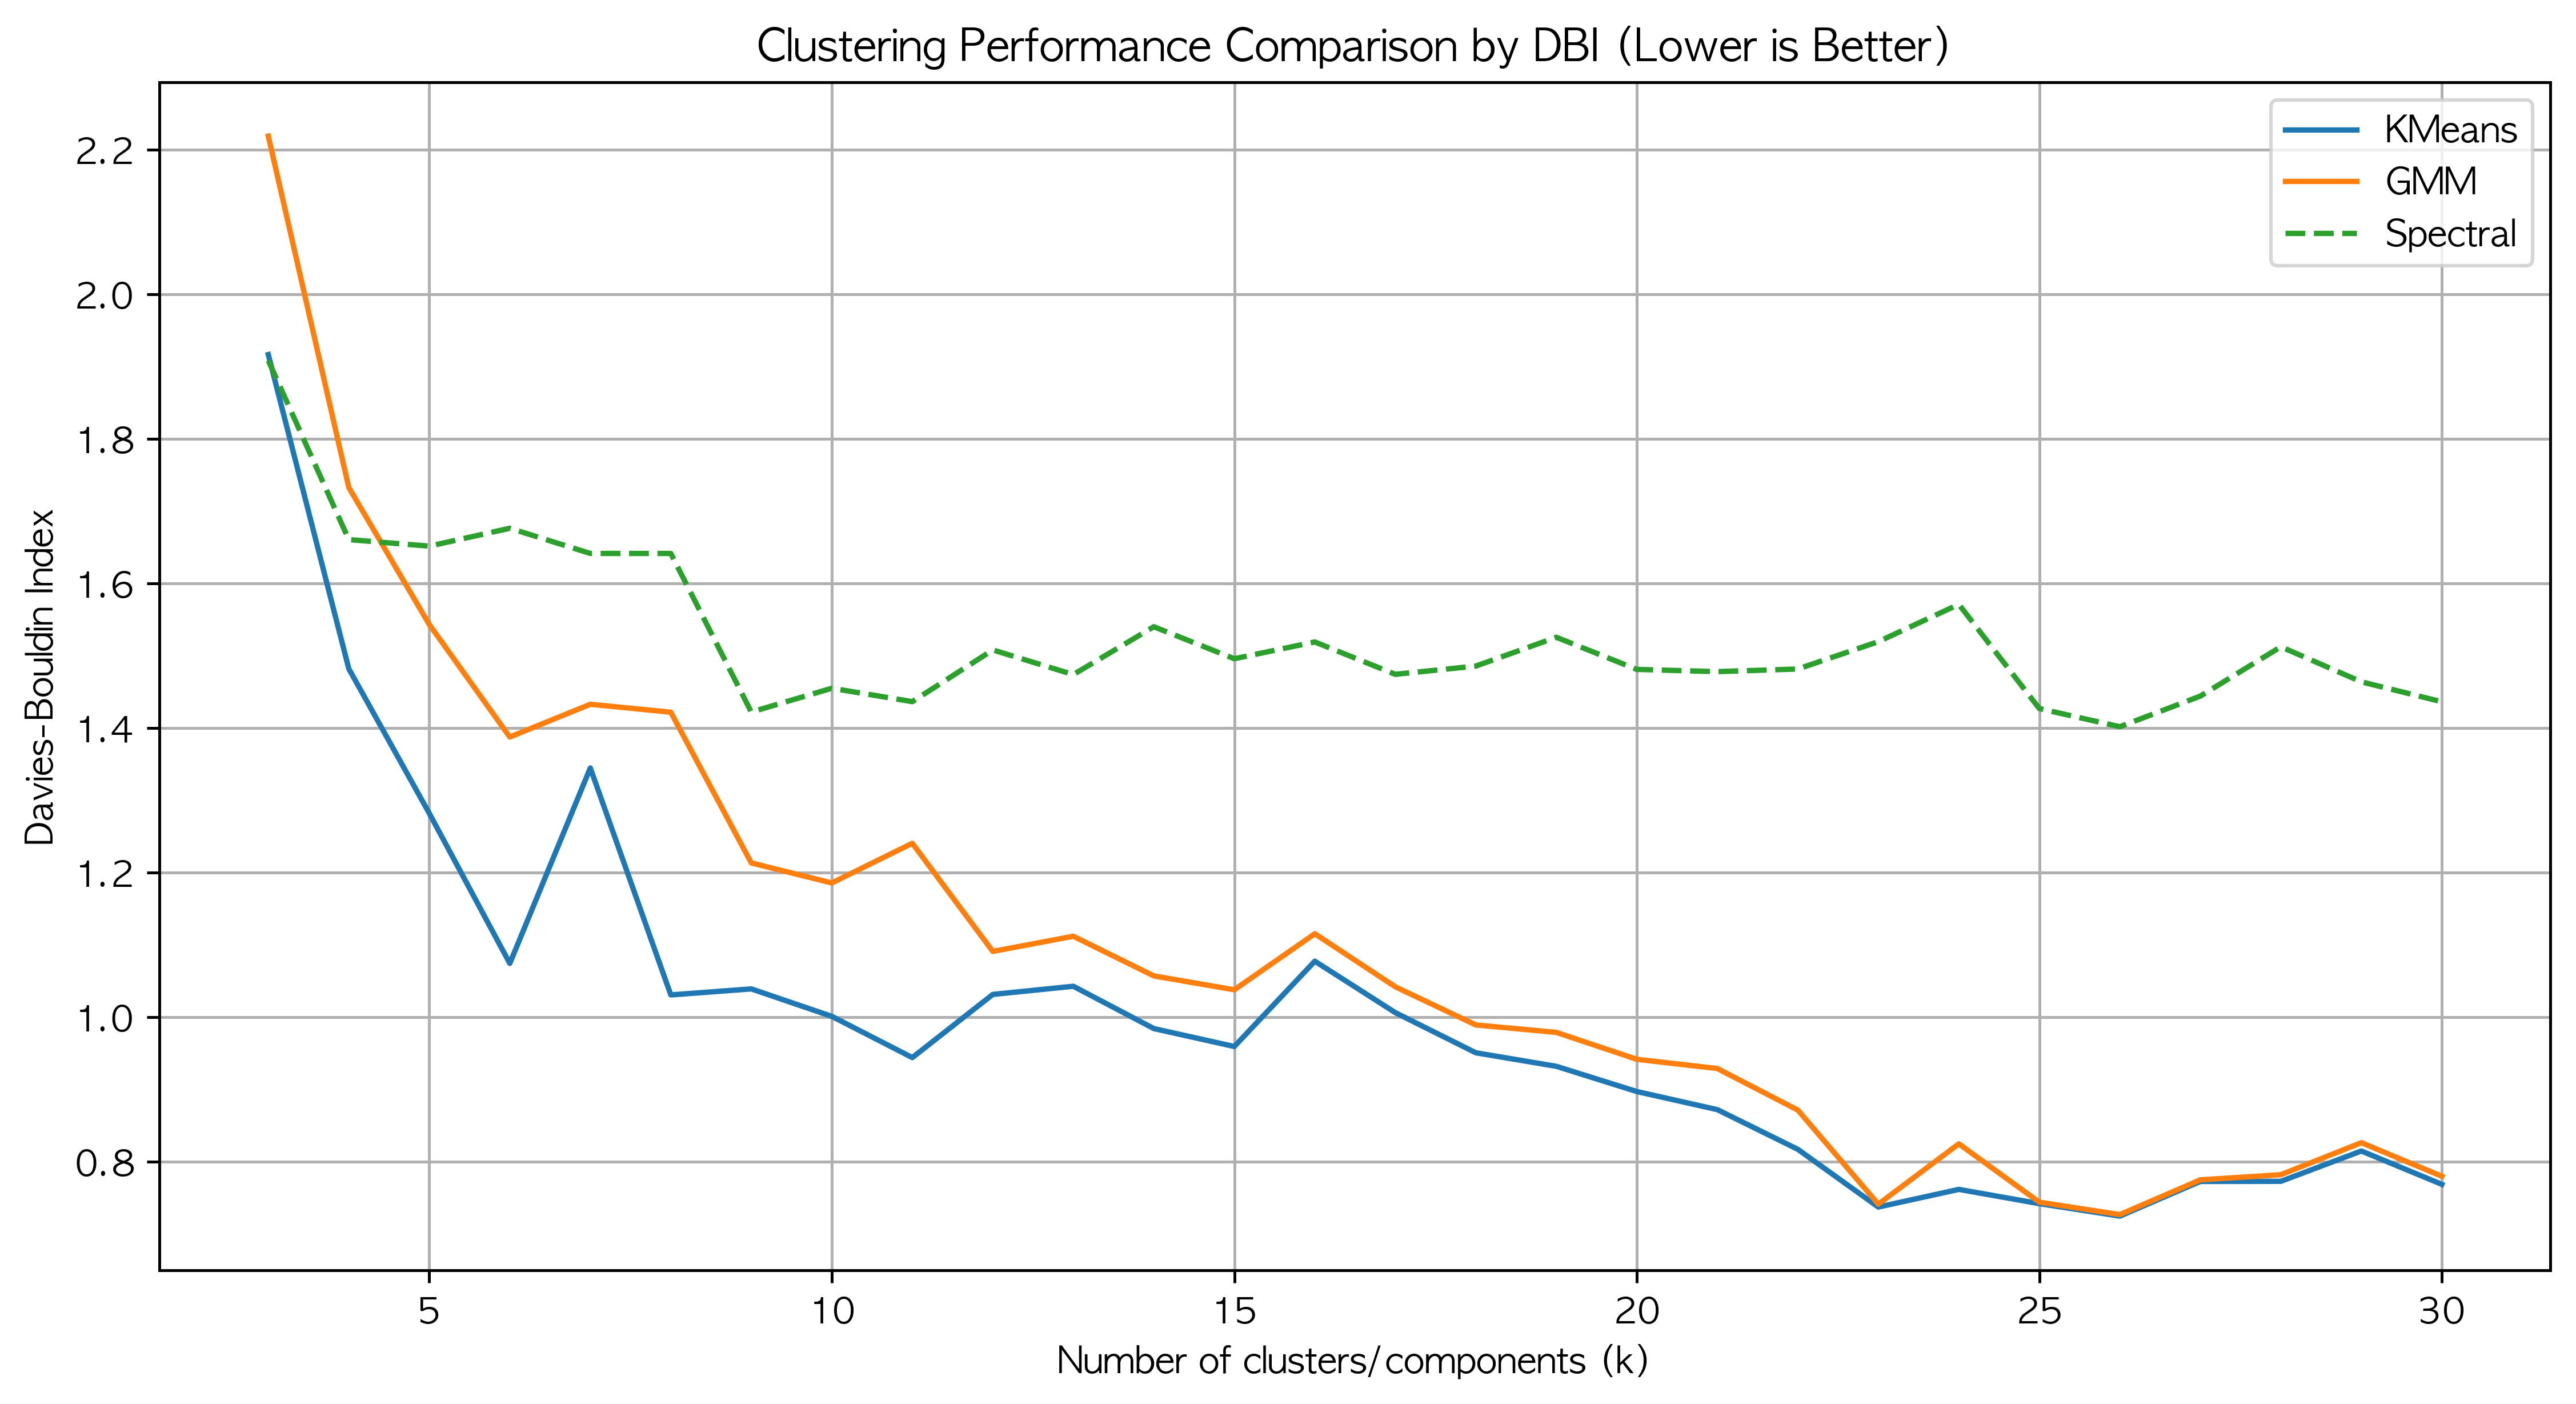

In [84]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2020_2022 = kmeans.fit_predict(X_scaled_2020_2022)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2020_2022, kmeans_labels_2020_2022))
    labels_kmeans_all[k] = kmeans_labels_2020_2022

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2020_2022 = gmm.fit_predict(X_scaled_df_2020_2022)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2020_2022, gmm_labels_2020_2022))
    labels_gmm_all[k] = gmm_labels_2020_2022

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2020_2022 = spectral.fit_predict(X_scaled_df_2020_2022)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2020_2022, spectral_labels_2020_2022))
        labels_spectral_all[k] = spectral_labels_2020_2022

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6), dpi = 450)
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.savefig('../plots/clustering_dbi_2020_2022.png')
plt.show()


### SHAP 분석

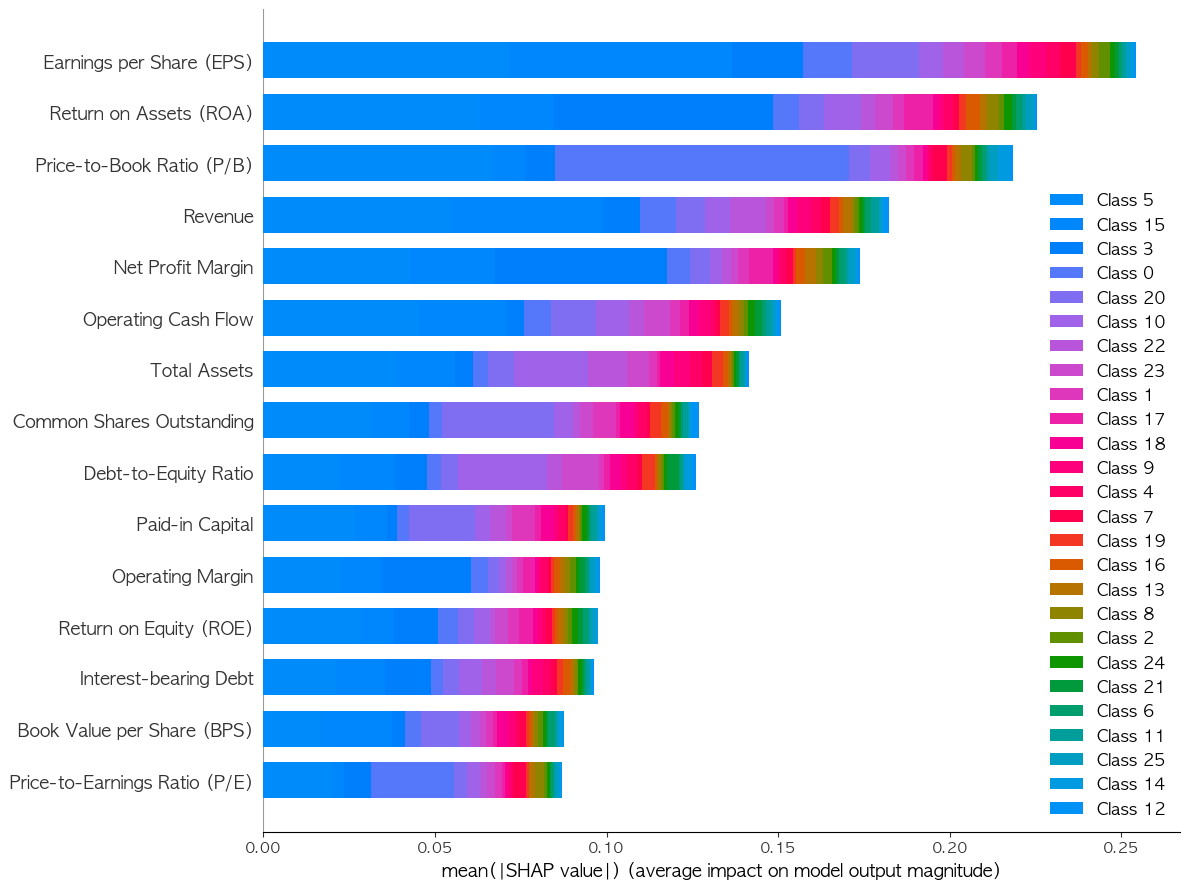

실제 사용된 클러스터 수: 26


In [85]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2020_2022 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2020_2022 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2020_2022 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2020_2022['Cluster'] = final_labels_2020_2022

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2020_2022, final_labels_2020_2022)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2020_2022 = explainer.shap_values(X_scaled_df_2020_2022)

# ✅ summary plot
shap.summary_plot(shap_values_2020_2022, X_scaled_df_2020_2022, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.savefig("../plots/shap_2020_2022.png")
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2020_2022)))


### 각 클러스터 별, 클러스터 형성에 큰 영향을 미쳤던 Feature

In [14]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2020_2022 = {}
unique_clusters_2020_2022 = np.unique(final_labels_2020_2022)

for cluster_id in unique_clusters_2020_2022:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2020_2022 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2020_2022[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2020_2022.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2020_2022[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2020_2022.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2020_2022:
    shap_arr = cluster_shap_means_2020_2022[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2020_2022.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2020_2022.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2020_2022:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


Class 0   Class 1   Class 2   Class 3   Class 4   Class 5  \
매출액         0.037998  0.005006  0.002017  0.006755  0.010786  0.006428   
자산총계        0.019961  0.000250  0.000225  0.002032  0.006762  0.002046   
자본금         0.013680  0.008617  0.002270  0.001952  0.003593  0.001733   
영업활동현금흐름    0.031038  0.011333  0.004609  0.003009  0.008128  0.004148   
이자발생부채      0.014447  0.003693  0.000876  0.002251  0.006360  0.001690   
영업이익률       0.012976  0.001963  0.000673  0.004961  0.002406  0.003891   
순이익률        0.017621  0.002513  0.000192  0.007993  0.002279  0.005442   
ROE(%)      0.021367  0.004993  0.002384  0.006725  0.000766  0.003139   
ROA(%)      0.028599  0.001605  0.005307  0.013234  0.002593  0.002807   
부채비율        0.018540  0.000942  0.002656  0.002854  0.006501  0.001805   
EPS(원)      0.051958  0.011202  0.016840  0.015941  0.008899  0.007390   
PER(배)      0.102325  0.009666  0.012610  0.017871  0.008720  0.019153   
BPS(원)      0.022432  0.002606  0.004641  0.002590  0.001491  0.002339   
PBR(배)      0.370296  0.049073  0.047153  0.044652  0.038509  0.064447   
발행주식수(보통주)  0.016409  0.012083  0.001990  0.002928  0.004494  0.001754   

             Class 6   Class 7   Class 8   Class 9  ...  Class 16  Class 17  \
매출액         0.021280  0.005847  0.020048  0.010413  ...  0.012036  0.005015   
자산총계        0.002512  0.023855  0.000706  0.003175  ...  0.002080  0.001726   
자본금         0.000225  0.003534  0.002679  0.003140  ...  0.002348  0.010666   
영업활동현금흐름    0.006515  0.004669  0.003842  0.009427  ...  0.007250  0.005427   
이자발생부채      0.001592  0.009529  0.021452  0.003475  ...  0.001620  0.003045   
영업이익률       0.001648  0.001989  0.020355  0.002444  ...  0.003741  0.009105   
순이익률        0.003687  0.001832  0.037989  0.003258  ...  0.008800  0.013602   
ROE(%)      0.007550  0.009309  0.033147  0.002171  ...  0.006109  0.016030   
ROA(%)      0.003003  0.005842  0.106896  0.002805  ...  0.012321  0.031915   
부채비율        0.005027  0.006093  0.000927  0.001932  ...  0.007140  0.005011   
EPS(원)      0.016623  0.032841  0.026064  0.012962  ...  0.014131  0.023589   
PER(배)      0.018926  0.040283  0.075170  0.007761  ...  0.009756  0.014935   
BPS(원)      0.012427  0.026983  0.022248  0.002390  ...  0.001928  0.002505   
PBR(배)      0.064128  0.141478  0.190452  0.039718  ...  0.025451  0.084758   
발행주식수(보통주)  0.001356  0.002901  0.006752  0.001684  ...  0.005366  0.003561   

            Class 18  Class 19  Class 20  Class 21  Class 22  Class 23  \
매출액         0.010767  0.009508  0.007946  0.001409  0.011764  0.008710   
자산총계        0.005357  0.005511  0.002820  0.002691  0.002271  0.007232   
자본금         0.004853  0.003265  0.005127  0.000875  0.002040  0.002762   
영업활동현금흐름    0.007953  0.007772  0.010975  0.013287  0.006792  0.011027   
이자발생부채      0.002596  0.005293  0.002560  0.002901  0.003933  0.003449   
영업이익률       0.001169  0.001054  0.004100  0.008003  0.002452  0.003790   
순이익률        0.002284  0.001387  0.007319  0.000352  0.002983  0.002321   
ROE(%)      0.000717  0.000308  0.004104  0.005887  0.002415  0.002058   
ROA(%)      0.000307  0.000727  0.003087  0.001259  0.002695  0.001641   
부채비율        0.004176  0.003685  0.002685  0.004010  0.002310  0.005717   
EPS(원)      0.007048  0.006606  0.008339  0.013285  0.008618  0.014888   
PER(배)      0.008471  0.007757  0.020616  0.007618  0.009069  0.009809   
BPS(원)      0.001946  0.000796  0.003138  0.004210  0.002081  0.000981   
PBR(배)      0.042444  0.038248  0.050344  0.054786  0.042597  0.047084   
발행주식수(보통주)  0.006193  0.004588  0.009457  0.002541  0.000885  0.001134   

            Class 24  Class 25  
매출액         0.002790  0.016828  
자산총계        0.000347  0.009890  
자본금         0.001137  0.000833  
영업활동현금흐름    0.013313  0.002025  
이자발생부채      0.000190  0.008434  
영업이익률       0.000505  0.022691  
순이익률        0.003498  0.032067  
ROE(%)      0.004547  0.045978  
ROA(%)      0.003764  0.071009  
부채비율        0.005565  0.009059  
EPS(원)      0.0


Class 0에 중요한 특성 순위:
1. PBR(배): 0.370296
2. PER(배): 0.102325
3. EPS(원): 0.051958
4. 매출액: 0.037998
5. 영업활동현금흐름: 0.031038
6. ROA(%): 0.028599
7. BPS(원): 0.022432
8. ROE(%): 0.021367
9. 자산총계: 0.019961
10. 부채비율: 0.018540
11. 순이익률: 0.017621
12. 발행주식수(보통주): 0.016409
13. 이자발생부채: 0.014447
14. 자본금: 0.013680
15. 영업이익률: 0.012976

Class 1에 중요한 특성 순위:
1. PBR(배): 0.049073
2. 발행주식수(보통주): 0.012083
3. 영업활동현금흐름: 0.011333
4. EPS(원): 0.011202
5. PER(배): 0.009666
6. 자본금: 0.008617
7. 매출액: 0.005006
8. ROE(%): 0.004993
9. 이자발생부채: 0.003693
10. BPS(원): 0.002606
11. 순이익률: 0.002513
12. 영업이익률: 0.001963
13. ROA(%): 0.001605
14. 부채비율: 0.000942
15. 자산총계: 0.000250

Class 2에 중요한 특성 순위:
1. PBR(배): 0.047153
2. EPS(원): 0.016840
3. PER(배): 0.012610
4. ROA(%): 0.005307
5. BPS(원): 0.004641
6. 영업활동현금흐름: 0.004609
7. 부채비율: 0.002656
8. ROE(%): 0.002384
9. 자본금: 0.002270
10. 매출액: 0.002017
11. 발행주식수(보통주): 0.001990
12. 이자발생부채: 0.000876
13. 영업이익률: 0.000673
14. 자산총계: 0.000225
15. 순이익률: 0.000192

Class 3에 중요한 특성 순위:
1. PBR(배): 0.044652

### 각 클러스터 별 편입 종목 확인

In [15]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2020_2022:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2020_2022[final_labels_2020_2022 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
LG에너지솔루션, SK아이이테크놀로지, 두산퓨얼셀, 삼성바이오로직스, 셀트리온, 씨에스윈드, 엘앤에프, 일진하이솔루스, 카카오페이, 코스모신소재, 포스코퓨처엠, 하이브, 한미사이언스, 한미약품, 한전기술, 호텔신라, 후성
[클러스터 1에 속한 종목들]:
LG디스플레이, 두산에너빌리티, 삼성중공업
[클러스터 2에 속한 종목들]:
태광산업
[클러스터 3에 속한 종목들]:
KT&G, LG, OCI홀딩스, PI첨단소재, SK케미칼, 금호석유화학, 덴티움, 동서, 롯데정밀화학, 미스토홀딩스, 미원상사, 삼성전기, 삼양식품, 엔씨소프트, 영원무역, 영원무역홀딩스, 오리온, 코웨이, 크래프톤, 한미반도체, 한솔케미칼
[클러스터 4에 속한 종목들]:
KB금융, 신한지주
[클러스터 5에 속한 종목들]:
BGF리테일, CJ대한통운, DL, DL이앤씨, GS건설, GS리테일, HD한국조선해양, HD현대미포, HD현대인프라코어, HD현대일렉트릭, HL만도, KCC, LIG넥스원, LS ELECTRIC, SKC, SK네트웍스, SK스퀘어, TCC스틸, TKG휴켐스, 강원랜드, 넷마블, 녹십자, 녹십자홀딩스, 농심, 대상, 대웅, 대웅제약, 대한유화, 대한전선, 더블유게임즈, 동원시스템즈, 두산, 두산밥캣, 롯데쇼핑, 롯데웰푸드, 롯데지주, 롯데칠성, 삼성카드, 삼아알미늄, 세방전지, 세아베스틸지주, 아모레퍼시픽, 아모레퍼시픽홀딩스, 에스엘, 에스원, 오리온홀딩스, 유한양행, 율촌화학, 제일기획, 종근당, 코스맥스, 코스모화학, 코오롱인더, 포스코DX, 풍산, 하이트진로, 한국앤컴퍼니, 한국콜마, 한국타이어앤테크놀로지, 한국항공우주, 한샘, 한세실업, 한일시멘트, 한전KPS, 한화솔루션, 한화시스템, 한화에어로스페이스, 현대건설, 현대로템, 현대백화점, 현대엘리베이터, 현대위아, 효성중공업
[클러스터 6에 속한 종목들]:
GKL
[클러스터 7에 속한 종목들]:
HS효성첨단소재, 한올바이오파마
[클러스터 8에 속한 종목들]:
SK바이오팜
[클러스터 9에 

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

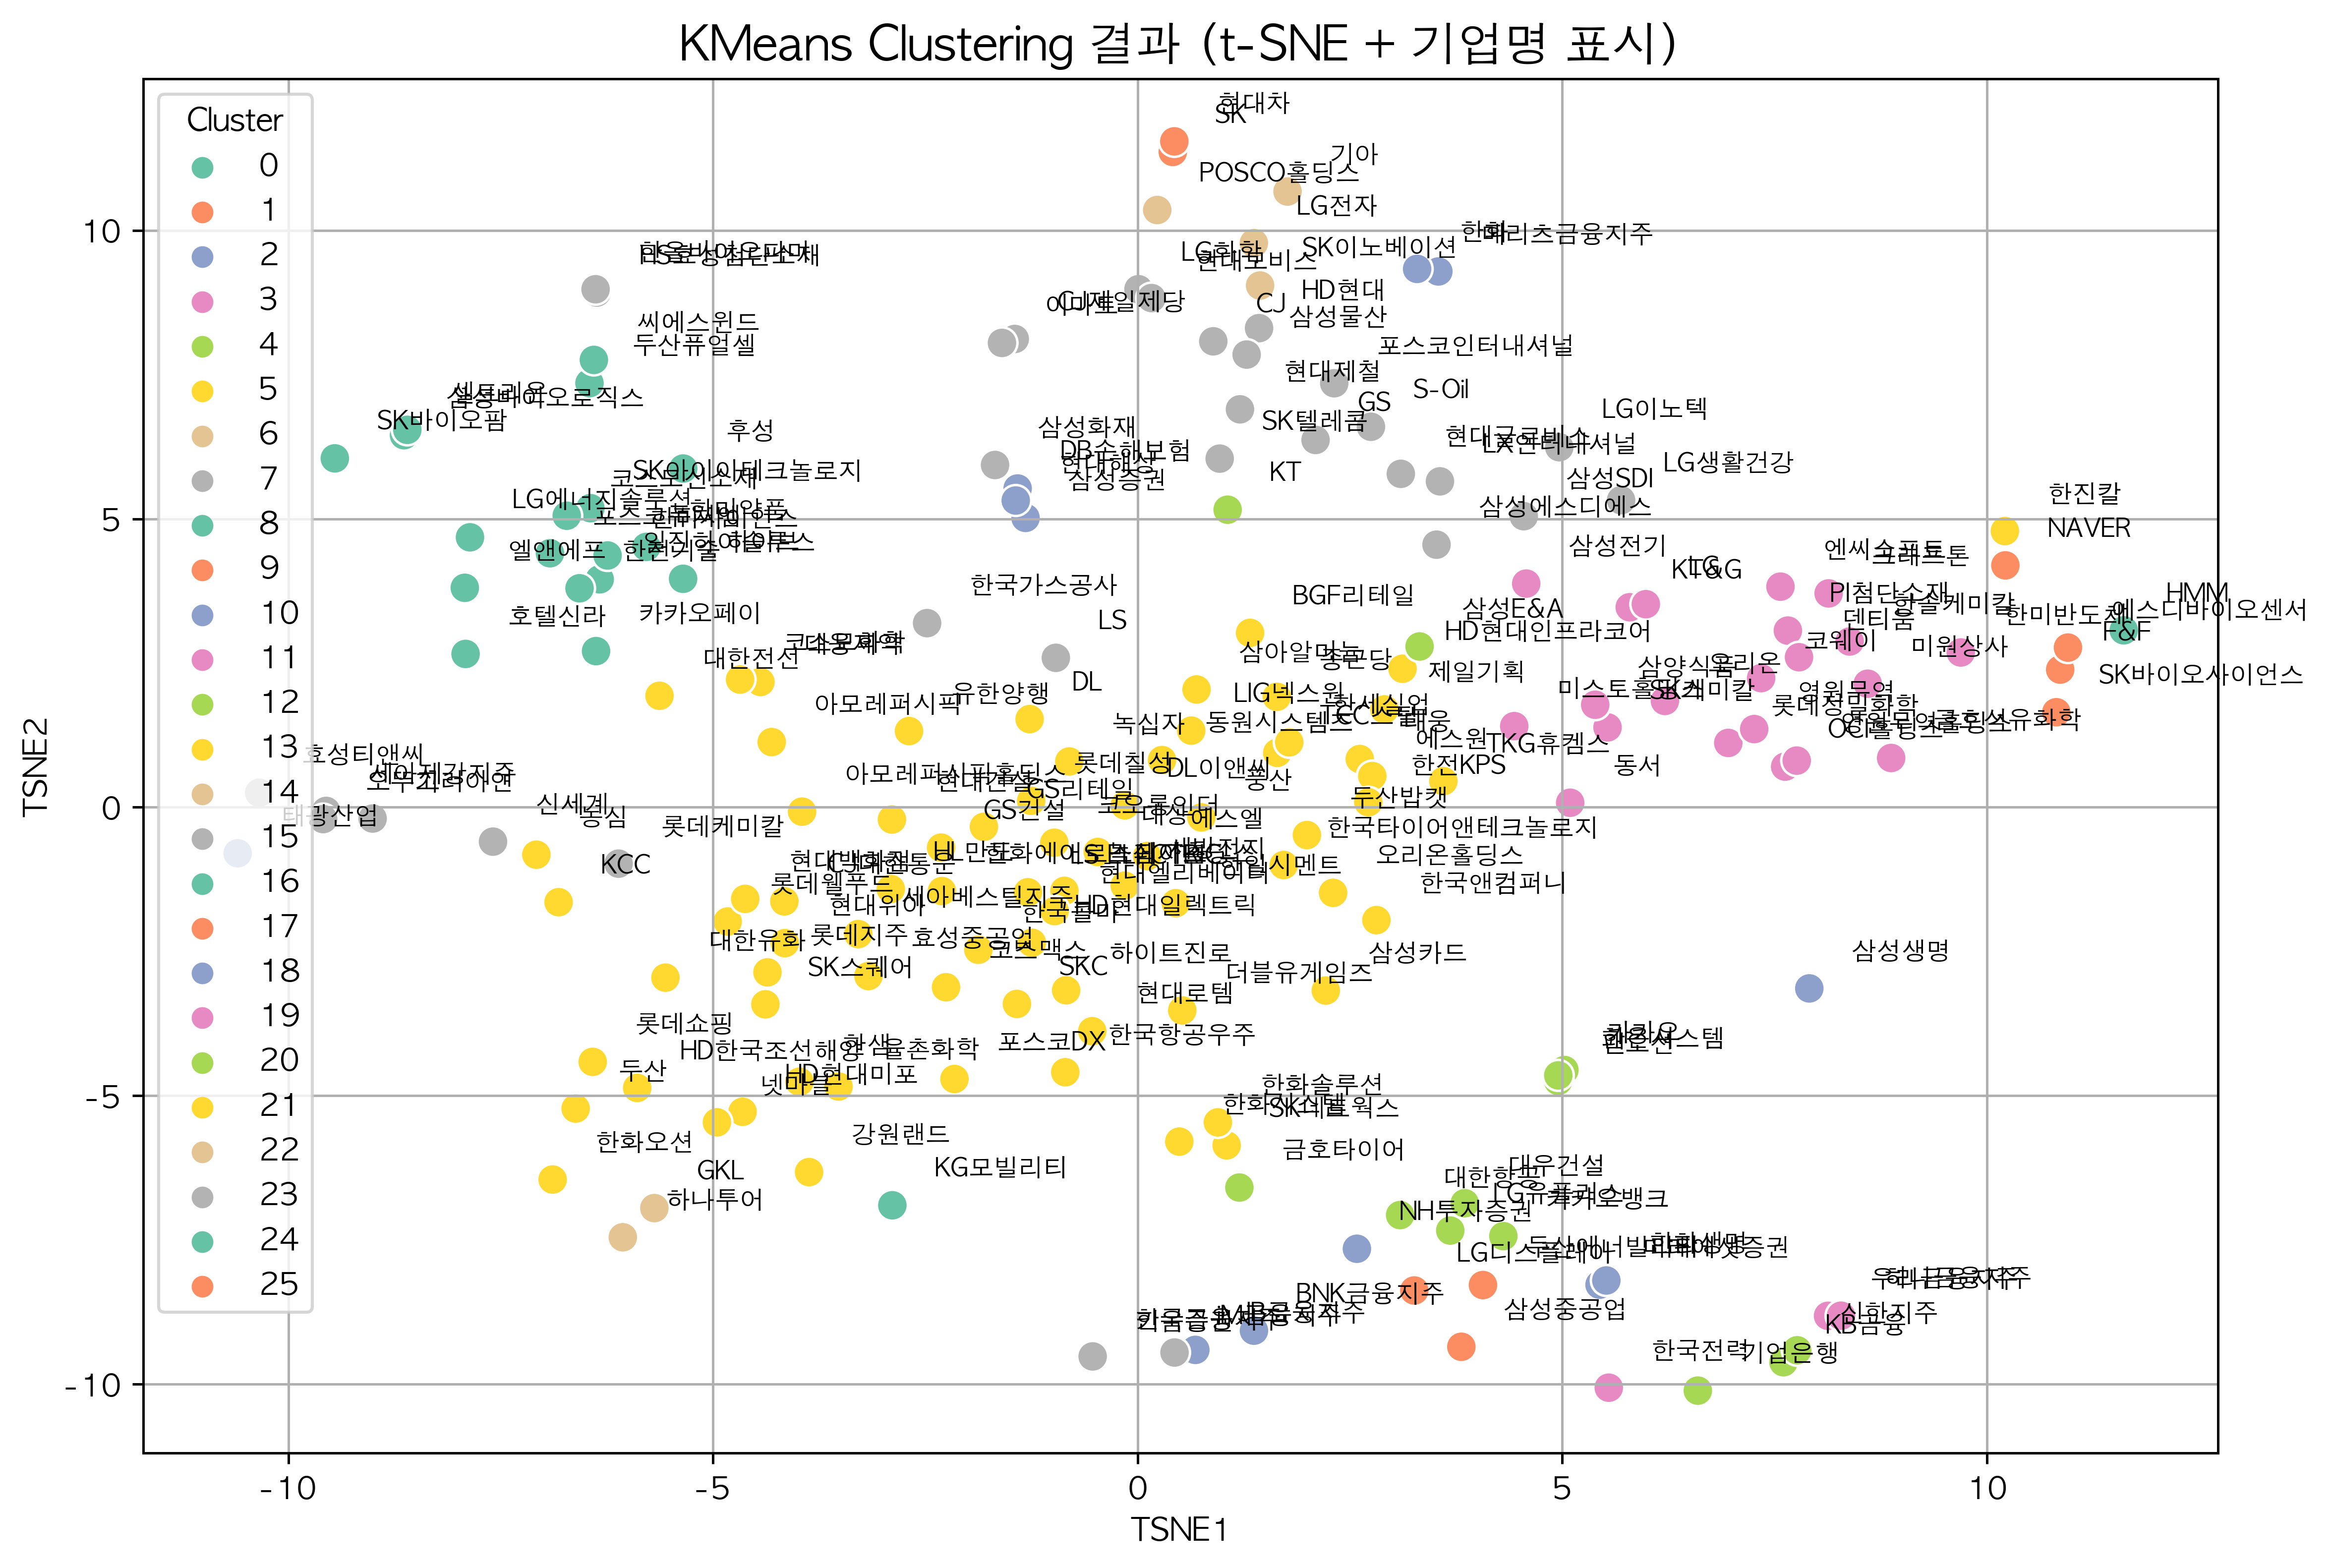

In [16]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2020_2022)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2020_2022.values,
    'Cluster': final_labels_2020_2022,  # ✅ 자동 선택된 클러스터 라벨 사용
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8), dpi = 450)
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title(f"{best_method} Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2021-2023)

In [78]:
X_scaled_df_2021_2023 = X_scaled_df_2021_2023.rename(columns = col_map)

Best K for KMeans (lowest DBI): 30 -> DBI = 0.8024
Best K for GMM (lowest DBI): 30 -> DBI = 0.8020
Best K for Spectral Clustering (lowest DBI): 24 -> DBI = 1.3787


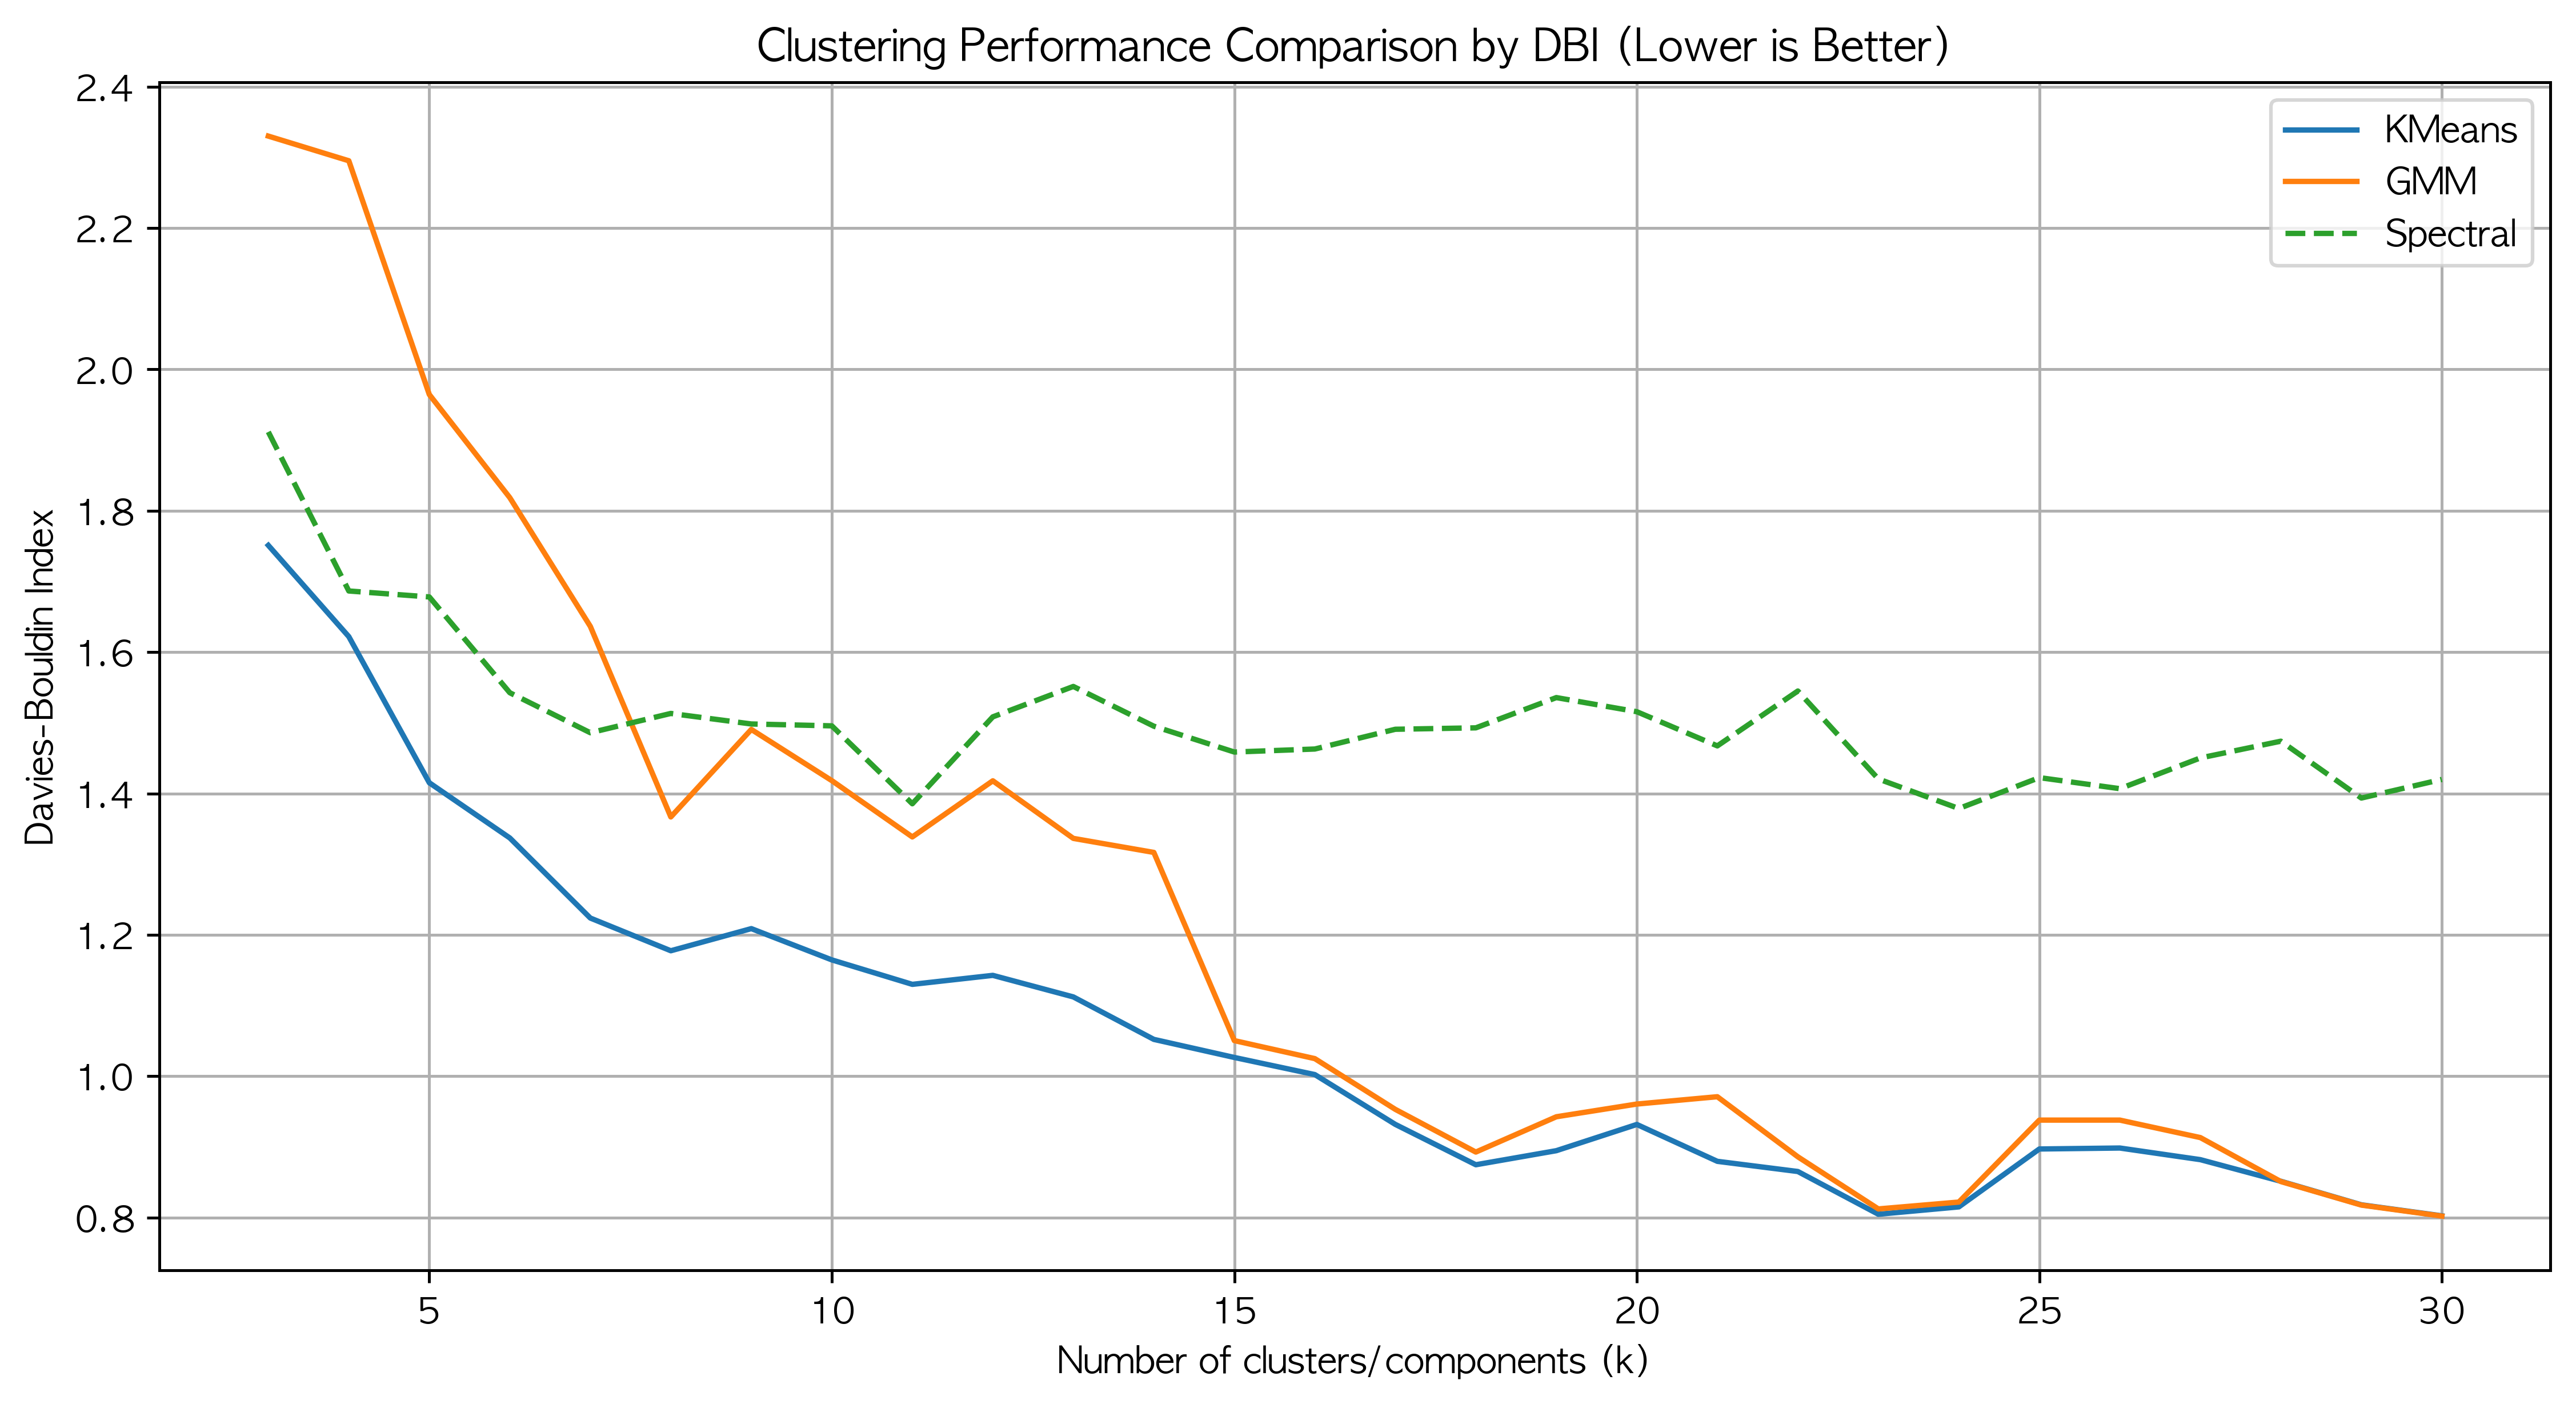

In [79]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2021_2023 = kmeans.fit_predict(X_scaled_2021_2023)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2021_2023, kmeans_labels_2021_2023))
    labels_kmeans_all[k] = kmeans_labels_2021_2023

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2021_2023 = gmm.fit_predict(X_scaled_df_2021_2023)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2021_2023, gmm_labels_2021_2023))
    labels_gmm_all[k] = gmm_labels_2021_2023

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2021_2023 = spectral.fit_predict(X_scaled_df_2021_2023)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2021_2023, spectral_labels_2021_2023))
        labels_spectral_all[k] = spectral_labels_2021_2023

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6), dpi = 450)
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.savefig('../plots/clustering_dbi_2021_2023.png')
plt.show()


### SHAP 분석

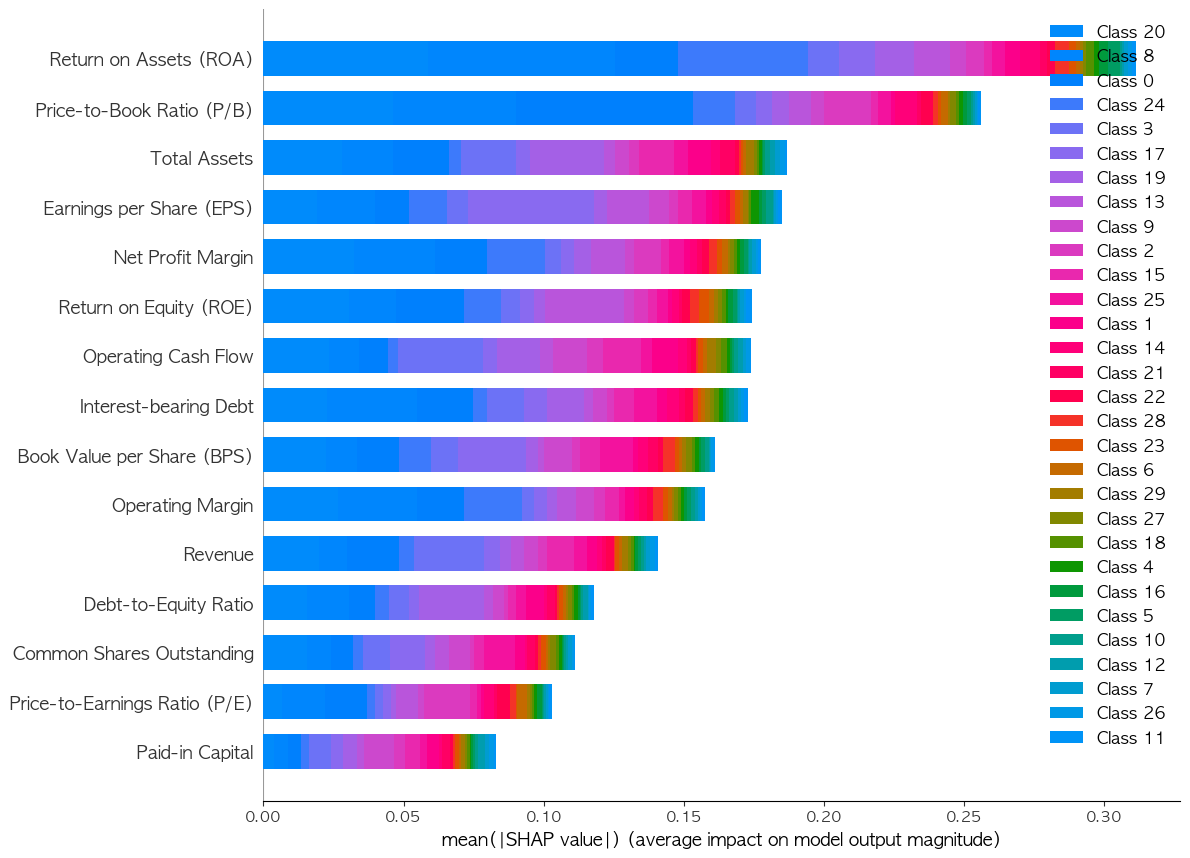

실제 사용된 클러스터 수: 30


In [81]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2021_2023 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2021_2023 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2021_2023 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2021_2023['Cluster'] = final_labels_2021_2023

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2021_2023, final_labels_2021_2023)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2021_2023 = explainer.shap_values(X_scaled_df_2021_2023)

# ✅ summary plot
shap.summary_plot(shap_values_2021_2023, X_scaled_df_2021_2023, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.savefig("../plots/shap_2021_2023.png")
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2021_2023)))


### 각 클러스터 별, 클러스터 형성에 큰 영향을 미쳤던 Feature

In [19]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2021_2023 = {}
unique_clusters_2021_2023 = np.unique(final_labels_2021_2023)

for cluster_id in unique_clusters_2021_2023:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2021_2023 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2021_2023[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2021_2023.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2021_2023[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2021_2023.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2021_2023:
    shap_arr = cluster_shap_means_2021_2023[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2021_2023.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2021_2023.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2021_2023:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


Class 0   Class 1   Class 2   Class 3   Class 4   Class 5  \
매출액         0.041171  0.020613  0.012602  0.025828  0.016467  0.006685   
자산총계        0.045758  0.029664  0.015988  0.026273  0.000652  0.011847   
자본금         0.012152  0.001491  0.011106  0.002478  0.001685  0.006766   
영업활동현금흐름    0.030640  0.011966  0.005427  0.017599  0.006490  0.003722   
이자발생부채      0.045795  0.020493  0.013071  0.022632  0.016502  0.004729   
영업이익률       0.042396  0.006612  0.007736  0.008356  0.010174  0.057366   
순이익률        0.048918  0.007763  0.035410  0.009397  0.011627  0.036358   
ROE(%)      0.057259  0.004776  0.043615  0.011965  0.014884  0.011648   
ROA(%)      0.055357  0.003414  0.008003  0.009731  0.009929  0.105581   
부채비율        0.023219  0.003323  0.007036  0.005053  0.010366  0.012118   
EPS(원)      0.036713  0.002338  0.008729  0.006123  0.024661  0.010632   
PER(배)      0.049459  0.003870  0.047967  0.003485  0.004007  0.007418   
BPS(원)      0.035772  0.003086  0.012170  0.006393  0.029545  0.005391   
PBR(배)      0.140936  0.036411  0.059355  0.047895  0.055087  0.057109   
발행주식수(보통주)  0.019824  0.008586  0.004326  0.005528  0.001867  0.001250   

             Class 6   Class 7   Class 8   Class 9  ...  Class 20  Class 21  \
매출액         0.012035  0.017332  0.014408  0.016754  ...  0.014908  0.017425   
자산총계        0.020389  0.021468  0.012229  0.022298  ...  0.009845  0.031582   
자본금         0.004883  0.001779  0.004143  0.005677  ...  0.003350  0.004093   
영업활동현금흐름    0.011266  0.004886  0.004351  0.018178  ...  0.004151  0.010905   
이자발생부채      0.012364  0.019629  0.011911  0.022790  ...  0.016835  0.032881   
영업이익률       0.011727  0.003928  0.017087  0.012048  ...  0.010114  0.008413   
순이익률        0.047125  0.009180  0.011891  0.012226  ...  0.010721  0.003685   
ROE(%)      0.067499  0.023685  0.009437  0.014062  ...  0.017893  0.006146   
ROA(%)      0.011668  0.004823  0.015346  0.010436  ...  0.008350  0.001850   
부채비율        0.015815  0.006130  0.010491  0.004880  ...  0.007126  0.003111   
EPS(원)      0.001324  0.000013  0.003963  0.007069  ...  0.005630  0.006347   
PER(배)      0.054846  0.003867  0.013020  0.009485  ...  0.009083  0.002413   
BPS(원)      0.015106  0.002137  0.010122  0.011081  ...  0.015862  0.005765   
PBR(배)      0.034631  0.025772  0.068383  0.056213  ...  0.060966  0.042601   
발행주식수(보통주)  0.001164  0.005518  0.006026  0.015391  ...  0.003478  0.012818   

            Class 22  Class 23  Class 24  Class 25  Class 26  Class 27  \
매출액         0.012255  0.005977  0.010902  0.009950  0.019472  0.009096   
자산총계        0.010424  0.013807  0.011710  0.009291  0.022364  0.009694   
자본금         0.005242  0.000773  0.002747  0.002155  0.001814  0.003388   
영업활동현금흐름    0.009321  0.010391  0.005015  0.005140  0.018044  0.015354   
이자발생부채      0.010195  0.014192  0.010815  0.019483  0.016494  0.024868   
영업이익률       0.016185  0.004117  0.035199  0.007863  0.002357  0.007727   
순이익률        0.038734  0.019337  0.018097  0.016250  0.010736  0.001520   
ROE(%)      0.056641  0.048851  0.014822  0.030005  0.015678  0.027075   
ROA(%)      0.010779  0.017528  0.066017  0.009583  0.010809  0.004704   
부채비율        0.011939  0.004594  0.008389  0.007971  0.000436  0.006967   
EPS(원)      0.002969  0.003836  0.013751  0.008550  0.004276  0.006503   
PER(배)      0.055639  0.006660  0.008525  0.004296  0.003940  0.002870   
BPS(원)      0.013761  0.011960  0.005682  0.013892  0.003109  0.023855   
PBR(배)      0.044627  0.029748  0.047461  0.048967  0.034584  0.052649   
발행주식수(보통주)  0.004621  0.006638  0.005396  0.019599  0.008975  0.021578   

            Class 28  Class 29  
매출액         0.011868  0.019576  
자산총계        0.014848  0.022892  
자본금         0.003737  0.001950  
영업활동현금흐름    0.000483  0.011981  
이자발생부채      0.007180  0.019744  
영업이익률       0.055346  0.006228  
순이익률        0.027998  0.003065  
ROE(%)      0.020220  0.011380  
ROA(%)      0.084973  0.002721  
부채비율        0.008540  0.005185  
EPS(원)      0.0


Class 0에 중요한 특성 순위:
1. PBR(배): 0.140936
2. ROE(%): 0.057259
3. ROA(%): 0.055357
4. PER(배): 0.049459
5. 순이익률: 0.048918
6. 이자발생부채: 0.045795
7. 자산총계: 0.045758
8. 영업이익률: 0.042396
9. 매출액: 0.041171
10. EPS(원): 0.036713
11. BPS(원): 0.035772
12. 영업활동현금흐름: 0.030640
13. 부채비율: 0.023219
14. 발행주식수(보통주): 0.019824
15. 자본금: 0.012152

Class 1에 중요한 특성 순위:
1. PBR(배): 0.036411
2. 자산총계: 0.029664
3. 매출액: 0.020613
4. 이자발생부채: 0.020493
5. 영업활동현금흐름: 0.011966
6. 발행주식수(보통주): 0.008586
7. 순이익률: 0.007763
8. 영업이익률: 0.006612
9. ROE(%): 0.004776
10. PER(배): 0.003870
11. ROA(%): 0.003414
12. 부채비율: 0.003323
13. BPS(원): 0.003086
14. EPS(원): 0.002338
15. 자본금: 0.001491

Class 2에 중요한 특성 순위:
1. PBR(배): 0.059355
2. PER(배): 0.047967
3. ROE(%): 0.043615
4. 순이익률: 0.035410
5. 자산총계: 0.015988
6. 이자발생부채: 0.013071
7. 매출액: 0.012602
8. BPS(원): 0.012170
9. 자본금: 0.011106
10. EPS(원): 0.008729
11. ROA(%): 0.008003
12. 영업이익률: 0.007736
13. 부채비율: 0.007036
14. 영업활동현금흐름: 0.005427
15. 발행주식수(보통주): 0.004326

Class 3에 중요한 특성 순위:
1. PBR(배): 0.047895

### 각 클러스터 별 편입 종목 확인

In [20]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2021_2023:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2021_2023[final_labels_2021_2023 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
BGF리테일, HD현대일렉트릭, KG모빌리티, LIG넥스원, PI첨단소재, SK바이오사이언스, SK아이이테크놀로지, TCC스틸, 대웅제약, 대한전선, 동원시스템즈, 유한양행, 코스맥스, 하이브, 한국항공우주, 한미사이언스, 한미약품, 한전기술, 한화에어로스페이스, 현대로템, 현대엘리베이터, 호텔신라, 후성
[클러스터 1에 속한 종목들]:
KB금융, 신한지주, 우리금융지주, 하나금융지주
[클러스터 2에 속한 종목들]:
HD현대중공업, 두산퓨얼셀, 삼아알미늄, 씨에스윈드, 일진하이솔루스, 포스코퓨처엠
[클러스터 3에 속한 종목들]:
CJ, DB손해보험, GS, HD현대, KT, LG에너지솔루션, S-Oil, SK텔레콤, 삼성물산, 포스코인터내셔널, 현대글로비스, 현대제철, 현대해상
[클러스터 4에 속한 종목들]:
태광산업
[클러스터 5에 속한 종목들]:
한미반도체
[클러스터 6에 속한 종목들]:
에코프로머티
[클러스터 7에 속한 종목들]:
한국전력
[클러스터 8에 속한 종목들]:
HD현대인프라코어, KT&G, LG, LX인터내셔널, SK케미칼, TKG휴켐스, 강원랜드, 대웅, 더블유게임즈, 동서, 두산밥캣, 롯데정밀화학, 미스토홀딩스, 삼성E&A, 삼성에스디에스, 삼성전기, 삼성카드, 세방전지, 에스엘, 에스원, 엔씨소프트, 오리온홀딩스, 제일기획, 풍산, 한국앤컴퍼니, 한국타이어앤테크놀로지, 한세실업, 한일시멘트, 한전KPS
[클러스터 9에 속한 종목들]:
LG유플러스, NH투자증권, 대우건설, 대한항공, 두산에너빌리티, 카카오뱅크
[클러스터 10에 속한 종목들]:
현대차
[클러스터 11에 속한 종목들]:
하나투어
[클러스터 12에 속한 종목들]:
기업은행
[클러스터 13에 속한 종목들]:
GKL, HD현대미포, SKC, 넷마블, 대한유화, 두산, 엘앤에프, 율촌화학, 코스모화학, 한샘
[클러스터 14에 속한 종목들]:
SK바이오팜, 코스모신소재, 포스코DX
[클러스터 15에 속한 종목들]:
LG전자, LG화학, POSCO홀딩스,

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

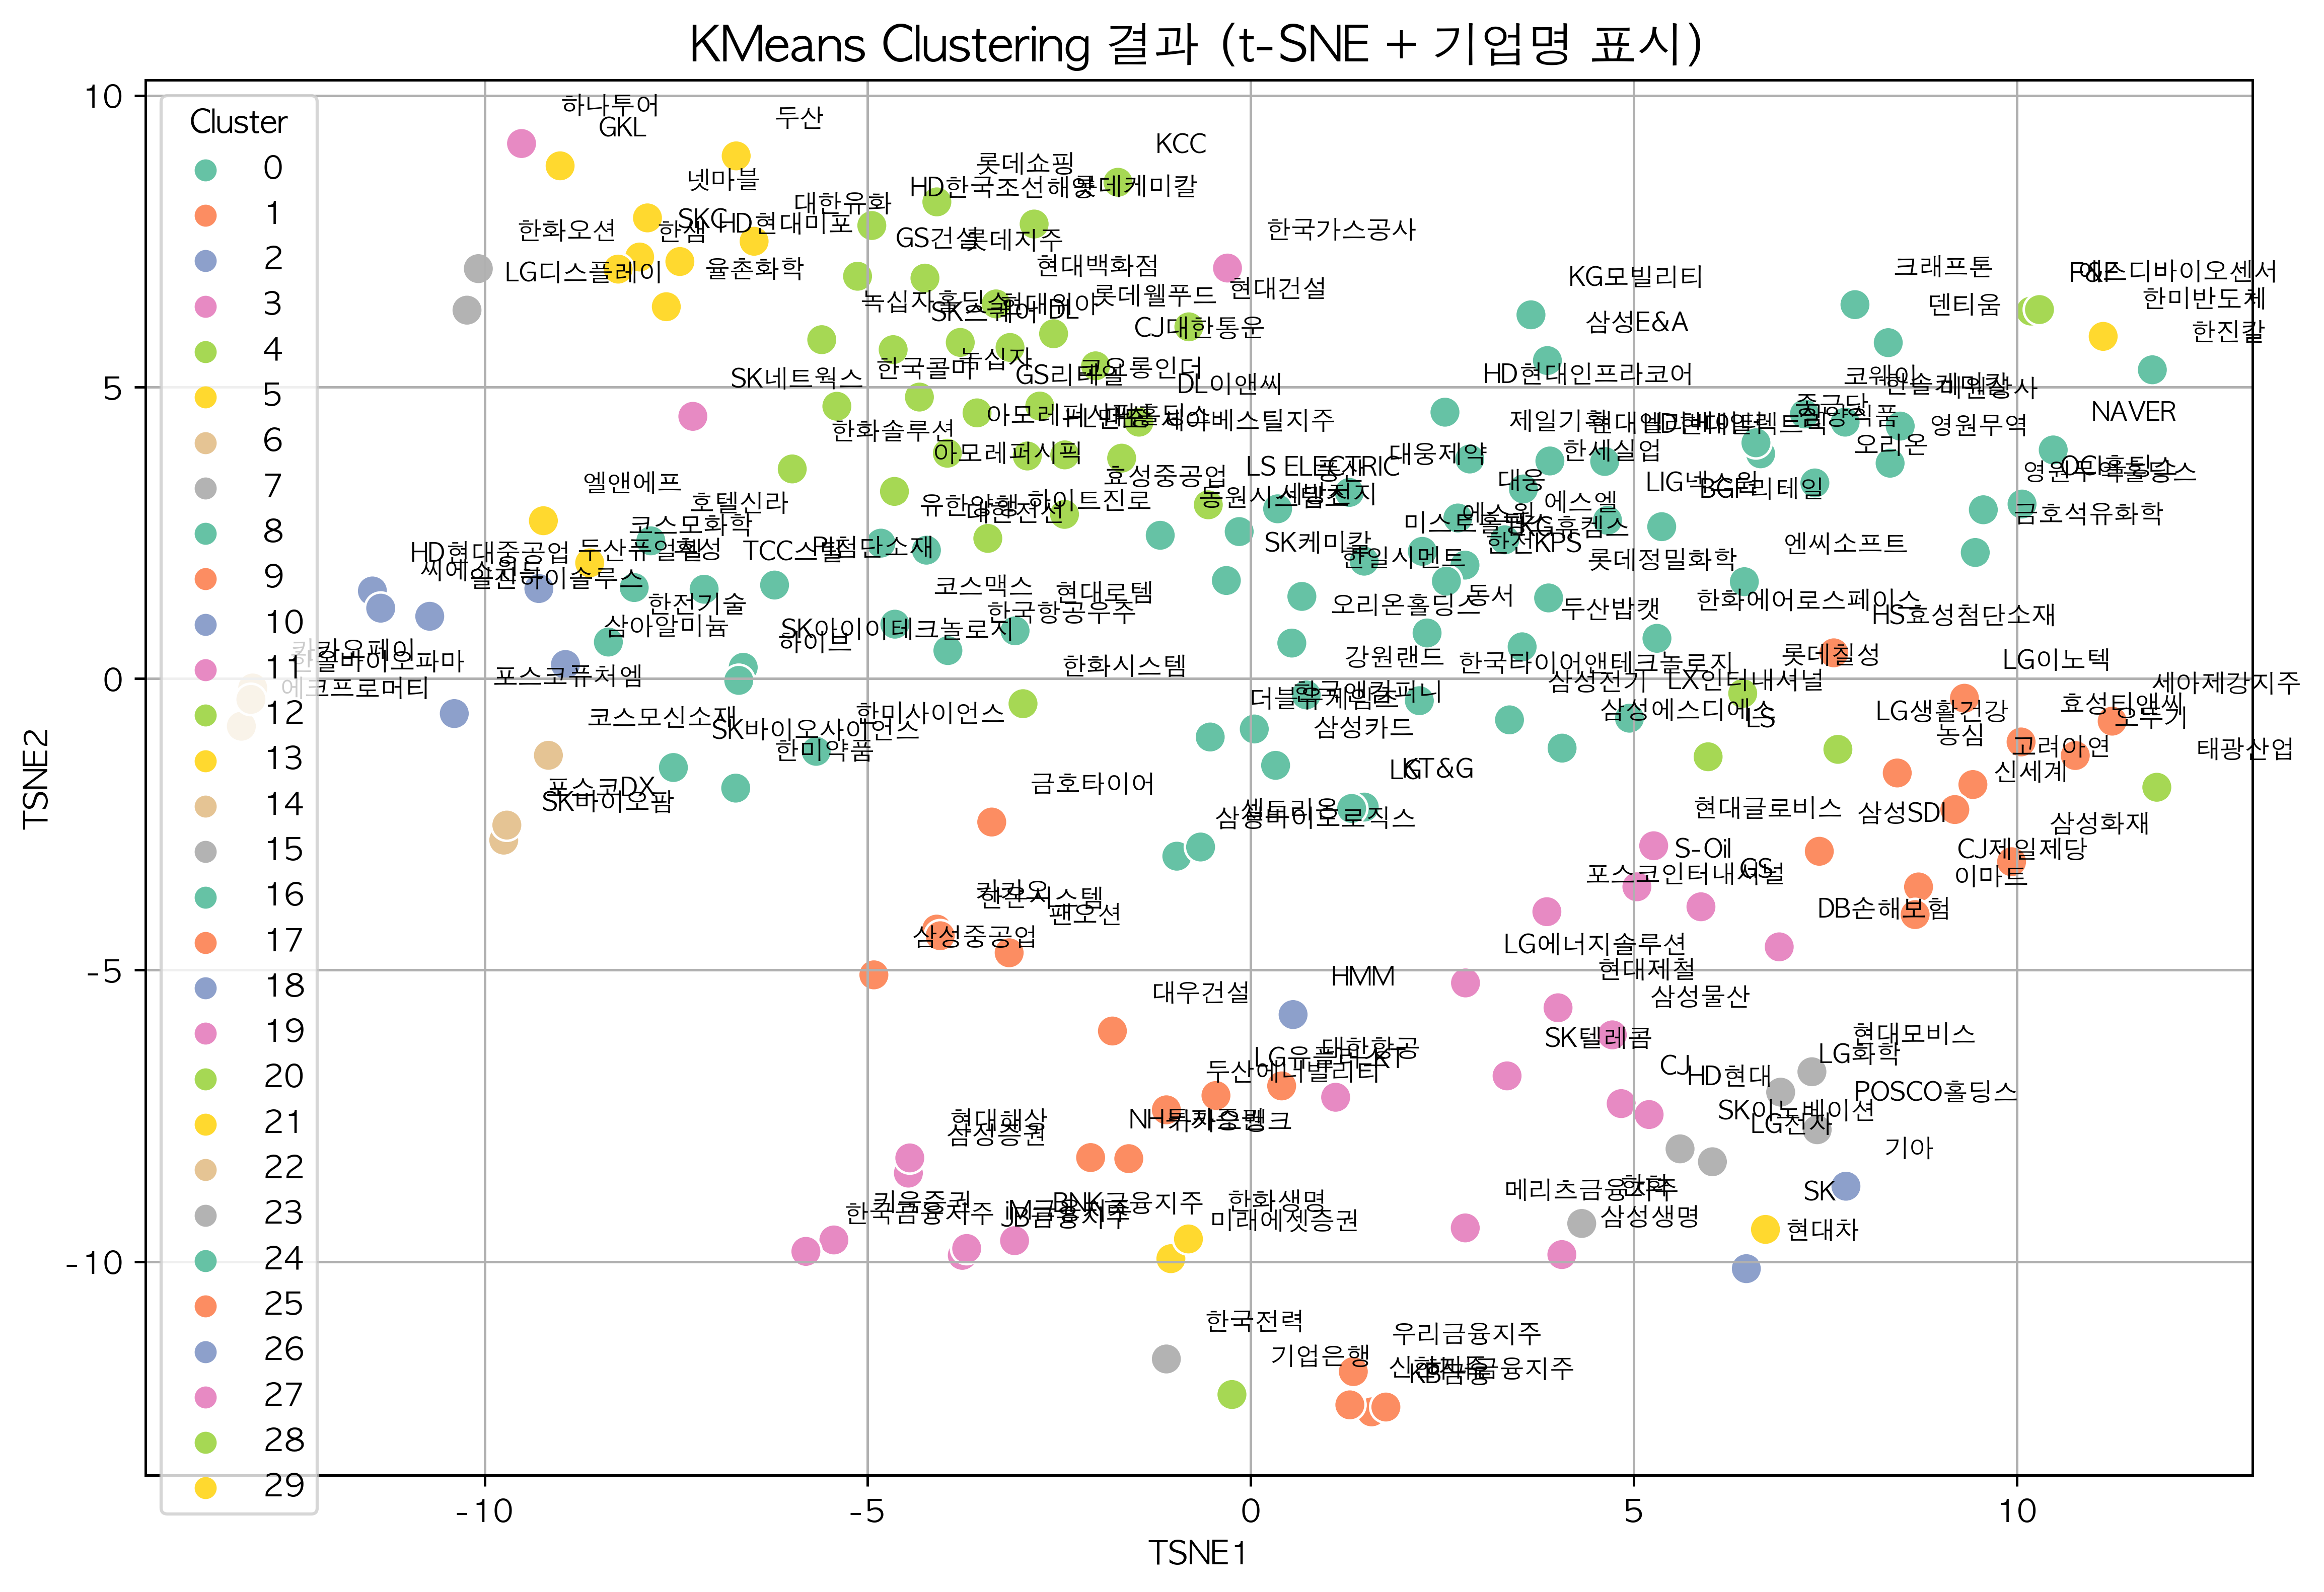

In [21]:
# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2021_2023)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2021_2023.values,
    'Cluster': final_labels_2021_2023,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8), dpi = 450)
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title("KMeans Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2022-2024) - 자동화

In [73]:
X_scaled_df_2022_2024 = X_scaled_df_2022_2024.rename(columns = col_map)

Best K for KMeans (lowest DBI): 14 -> DBI = 0.8381
Best K for GMM (lowest DBI): 19 -> DBI = 0.9126
Best K for Spectral Clustering (lowest DBI): 12 -> DBI = 1.3708


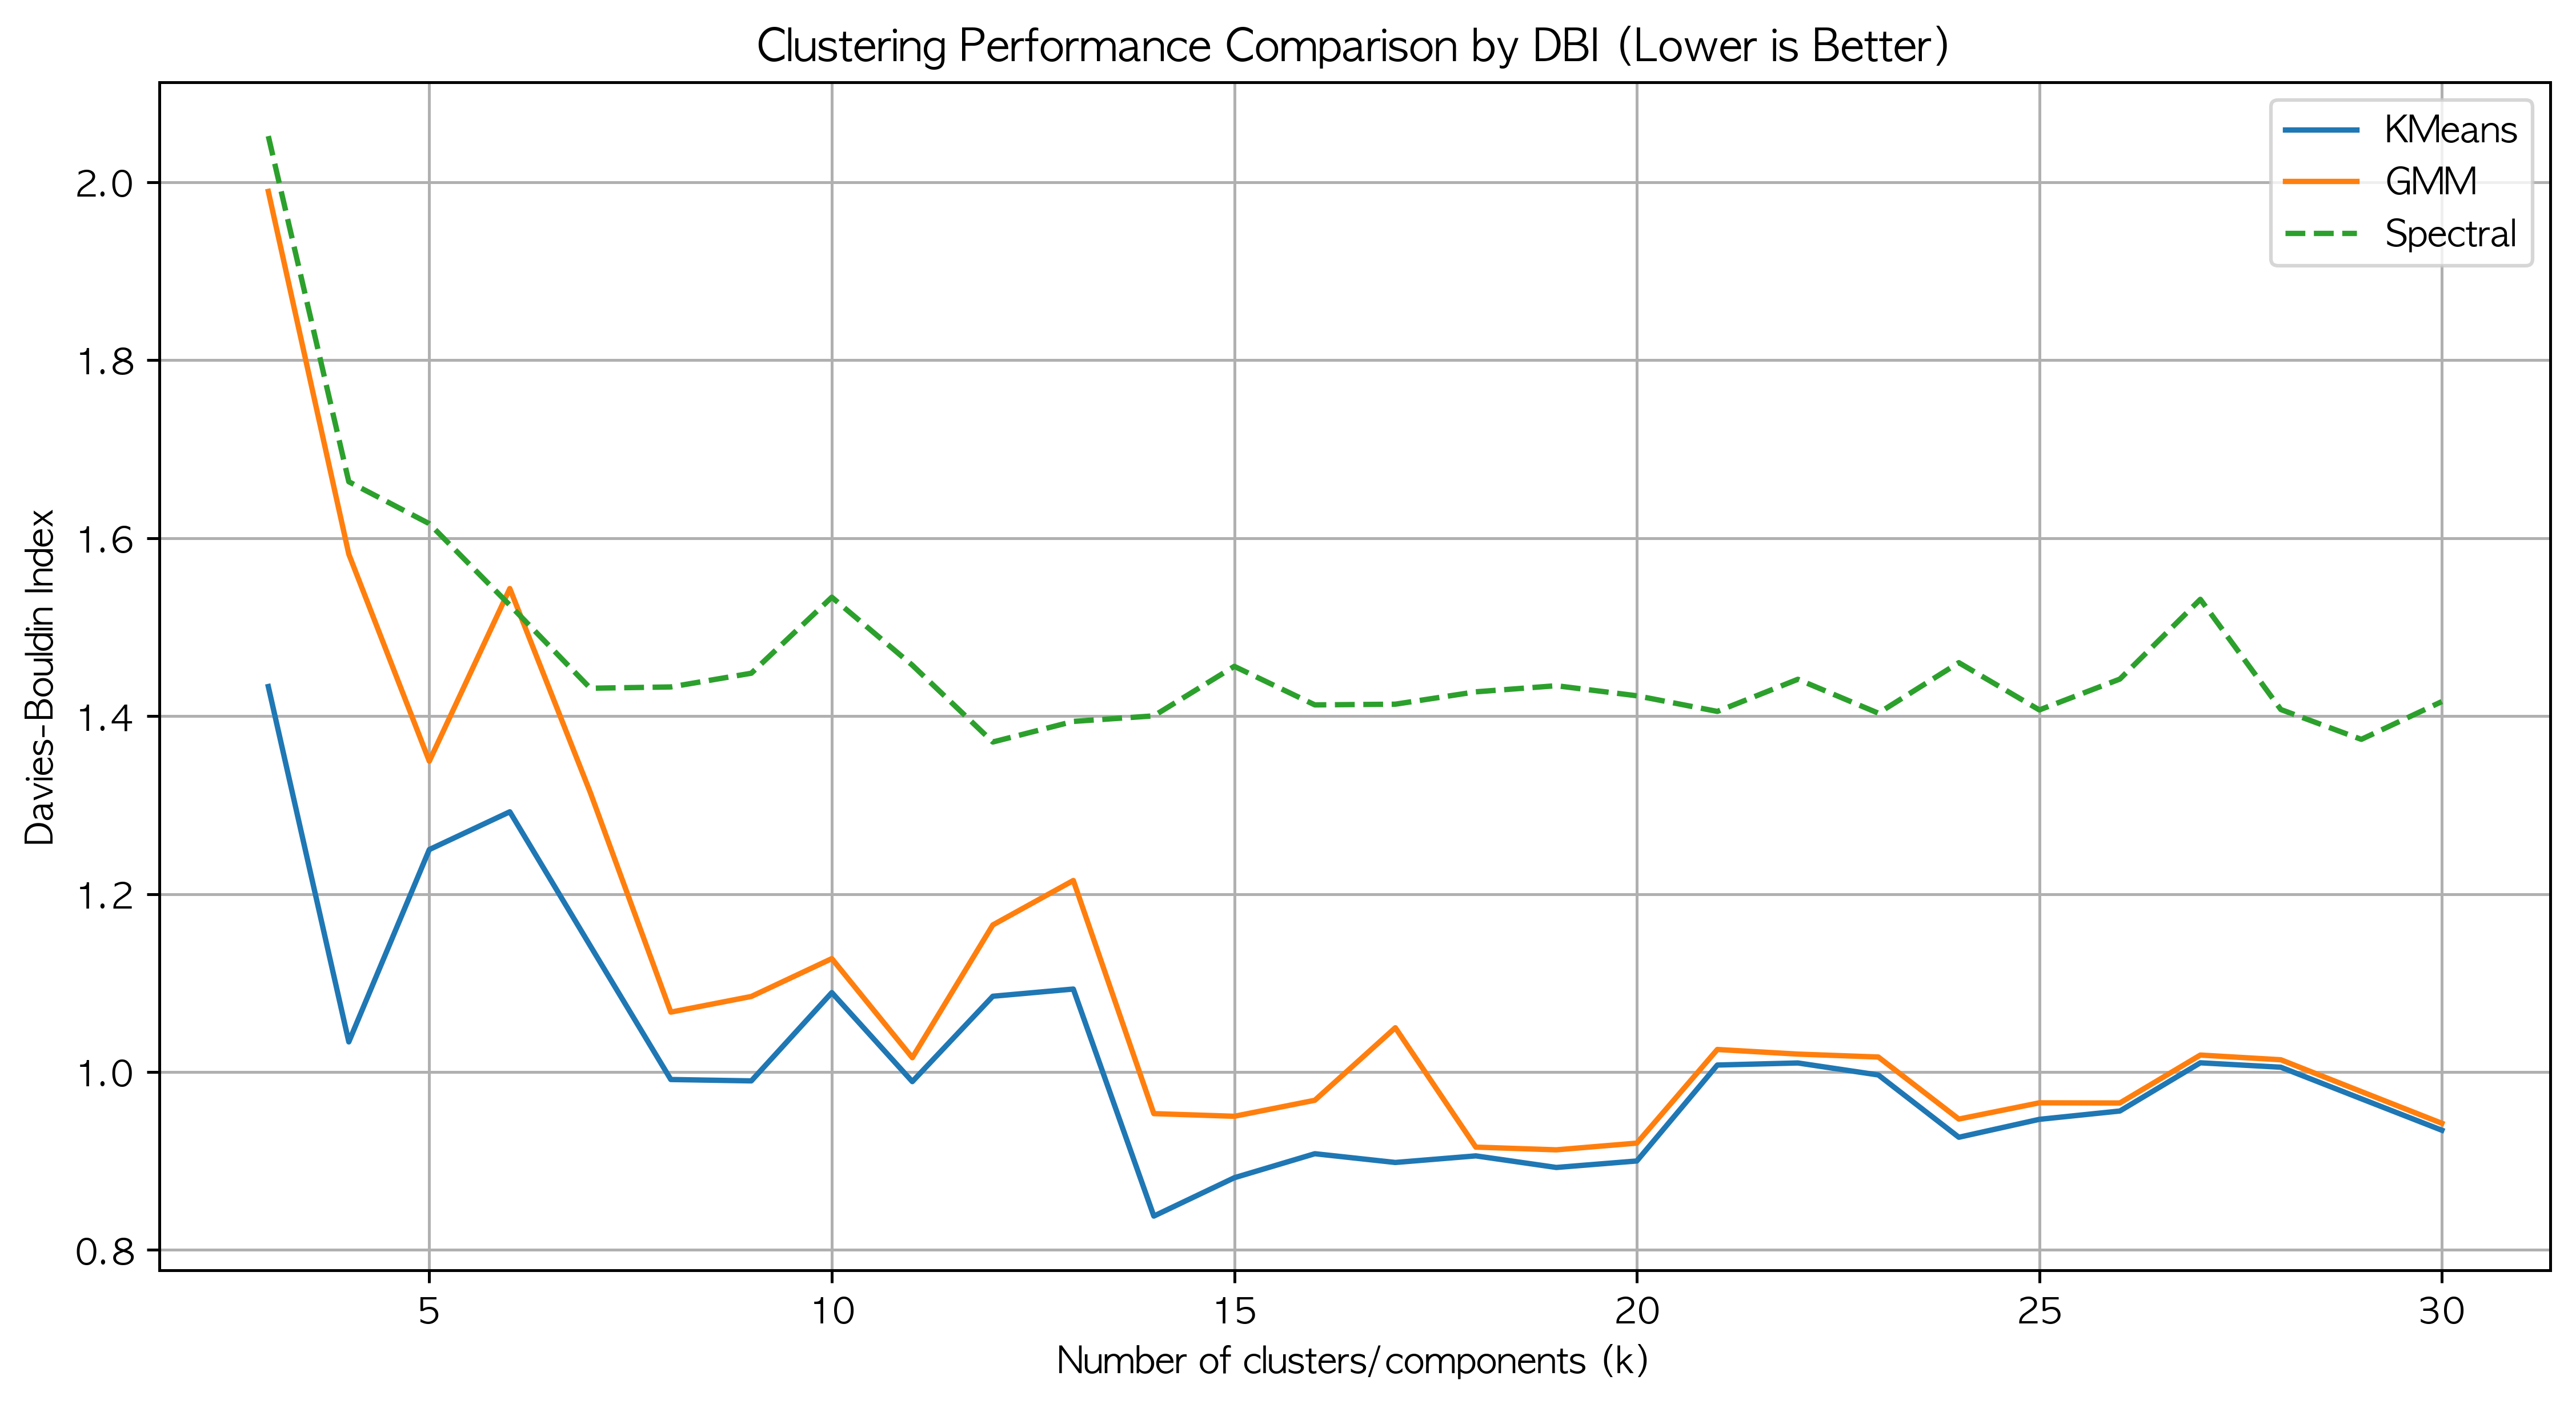

In [74]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2022_2024 = kmeans.fit_predict(X_scaled_2022_2024)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2022_2024, kmeans_labels_2022_2024))
    labels_kmeans_all[k] = kmeans_labels_2022_2024

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2022_2024 = gmm.fit_predict(X_scaled_df_2022_2024)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2022_2024, gmm_labels_2022_2024))
    labels_gmm_all[k] = gmm_labels_2022_2024

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2022_2024 = spectral.fit_predict(X_scaled_df_2022_2024)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2022_2024, spectral_labels_2022_2024))
        labels_spectral_all[k] = spectral_labels_2022_2024

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6), dpi = 450)
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.savefig('../plots/clustering_dbi_2022_2024.png')
plt.show()


### SHAP 분석

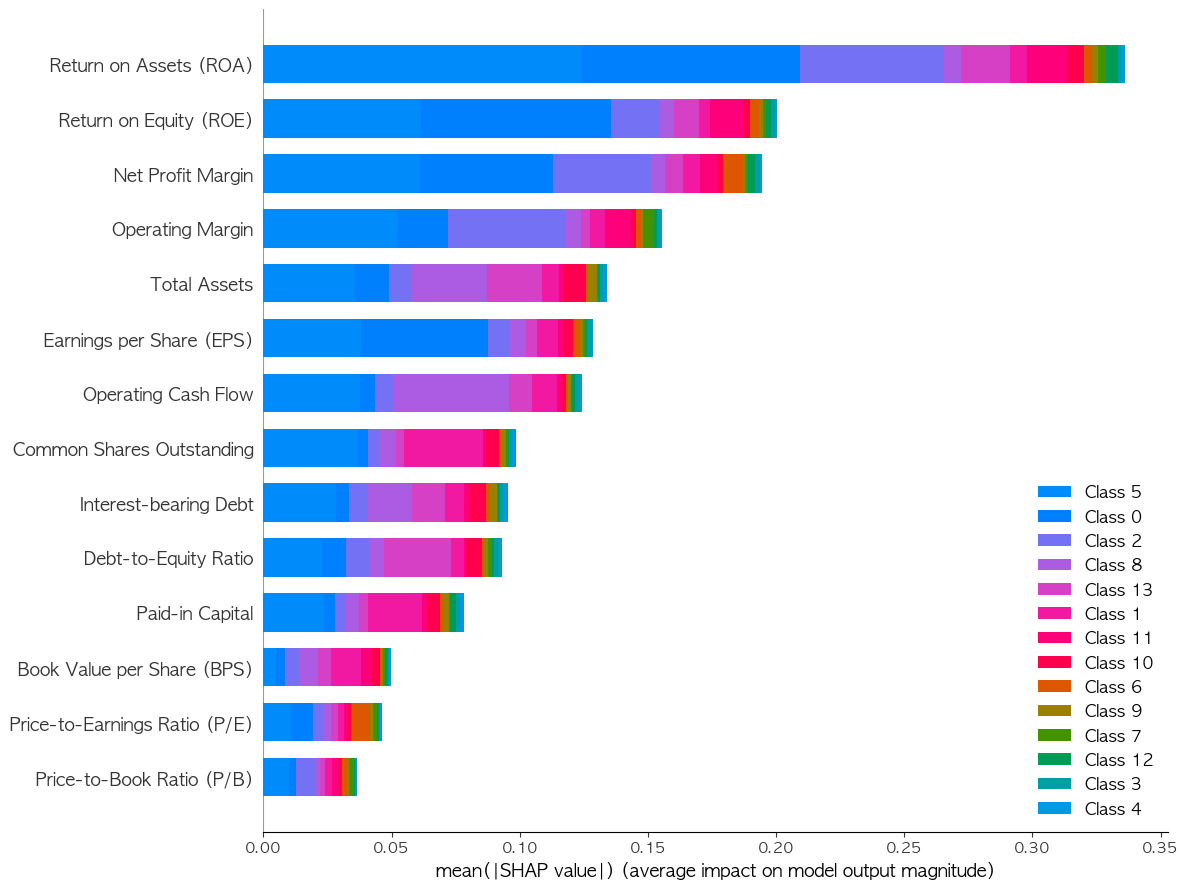

실제 사용된 클러스터 수: 14


In [76]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2022_2024 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2022_2024 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2022_2024 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2022_2024['Cluster'] = final_labels_2022_2024

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2022_2024, final_labels_2022_2024)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2022_2024 = explainer.shap_values(X_scaled_df_2022_2024)

# ✅ summary plot
shap.summary_plot(shap_values_2022_2024, X_scaled_df_2022_2024, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.savefig("../plots/shap_2022_2024.png")
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2022_2024)))


### 각 클러스터 별, 클러스터 형성에 큰 영향을 미쳤던 Feature

In [24]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2022_2024 = {}
unique_clusters_2022_2024 = np.unique(final_labels_2022_2024)

for cluster_id in unique_clusters_2022_2024:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2022_2024 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2022_2024[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2022_2024.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2022_2024[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2022_2024.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2022_2024:
    shap_arr = cluster_shap_means_2022_2024[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2022_2024.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2022_2024.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2022_2024:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


Class 0   Class 1   Class 2   Class 3   Class 4   Class 5  \
자산총계        0.021645  0.012145  0.004284  0.084327  0.051189  0.004787   
자본금         0.011450  0.012547  0.000634  0.054308  0.015447  0.000990   
영업활동현금흐름    0.012119  0.007700  0.001575  0.053947  0.001647  0.002050   
이자발생부채      0.011505  0.002241  0.001260  0.065303  0.021874  0.001164   
영업이익률       0.044751  0.015497  0.015365  0.032108  0.011843  0.012284   
순이익률        0.121075  0.041383  0.036143  0.091533  0.029201  0.034730   
ROE(%)      0.183970  0.061429  0.046231  0.098987  0.038272  0.048282   
ROA(%)      0.189778  0.061354  0.062620  0.103136  0.055211  0.062215   
부채비율        0.016718  0.017978  0.002552  0.070065  0.036464  0.003028   
EPS(원)      0.118984  0.038120  0.033620  0.084423  0.017637  0.033255   
PER(배)      0.024221  0.004149  0.001928  0.008416  0.000034  0.002792   
BPS(원)      0.007754  0.009030  0.001450  0.003806  0.000321  0.001687   
PBR(배)      0.006927  0.003732  0.000760  0.007233  0.000150  0.001290   
발행주식수(보통주)  0.009147  0.024455  0.000784  0.041586  0.018852  0.000984   

             Class 6   Class 7   Class 8   Class 9  Class 10  Class 11  \
자산총계        0.005543  0.005653  0.031207  0.020131  0.051872  0.004122   
자본금         0.005675  0.004423  0.002098  0.002928  0.009361  0.000571   
영업활동현금흐름    0.003881  0.002389  0.025290  0.004322  0.007656  0.001483   
이자발생부채      0.014038  0.001963  0.011135  0.012667  0.021805  0.001563   
영업이익률       0.019195  0.044612  0.014981  0.011511  0.015412  0.015942   
순이익률        0.054568  0.039277  0.034957  0.031952  0.030638  0.035238   
ROE(%)      0.077317  0.046414  0.051707  0.035359  0.037456  0.045380   
ROA(%)      0.106447  0.072554  0.059281  0.044081  0.051195  0.060279   
부채비율        0.005609  0.010122  0.008750  0.000490  0.034834  0.002323   
EPS(원)      0.068138  0.054428  0.034380  0.027346  0.022874  0.032399   
PER(배)      0.191019  0.019493  0.004008  0.000075  0.000899  0.001552   
BPS(원)      0.016077  0.010280  0.003640  0.002770  0.001548  0.001499   
PBR(배)      0.040237  0.014104  0.001653  0.001784  0.000854  0.002966   
발행주식수(보통주)  0.005574  0.001391  0.000759  0.000113  0.006445  0.001064   

            Class 12  Class 13  
자산총계        0.004174  0.038438  
자본금         0.000695  0.003767  
영업활동현금흐름    0.001574  0.002095  
이자발생부채      0.001427  0.005669  
영업이익률       0.015355  0.015946  
순이익률        0.036366  0.037433  
ROE(%)      0.045797  0.048455  
ROA(%)      0.061487  0.047660  
부채비율        0.001594  0.035843  
EPS(원)      0.034986  0.024536  
PER(배)      0.001427  0.002001  
BPS(원)      0.000800  0.001878  
PBR(배)      0.000261  0.003074  
발행주식수(보통주)  0.001056  0.002641


Class 0에 중요한 특성 순위:
1. ROA(%): 0.189778
2. ROE(%): 0.183970
3. 순이익률: 0.121075
4. EPS(원): 0.118984
5. 영업이익률: 0.044751
6. PER(배): 0.024221
7. 자산총계: 0.021645
8. 부채비율: 0.016718
9. 영업활동현금흐름: 0.012119
10. 이자발생부채: 0.011505
11. 자본금: 0.011450
12. 발행주식수(보통주): 0.009147
13. BPS(원): 0.007754
14. PBR(배): 0.006927

Class 1에 중요한 특성 순위:
1. ROE(%): 0.061429
2. ROA(%): 0.061354
3. 순이익률: 0.041383
4. EPS(원): 0.038120
5. 발행주식수(보통주): 0.024455
6. 부채비율: 0.017978
7. 영업이익률: 0.015497
8. 자본금: 0.012547
9. 자산총계: 0.012145
10. BPS(원): 0.009030
11. 영업활동현금흐름: 0.007700
12. PER(배): 0.004149
13. PBR(배): 0.003732
14. 이자발생부채: 0.002241

Class 2에 중요한 특성 순위:
1. ROA(%): 0.062620
2. ROE(%): 0.046231
3. 순이익률: 0.036143
4. EPS(원): 0.033620
5. 영업이익률: 0.015365
6. 자산총계: 0.004284
7. 부채비율: 0.002552
8. PER(배): 0.001928
9. 영업활동현금흐름: 0.001575
10. BPS(원): 0.001450
11. 이자발생부채: 0.001260
12. 발행주식수(보통주): 0.000784
13. PBR(배): 0.000760
14. 자본금: 0.000634

Class 3에 중요한 특성 순위:
1. ROA(%): 0.103136
2. ROE(%): 0.098987
3. 순이익률: 0.091533
4. EPS(원): 0.08

### 각 클러스터 별 편입 종목 확인

In [25]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2022_2024:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2022_2024[final_labels_2022_2024 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
DL, GS건설, GS리테일, HD현대미포, KG모빌리티, LG디스플레이, SKC, SK네트웍스, SK바이오사이언스, SK이노베이션, 넷마블, 녹십자, 녹십자홀딩스, 대한유화, 두산, 두산퓨얼셀, 롯데쇼핑, 롯데지주, 롯데케미칼, 삼아알미늄, 엘앤에프, 율촌화학, 이마트, 일진하이솔루스, 카카오, 코스모화학, 포스코퓨처엠, 한온시스템, 한올바이오파마, 한화솔루션, 한화오션, 현대건설, 현대백화점, 현대제철, 호텔신라, 후성
[클러스터 1에 속한 종목들]:
HMM, LG유플러스, 금호타이어, 대우건설, 대한항공, 두산에너빌리티, 삼성중공업, 카카오뱅크, 팬오션, 한화생명
[클러스터 2에 속한 종목들]:
HD현대일렉트릭, KT&G, SK스퀘어, 강원랜드, 더블유게임즈, 덴티움, 동서, 미원상사, 삼성바이오로직스, 삼양식품, 셀트리온, 영원무역, 영원무역홀딩스, 오리온, 종근당, 코웨이, 크래프톤, 포스코DX, 한국앤컴퍼니, 한미약품, 한솔케미칼, 한전KPS, 한화에어로스페이스
[클러스터 3에 속한 종목들]:
한국전력
[클러스터 4에 속한 종목들]:
기업은행
[클러스터 5에 속한 종목들]:
BGF리테일, CJ대한통운, CJ제일제당, DL이앤씨, GKL, GS, HD한국조선해양, HD현대인프라코어, HD현대중공업, HL만도, HS효성첨단소재, KCC, LG, LG생활건강, LG에너지솔루션, LG이노텍, LIG넥스원, LS, LS ELECTRIC, LX인터내셔널, NAVER, OCI홀딩스, PI첨단소재, S-Oil, SK아이이테크놀로지, SK케미칼, TCC스틸, TKG휴켐스, 고려아연, 금호석유화학, 농심, 대상, 대웅, 대웅제약, 대한전선, 동원시스템즈, 두산밥캣, 롯데웰푸드, 롯데정밀화학, 롯데칠성, 미스토홀딩스, 삼성E&A, 삼성SDI, 삼성물산, 삼성에스디에스, 삼성전기, 삼성카드, 삼성화재, 세방전지, 세아베스틸지주, 세아제강지주, 신세계, 씨에스윈드, 아모레퍼시픽, 아모레퍼시픽홀딩스, 에스엘, 에스원, 엔씨소프트, 오뚜기, 오

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

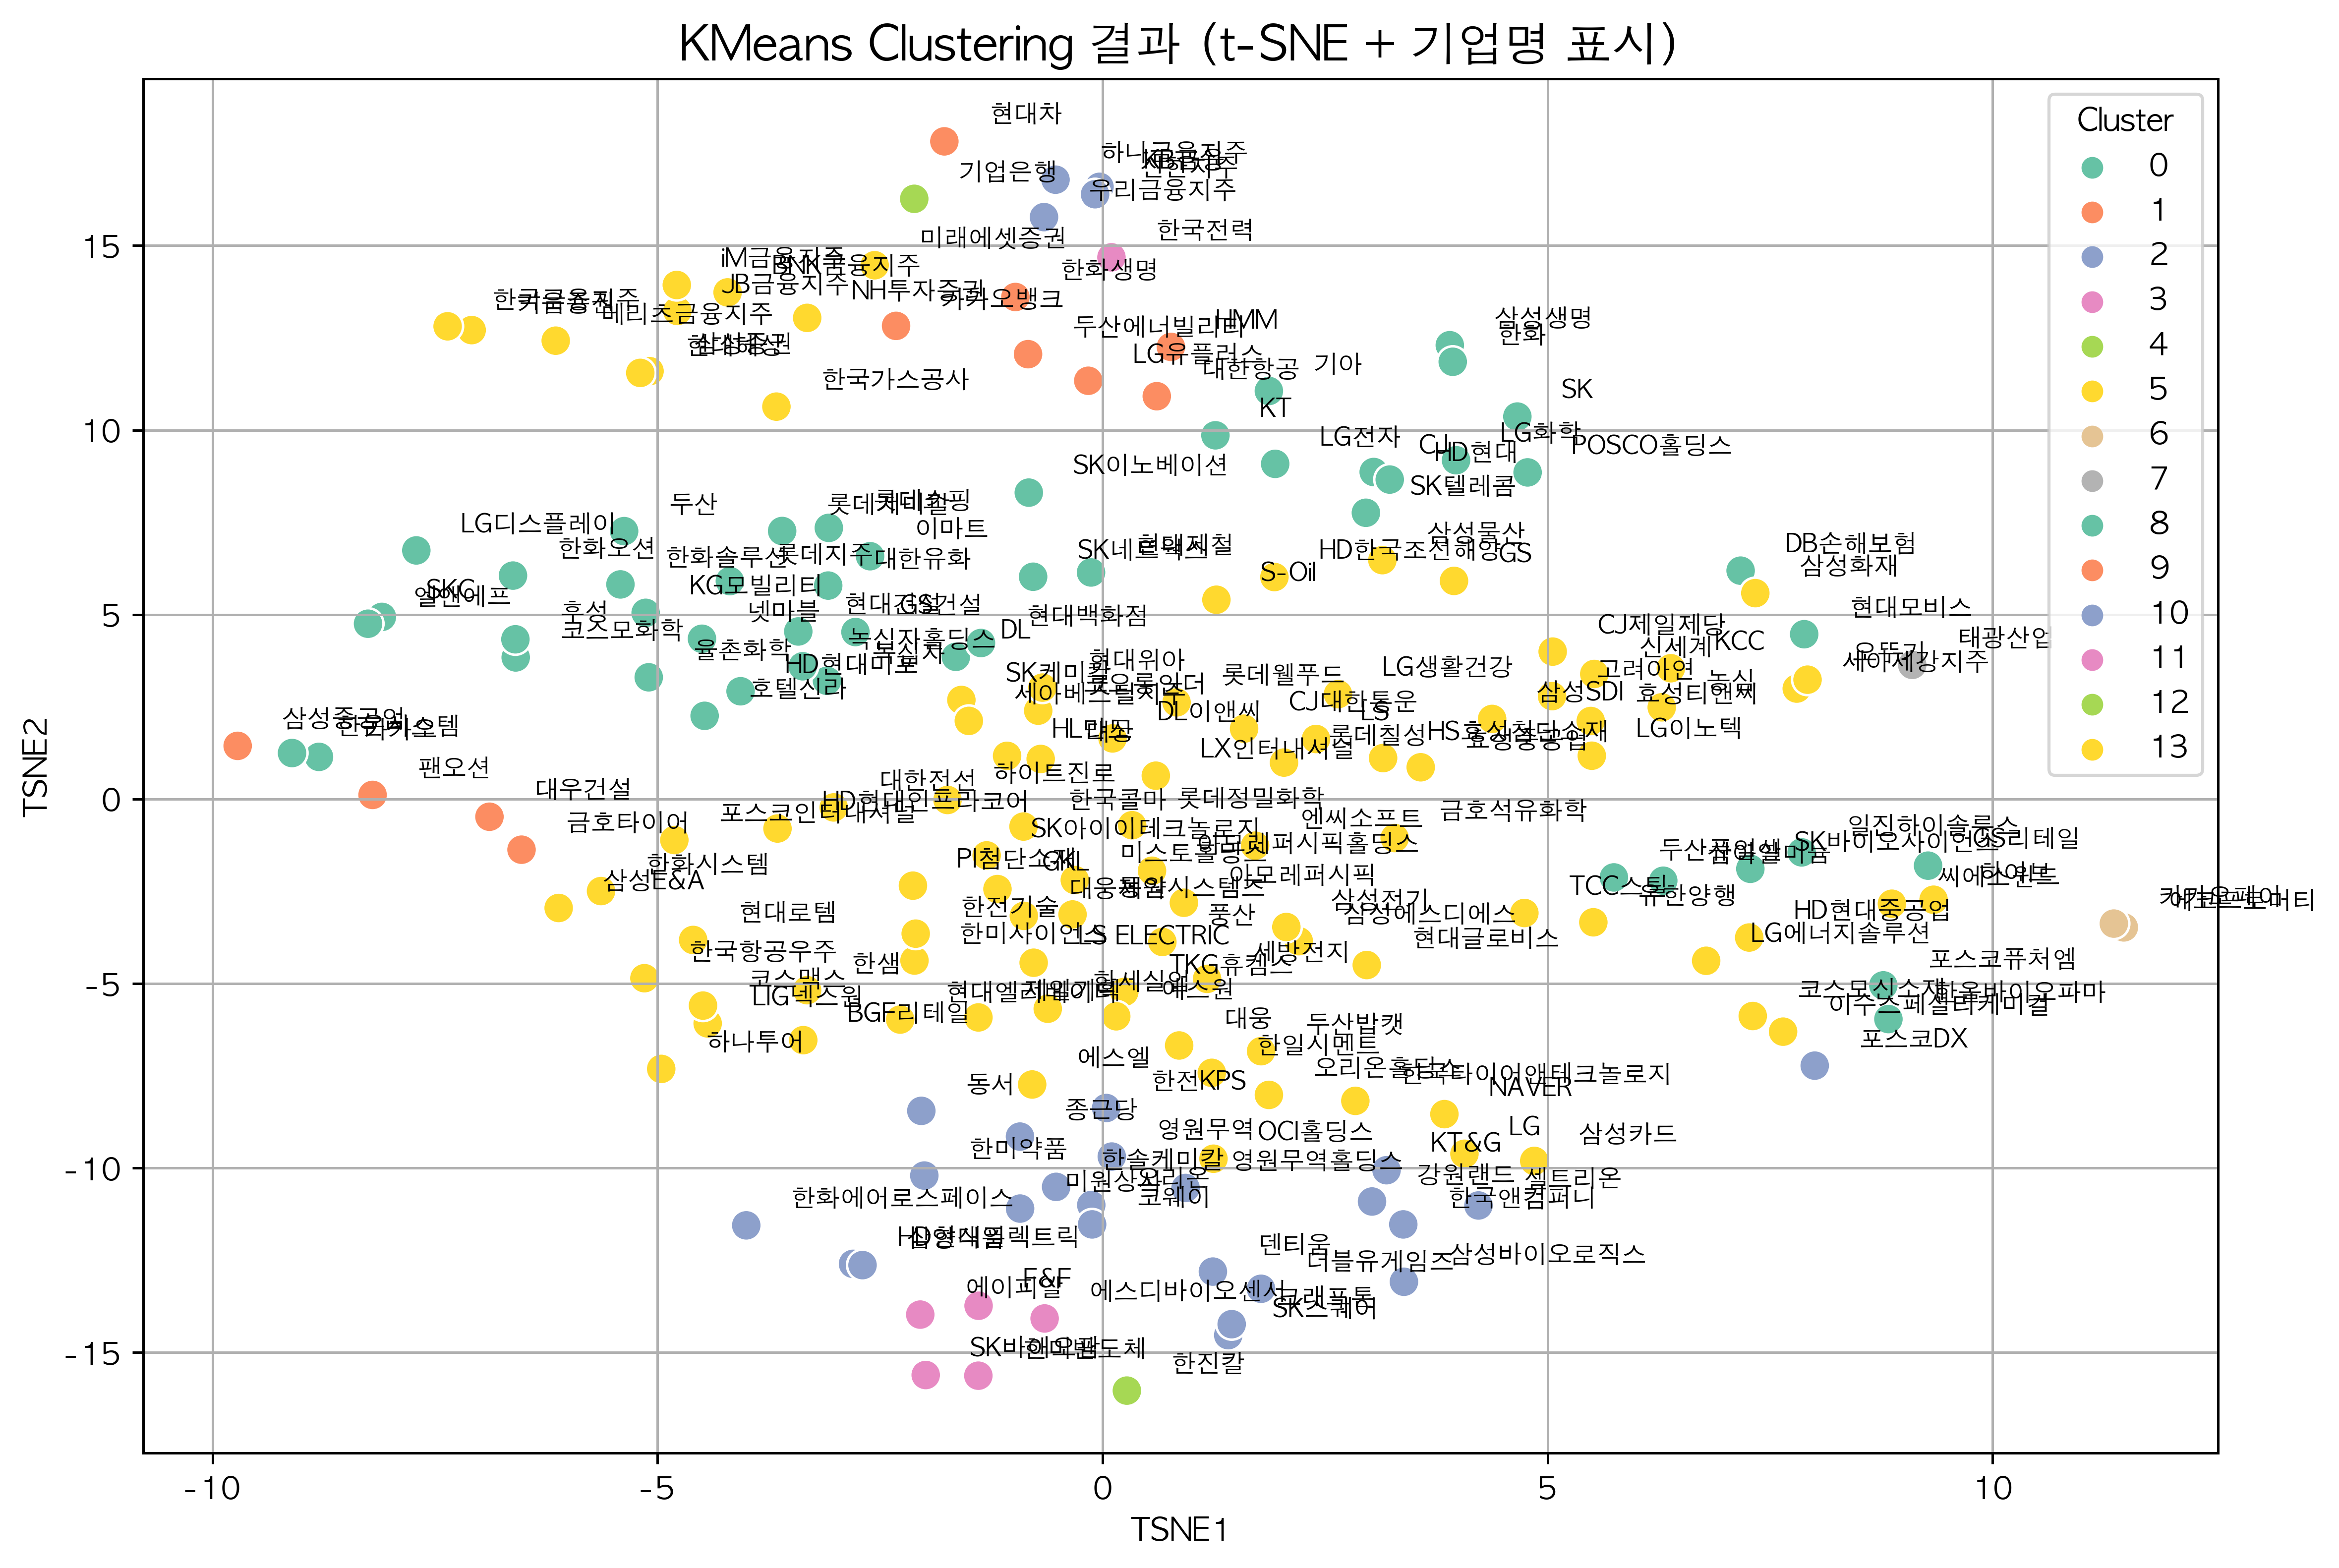

In [26]:
# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2022_2024)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2022_2024.values,
    'Cluster': final_labels_2022_2024,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8), dpi = 450)
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title("KMeans Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# 포트폴리오 최적화

## Inter Cluster Portfolio vs. Random Sampling Portfolio

## Evaluation Using Sortino Ratio, CVaR, MDD and Omega Ratio

### 자산 데이터 수집 및 로그 수익률 변환

In [27]:
#자산들 목록 보기
import FinanceDataReader as fdr
from tqdm import tqdm
import datetime

# 1. 세 윈도우에서 기업명 합집합 만들기
companies_2020_2022 = set(df_2020_2022['기업명_그룹'])
companies_2021_2023 = set(df_2021_2023['기업명_그룹'])
companies_2022_2024 = set(df_2022_2024['기업명_그룹'])

all_companies = companies_2020_2022.union(companies_2021_2023).union(companies_2022_2024)
company_list = sorted(all_companies)

krx_listed = fdr.StockListing('KRX')

# 기업명과 티커 매핑
company_ticker_map = {}
for name in company_list:
    match = krx_listed[krx_listed['Name'] == name]
    if not match.empty:
        code = match.iloc[0]['Code']
        company_ticker_map[name] = code
    else:
        print(f"매칭되지 않은 기업명: {name}")

# 매핑 결과 확인
print("매핑된 기업 수:", len(company_ticker_map))


매칭되지 않은 기업명: HD현대미포
매핑된 기업 수: 194


In [28]:
start_date = '2020-01-01'
end_date = '2024-12-31'

# 종가 데이터를 담을 딕셔너리
close_price_dict = {}
failed_companies = []

# tqdm으로 진행 상황 출력
for name, ticker in tqdm(company_ticker_map.items(), desc="📈 종가 수집 중"):
    try:
        df = fdr.DataReader(ticker, start=start_date, end=end_date)
        if 'Close' in df.columns and not df['Close'].isna().all():
            close_price_dict[name] = df['Close']
        else:
            failed_companies.append(name)
    except Exception as e:
        failed_companies.append(name)
        print(f"{name} 데이터 수집 실패: {e}")

# 딕셔너리를 하나의 데이터프레임으로 결합
price_df = pd.DataFrame(close_price_dict)

📈 종가 수집 중: 100%|██████████| 194/194 [00:16<00:00, 11.42it/s]


In [29]:
price_df

BGF리테일  BNK금융지주      CJ  CJ대한통운  CJ제일제당  DB손해보험     DL    DL이앤씨  \
Date                                                                          
2020-01-02  168500     7470   93800  152500  245000   50100  79337      NaN   
2020-01-03  169000     7490   92600  148000  241000   50800  79337      NaN   
2020-01-06  166500     7350   90300  147000  233500   50200  75994      NaN   
2020-01-07  169500     7430   91100  147000  234000   49750  76988      NaN   
2020-01-08  169500     7330   90900  143500  229500   48550  74639      NaN   
...            ...      ...     ...     ...     ...     ...    ...      ...   
2024-12-23  107700    10630  107900   82500  265000  104700  33800  33100.0   
2024-12-24  107000    10730  102200   82200  264500  105600  33800  32950.0   
2024-12-26  105400    10590  102100   81200  261000  105300  33550  32400.0   
2024-12-27  102600    10420  101300   85700  255500  104100  32100  31800.0   
2024-12-30  102500    10340   99100   84400  255500  102800  31600  32150.0   

                F&F    GKL  ...  현대백화점  현대엘리베이터   현대위아   현대제철     현대차   현대해상  \
Date                        ...                                                
2020-01-02      NaN  19450  ...  85900    45083  48950  31200  118000  25900   
2020-01-03      NaN  19600  ...  85600    45083  47800  30800  116000  25450   
2020-01-06      NaN  19050  ...  84000    43416  46750  29650  116000  25350   
2020-01-07      NaN  20000  ...  88900    43682  46250  29500  115500  25600   
2020-01-08      NaN  19700  ...  87300    41348  44750  28200  112000  25050   
...             ...    ...  ...    ...      ...    ...    ...     ...    ...   
2024-12-23  54900.0  11350  ...  48800    59100  39350  21750  215000  25250   
2024-12-24  53700.0  11350  ...  49100    59500  39250  21700  216500  25600   
2024-12-26  54000.0  11340  ...  48150    58600  39000  21350  217500  25450   
2024-12-27  53600.0  11050  ...  48300    54000  38050  21100  215000  25100   
2024-12-30  54300.0  11040  ...  47250    52400  37800  21050  212000  24700   

             호텔신라   효성중공업   효성티앤씨    후성  
Date                                     
2020-01-02  94000   26900  152500  7940  
2020-01-03  95300   27200  152000  8018  
2020-01-06  94900   26100  149500  7783  
2020-01-07  99400   26200  150500  7891  
2020-01-08  97300   24550  145000  7510  
...           ...     ...     ...   ...  
2024-12-23  38250  424500  239500  5110  
2024-12-24  38250  393000  245500  5000  
2024-12-26  37550  389500  241500  4945  
2024-12-27  36850  386500  233500  4870  
2024-12-30  36900  393000  239000  4975  

[1231 rows x 194 columns]

In [30]:
# 3. 연도 필터링 함수
price_2020_2022 = price_df.loc["2020-01-01":"2022-12-31"]
price_2021_2023 = price_df.loc["2021-01-01":"2023-12-31"]
price_2022_2024 = price_df.loc["2022-01-01":"2024-12-31"]

# 5. 저장
# price_df.to_csv("../csv/log_returns_total.csv")

price_2020_2022 = price_2020_2022.astype(float)
price_2021_2023 = price_2021_2023.astype(float)
price_2022_2024 = price_2022_2024.astype(float)

log_ret_2020_2022 = np.log(price_2020_2022 / price_2020_2022.shift(1))
log_ret_2020_2022 = log_ret_2020_2022.bfill()

log_ret_2021_2023 = np.log(price_2021_2023 / price_2021_2023.shift(1))
log_ret_2021_2023 = log_ret_2021_2023.bfill()

log_ret_2022_2024 = np.log(price_2022_2024 / price_2022_2024.shift(1))
log_ret_2022_2024 = log_ret_2022_2024.bfill()



#### Markowitz Min-Variance Model

In [31]:
# 1. 최소 분산 모델
def markowitz_min_variance(returns: pd.DataFrame, target_return):
    mean_returns = returns.mean().values
    cov_matrix = returns.cov().values
    num_assets = len(mean_returns)

    # 포트폴리오 분산 (리스크) 계산
    def portfolio_variance(weights):
        return weights.T @ cov_matrix @ weights

    # 제약조건: 총합 = 1, 기대 수익률 ≥ target_return
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'ineq', 'fun': lambda w: w @ mean_returns - target_return}
    ]

    # 비중 범위 (0~1)

    min_weights = 0.001
    bounds = tuple((min_weights, 1) for _ in range(num_assets))
    init_guess = np.repeat(1 / num_assets, num_assets)

    result = minimize(portfolio_variance, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        return result.x
    else:
        raise ValueError("최적화 실패: ", result.message)
        

#### Evaluation Functions

In [32]:
from scipy.stats import ttest_ind
from scipy.optimize import minimize

def sortino_ratio(returns, risk_free_rate=0.0):
    downside_returns = returns[returns < risk_free_rate]
    denom = np.std(downside_returns)
    if denom == 0 or np.isnan(denom):
        return np.nan
    return np.mean(returns - risk_free_rate) / denom

def cvar(returns, alpha=0.01):
    if len(returns) == 0:
        return np.nan
    var_threshold = np.quantile(returns, alpha)
    tail_losses = returns[returns <= var_threshold]
    return tail_losses.mean() if len(tail_losses) > 0 else np.nan


def max_drawdown(returns: pd.Series) -> float:
    returns = returns.dropna()
    if len(returns) == 0:
        return np.nan
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()


def omega_ratio(returns: pd.Series, target_return: float = 0.0) -> float:
    returns = returns.dropna()
    if len(returns) == 0:
        return np.nan
    excess_returns = returns - target_return
    gain = excess_returns[excess_returns > 0].sum()
    loss = -excess_returns[excess_returns < 0].sum()
    return gain / loss if loss != 0 else np.nan


### Portfolio for 2020 ~ 2022

In [33]:
log_ret_2020_2022.index = pd.to_datetime(log_ret_2020_2022.index)

start_date = log_ret_2020_2022.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2020_2022.index.max()

returns_in_sample_2020_2022 = log_ret_2020_2022.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample_2020_2022 = log_ret_2020_2022.loc[cutoff_date : end_date]

returns_in_sample_2020_2022.shape, returns_out_sample_2020_2022.shape, cutoff_date

((496, 194), (246, 194), Timestamp('2022-01-02 00:00:00'))

#### 클러스터 수만큼 Random Sampling

In [34]:
import random

# 재현성 확보
random.seed(42)

# 전체 종목 리스트
all_stocks_2020_2022 = company_2020_2022.tolist()

# 총 클러스터 수
num_clusters_2020_2022 = len(unique_clusters_2020_2022)  
# 랜덤 포트폴리오 100개 (클러스터 수만큼 종목 포함)
random_portfolios_2020_2022 = []
for _ in range(1000):
    sampled_assets = random.sample(all_stocks_2020_2022, num_clusters_2020_2022)
    random_portfolios_2020_2022.append(sampled_assets)


#### Inter-Cluster Portfolio 구성

In [35]:
# 기업명 리스트를 클러스터링에 사용한 X_raw 기준으로 재정렬
company_2020_2022 = df_2020_2022.loc[X_raw_2020_2022.index, '기업명_그룹'].reset_index(drop=True)
final_labels_2020_2022 = final_labels_2020_2022[:len(company_2020_2022)]

# 클러스터 ID → 종목 리스트 매핑
cluster_to_stocks_2020_2022 = {
    cluster_id: company_2020_2022[final_labels_2020_2022 == cluster_id].tolist()
    for cluster_id in unique_clusters_2020_2022
}

# 클러스터 기반 Inter 방식 포트폴리오 1000개 생성
inter_cluster_portfolios_2020_2022 = []
for _ in range(1000):
    sampled = []
    for cluster_id, stocks in cluster_to_stocks_2020_2022.items():
        if len(stocks) >= 1:
            sampled.append(random.choice(stocks))
    inter_cluster_portfolios_2020_2022.append(sampled)


In [36]:
# 각 포트폴리오 길이 확인 함수
def check_portfolio_lengths(portfolios, expected_len):
    lengths = [len(pf) for pf in portfolios]
    correct_count = sum(l == expected_len for l in lengths)
    total_count = len(lengths)
    print(f"총 포트폴리오 수: {total_count}")
    print(f"{expected_len}개 자산을 가진 포트폴리오 수: {correct_count}")
    if correct_count < total_count:
        print(f"❗ 길이가 다른 포트폴리오 존재: {[l for l in lengths if l != expected_len]}")
    else:
        print("✅ 모든 포트폴리오가 올바른 길이를 가짐")

print("✅ Inter-Cluster 포트폴리오 검증")
check_portfolio_lengths(inter_cluster_portfolios_2020_2022, expected_len=num_clusters_2020_2022)

print("\n✅ Random 포트폴리오 검증")
check_portfolio_lengths(random_portfolios_2020_2022, expected_len=num_clusters_2020_2022)


✅ Inter-Cluster 포트폴리오 검증
총 포트폴리오 수: 1000
26개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐

✅ Random 포트폴리오 검증
총 포트폴리오 수: 1000
26개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐


In [37]:

def optimize_and_evaluate_with_weights(portfolio_list, returns_in, returns_out, optimizer_func):
    sortino_scores, cvar_scores, mdd_scores, omega_scores, weight_records = [], [], [], [], []

    for portfolio in portfolio_list:
        try:
            sub_in = returns_in[portfolio].dropna()
            sub_out = returns_out[portfolio].dropna()

            weights = optimizer_func(sub_in)
            pf_out = sub_out @ weights  # 포트폴리오 수익률

            sortino_scores.append(sortino_ratio(pf_out))
            cvar_scores.append(cvar(pf_out))
            mdd_scores.append(max_drawdown(pf_out))
            omega_scores.append(omega_ratio(pf_out))
            weight_records.append(pd.Series(weights, index=sub_in.columns))  # ⬅️ 종목 이름과 함께 저장

        except Exception:
            continue

    return sortino_scores, cvar_scores, mdd_scores, omega_scores, weight_records


In [38]:

from collections import defaultdict

# 0.5% ~ 5% 범위로 target_return 설정
target_returns = [round(x, 3) for x in np.arange(0.005, 0.051, 0.005)]

# 결과 저장용 딕셔너리 초기화
results_in_all = {}
results_out_all = {}
weights_in_all_2020_2022 = {}
weights_out_all_2020_2022 = {}

for target_return in target_returns:
    label = f"MinVar({int(target_return * 1000)/10:.1f}%)"
    print(f"\n▶▶▶ {label} 최적화 방식으로 평가 중...")

    # 동적으로 optimizer 생성
    optimizer = lambda x, tr=target_return: markowitz_min_variance(x, tr)

    # ✅ In-sample 평가
    inter_sortino_in, inter_cvar_in, inter_mdd_in, inter_omega_in, inter_weights_in = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2020_2022, returns_in_sample_2020_2022, returns_in_sample_2020_2022, optimizer)
    random_sortino_in, random_cvar_in, random_mdd_in, random_omega_in, random_weights_in = optimize_and_evaluate_with_weights(
        random_portfolios_2020_2022, returns_in_sample_2020_2022, returns_in_sample_2020_2022, optimizer)

    results_in_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_in,
            'CVaR': inter_cvar_in,
            'MDD': inter_mdd_in,
            'Omega': inter_omega_in
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_in,
            'CVaR': random_cvar_in,
            'MDD': random_mdd_in,
            'Omega': random_omega_in
        })
    }

    weights_in_all_2020_2022[label] = {
        'inter': inter_weights_in,
        'random': random_weights_in
    }

    # ✅ Out-of-sample 평가
    inter_sortino_out, inter_cvar_out, inter_mdd_out, inter_omega_out, inter_weights_out = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2020_2022, returns_in_sample_2020_2022, returns_out_sample_2020_2022, optimizer)
    random_sortino_out, random_cvar_out, random_mdd_out, random_omega_out, random_weights_out = optimize_and_evaluate_with_weights(
        random_portfolios_2020_2022, returns_in_sample_2020_2022, returns_out_sample_2020_2022, optimizer)

    results_out_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_out,
            'CVaR': inter_cvar_out,
            'MDD': inter_mdd_out,
            'Omega': inter_omega_out
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_out,
            'CVaR': random_cvar_out,
            'MDD': random_mdd_out,
            'Omega': random_omega_out
        })
    }

    weights_out_all_2020_2022[label] = {
        'inter': inter_weights_out,
        'random': random_weights_out
    }



▶▶▶ MinVar(0.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(1.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(1.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "



▶▶▶ MinVar(2.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(2.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(3.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(3.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(4.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(4.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(5.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn

In [39]:
for method in results_in_all.keys():
    print(f"\n📌 {method} - 2020~ 2022 In-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_in_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_in_all[method]['random_df'].describe().round(4))

    print(f"\n📌 {method} - Out-of-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_out_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_out_all[method]['random_df'].describe().round(4))



📌 MinVar(0.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     0.5227   -0.0495   -0.2213    2.7210
std      0.1486    0.0082    0.0437    0.9415
min      0.3734   -0.0656   -0.4578    2.1580
25%      0.4479   -0.0546   -0.2432    2.2962
50%      0.4737   -0.0519   -0.2169    2.3591
75%      0.5107   -0.0486   -0.1991    2.5222
max      1.3191   -0.0255   -0.1007    8.2063

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  394.0000  394.0000  394.0000  394.0000
mean     0.4721   -0.0536   -0.2533    2.8290
std      0.1837    0.0097    0.0578    1.2986
min      0.3221   -0.0720   -0.5007    2.1358
25%      0.3868   -0.0599   -0.2899    2.3607
50%      0.4176   -0.0555   -0.2603    2.5049
75%      0.4654   -0.0503   -0.2131    2.6668
max      1.5880   -0.0279   -0.1065   11.4408


📌 MinVar(0.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1241   -0.0385   -0.3248    0.8129
std      0.0279    0.0021    0.0460    0.0311
min     -0.2399   -0.0511   -0.5400    0.6961
25%     -0.1336   -0.0394   -0.3344    0.8004
50%     -0.1172   -0.0382   -0.3141    0.8185
75%     -0.1067   -0.0372   -0.2977    0.8323
max     -0.0642   -0.0331   -0.2246    0.8901

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  394.0000  394.0000  394.0000  394.0000
mean    -0.0955   -0.0412   -0.2952    0.8469
std      0.0308    0.0029    0.0529    0.0410
min     -0.2195   -0.0510   -0.5099    0.7166
25%     -0.1109   -0.0432   -0.3254    0.8233
50%     -0.0917   -0.0412   -0.2900    0.8508
75%     -0.0764   -0.0391   -0.2603    0.8729
max     -0.0270   -0.0318   -0.1596    0.9504


📌 MinVar(1.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     1.0378   -0.0437   -0.1860    5.1209
std      0.1057    0.0046    0.0315    1.4396
min      0.7445   -0.0525   -0.4144    3.6682
25%      0.9902   -0.0470   -0.1988    3.9682
50%      1.0420   -0.0448   -0.1837    4.1079
75%      1.0878   -0.0408   -0.1682    6.2998
max      1.9490   -0.0282   -0.1043   14.7158

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  394.0000  394.0000  394.0000  394.0000
mean     0.8731   -0.0484   -0.2195    5.3203
std      0.1426    0.0062    0.0457    0.9838
min      0.6636   -0.0611   -0.3316    3.6475
25%      0.7646   -0.0524   -0.2519    4.9126
50%      0.8325   -0.0494   -0.2198    5.3408
75%      0.9670   -0.0456   -0.1862    5.7637
max      1.5797   -0.0241   -0.0880    8.6841


📌 MinVar(1.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1206   -0.0392   -0.3266    0.8186
std      0.0236    0.0024    0.0408    0.0276
min     -0.2323   -0.0517   -0.5442    0.6931
25%     -0.1290   -0.0399   -0.3362    0.8071
50%     -0.1160   -0.0389   -0.3182    0.8234
75%     -0.1055   -0.0379   -0.3020    0.8362
max     -0.0715   -0.0340   -0.2332    0.8853

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  394.0000  394.0000  394.0000  394.0000
mean    -0.0999   -0.0434   -0.3176    0.8416
std      0.0277    0.0048    0.0578    0.0375
min     -0.2203   -0.0559   -0.4943    0.7138
25%     -0.1184   -0.0459   -0.3577    0.8135
50%     -0.0992   -0.0420   -0.3131    0.8423
75%     -0.0802   -0.0400   -0.2754    0.8666
max     -0.0318   -0.0333   -0.1519    0.9451


📌 MinVar(1.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     1.6100   -0.0406   -0.1728    7.8837
std      0.1673    0.0060    0.0526    2.7650
min      0.8955   -0.0578   -0.3700    5.1086
25%      1.5824   -0.0446   -0.2045    5.4674
50%      1.6467   -0.0421   -0.1749    5.6519
75%      1.6967   -0.0345   -0.1245   10.8796
max      1.9878   -0.0274   -0.0886   14.1853

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  394.0000  394.0000  394.0000  394.0000
mean     1.2967   -0.0469   -0.2103    8.6331
std      0.3203    0.0098    0.0837    2.0066
min      0.7891   -0.0665   -0.3974    5.0405
25%      1.0659   -0.0516   -0.2488    8.0111
50%      1.3189   -0.0456   -0.1839    9.0295
75%      1.5474   -0.0404   -0.1498    9.8740
max      2.5308   -0.0228   -0.0819   14.4863


📌 MinVar(1.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1142   -0.0406   -0.3320    0.8275
std      0.0217    0.0028    0.0407    0.0260
min     -0.1901   -0.0559   -0.4815    0.7420
25%     -0.1212   -0.0412   -0.3433    0.8178
50%     -0.1094   -0.0402   -0.3264    0.8320
75%     -0.1007   -0.0394   -0.3070    0.8439
max     -0.0704   -0.0363   -0.2305    0.8852

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  394.0000  394.0000  394.0000  394.0000
mean    -0.1058   -0.0466   -0.3473    0.8355
std      0.0276    0.0069    0.0709    0.0371
min     -0.1824   -0.0638   -0.4961    0.7449
25%     -0.1289   -0.0489   -0.4071    0.8045
50%     -0.1075   -0.0440   -0.3374    0.8318
75%     -0.0848   -0.0418   -0.2939    0.8622
max     -0.0362   -0.0354   -0.1693    0.9361


📌 MinVar(2.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     2.1791   -0.0405   -0.1805   10.5698
std      0.3031    0.0097    0.0655    4.5887
min      0.9045   -0.0755   -0.4238    6.2710
25%      2.0988   -0.0456   -0.2174    6.6520
50%      2.1574   -0.0441   -0.1876    6.8639
75%      2.3495   -0.0309   -0.1169   15.5042
max      2.8619   -0.0241   -0.0837   20.6438

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  394.0000  394.0000  394.0000  394.0000
mean     1.7512   -0.0495   -0.2293   11.7855
std      0.5932    0.0198    0.1221    3.8336
min      0.7826   -0.0867   -0.4610    6.1204
25%      1.5172   -0.0517   -0.2593    8.7524
50%      1.9120   -0.0421   -0.1833   13.4448
75%      2.1206   -0.0349   -0.1359   14.7967
max      3.2339   -0.0224   -0.0904   21.2585


📌 MinVar(2.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1112   -0.0436   -0.3446    0.8329
std      0.0242    0.0039    0.0492    0.0290
min     -0.1929   -0.0619   -0.5131    0.7398
25%     -0.1189   -0.0451   -0.3590    0.8227
50%     -0.1058   -0.0424   -0.3403    0.8381
75%     -0.0955   -0.0413   -0.3145    0.8518
max     -0.0638   -0.0373   -0.2311    0.8962

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  394.0000  394.0000  394.0000  394.0000
mean    -0.1119   -0.0505   -0.3776    0.8302
std      0.0299    0.0090    0.0841    0.0384
min     -0.1713   -0.0686   -0.5189    0.7658
25%     -0.1404   -0.0533   -0.4410    0.7940
50%     -0.1154   -0.0473   -0.3665    0.8251
75%     -0.0872   -0.0441   -0.3146    0.8610
max     -0.0397   -0.0371   -0.1927    0.9311


📌 MinVar(2.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     2.6421   -0.0422   -0.1909   12.6586
std      0.4802    0.0129    0.0693    6.0716
min      0.9817   -0.0871   -0.4532    6.9347
25%      2.4325   -0.0492   -0.2281    7.5608
50%      2.4965   -0.0475   -0.1937    7.7759
75%      3.0968   -0.0288   -0.1251   18.7688
max      3.5790   -0.0229   -0.0834   26.4806

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean     2.5538   -0.0400   -0.1832   16.0490
std      0.5466    0.0130    0.0721    5.6780
min      0.9845   -0.0868   -0.4547    6.9616
25%      2.2899   -0.0494   -0.2092    7.8316
50%      2.4233   -0.0373   -0.1786   18.4781
75%      2.9356   -0.0304   -0.1302   19.8733
max      3.8375   -0.0221   -0.0949   28.7417


📌 MinVar(2.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1100   -0.0472   -0.3655    0.8370
std      0.0274    0.0056    0.0612    0.0333
min     -0.1935   -0.0653   -0.5173    0.7391
25%     -0.1203   -0.0523   -0.3887    0.8238
50%     -0.1067   -0.0444   -0.3623    0.8401
75%     -0.0891   -0.0431   -0.3196    0.8624
max     -0.0582   -0.0388   -0.2359    0.9057

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean    -0.1083   -0.0499   -0.3692    0.8359
std      0.0315    0.0061    0.0665    0.0404
min     -0.1769   -0.0652   -0.5177    0.7584
25%     -0.1360   -0.0555   -0.4178    0.7996
50%     -0.1070   -0.0479   -0.3662    0.8347
75%     -0.0807   -0.0452   -0.3165    0.8685
max     -0.0438   -0.0398   -0.2195    0.9246


📌 MinVar(3.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     2.9727   -0.0453   -0.2073   14.1277
std      0.6633    0.0147    0.0740    7.2502
min      1.3137   -0.0790   -0.4266    7.3470
25%      2.5435   -0.0559   -0.2573    8.0470
50%      2.6911   -0.0529   -0.2061    8.4001
75%      3.7527   -0.0274   -0.1305   20.7623
max      4.2086   -0.0251   -0.0947   31.9287

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean     3.0226   -0.0405   -0.1921   18.7459
std      0.6829    0.0137    0.0724    6.9929
min      1.3174   -0.0789   -0.4294    7.6478
25%      2.6360   -0.0529   -0.2175    8.7159
50%      2.7844   -0.0372   -0.1861   20.8985
75%      3.6999   -0.0283   -0.1374   24.0069
max      4.3509   -0.0235   -0.1000   34.1652


📌 MinVar(3.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1137   -0.0517   -0.3952    0.8366
std      0.0301    0.0068    0.0649    0.0363
min     -0.1927   -0.0654   -0.5140    0.7389
25%     -0.1337   -0.0600   -0.4406    0.8164
50%     -0.1141   -0.0486   -0.4078    0.8371
75%     -0.0860   -0.0466   -0.3369    0.8685
max     -0.0590   -0.0407   -0.2569    0.9046

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean    -0.1113   -0.0535   -0.3942    0.8326
std      0.0344    0.0078    0.0703    0.0450
min     -0.1801   -0.0694   -0.5122    0.7521
25%     -0.1434   -0.0630   -0.4530    0.7908
50%     -0.1088   -0.0501   -0.4027    0.8352
75%     -0.0794   -0.0473   -0.3345    0.8731
max     -0.0471   -0.0424   -0.2463    0.9198


📌 MinVar(3.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     3.2308   -0.0485   -0.2197   15.2440
std      0.7215    0.0154    0.0759    8.0319
min      1.7206   -0.0710   -0.3991    7.8830
25%      2.7241   -0.0610   -0.2760    8.4593
50%      2.8402   -0.0580   -0.2225    8.9555
75%      4.1040   -0.0291   -0.1359   22.2201
max      4.6744   -0.0268   -0.1072   35.6744

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean     3.3462   -0.0422   -0.2023   20.6545
std      0.7217    0.0139    0.0709    7.8988
min      1.7229   -0.0709   -0.4021    8.0474
25%      2.8463   -0.0581   -0.2256    9.2441
50%      3.1566   -0.0377   -0.1993   22.2824
75%      4.1540   -0.0295   -0.1438   26.9256
max      4.5963   -0.0263   -0.1048   38.2576


📌 MinVar(3.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1115   -0.0554   -0.4120    0.8399
std      0.0301    0.0089    0.0634    0.0370
min     -0.1901   -0.0735   -0.5400    0.7392
25%     -0.1287   -0.0673   -0.4523    0.8240
50%     -0.1126   -0.0504   -0.4298    0.8411
75%     -0.0816   -0.0490   -0.3473    0.8723
max     -0.0599   -0.0427   -0.2776    0.9020

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean    -0.1134   -0.0573   -0.4177    0.8297
std      0.0369    0.0099    0.0731    0.0491
min     -0.1812   -0.0775   -0.5407    0.7466
25%     -0.1457   -0.0701   -0.4818    0.7841
50%     -0.1134   -0.0523   -0.4377    0.8364
75%     -0.0760   -0.0498   -0.3501    0.8771
max     -0.0493   -0.0441   -0.2726    0.9163


📌 MinVar(4.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     3.4548   -0.0521   -0.2303   16.0110
std      0.7591    0.0163    0.0760    8.4854
min      2.2022   -0.0716   -0.3711    8.3663
25%      2.8927   -0.0659   -0.2834    8.9287
50%      2.9893   -0.0633   -0.2398    9.3935
75%      4.4082   -0.0314   -0.1400   22.8948
max      4.9185   -0.0291   -0.1148   39.0177

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean     3.5920   -0.0453   -0.2166   21.8901
std      0.7305    0.0147    0.0718    8.5230
min      2.2034   -0.0725   -0.4263    8.0046
25%      2.9820   -0.0642   -0.2549    9.5396
50%      3.4297   -0.0405   -0.2160   23.1032
75%      4.4550   -0.0311   -0.1517   28.5189
max      4.7456   -0.0287   -0.1104   41.2018


📌 MinVar(4.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1077   -0.0589   -0.4251    0.8440
std      0.0303    0.0118    0.0625    0.0382
min     -0.1887   -0.0817   -0.5656    0.7390
25%     -0.1220   -0.0757   -0.4608    0.8315
50%     -0.1088   -0.0520   -0.4431    0.8462
75%     -0.0761   -0.0508   -0.3578    0.8782
max     -0.0580   -0.0452   -0.2967    0.9052

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean    -0.1140   -0.0611   -0.4385    0.8284
std      0.0394    0.0124    0.0767    0.0533
min     -0.1821   -0.0851   -0.5687    0.7424
25%     -0.1513   -0.0783   -0.5064    0.7763
50%     -0.1103   -0.0545   -0.4543    0.8360
75%     -0.0741   -0.0523   -0.3722    0.8814
max     -0.0499   -0.0464   -0.2976    0.9138


📌 MinVar(4.5%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     3.6261   -0.0557   -0.2426   16.5102
std      0.7725    0.0174    0.0772    8.7611
min      2.7146   -0.0751   -0.3661    8.8330
25%      3.0349   -0.0703   -0.3029    9.3380
50%      3.1071   -0.0683   -0.2651    9.7011
75%      4.6385   -0.0333   -0.1444   23.3005
max      4.9555   -0.0313   -0.1236   41.7128

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean     3.7720   -0.0488   -0.2354   22.6552
std      0.7379    0.0158    0.0784    8.9807
min      2.7166   -0.0775   -0.4673    8.5579
25%      3.0864   -0.0690   -0.2977    9.7393
50%      3.5822   -0.0443   -0.2338   23.4070
75%      4.6741   -0.0330   -0.1627   29.8945
max      5.0145   -0.0309   -0.1192   43.1955


📌 MinVar(4.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.1036   -0.0626   -0.4367    0.8485
std      0.0310    0.0147    0.0637    0.0400
min     -0.1874   -0.0891   -0.5921    0.7384
25%     -0.1160   -0.0843   -0.4683    0.8380
50%     -0.1051   -0.0537   -0.4544    0.8507
75%     -0.0701   -0.0526   -0.3641    0.8872
max     -0.0554   -0.0476   -0.3187    0.9092

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean    -0.1136   -0.0649   -0.4568    0.8284
std      0.0418    0.0149    0.0813    0.0573
min     -0.1823   -0.0923   -0.5962    0.7393
25%     -0.1554   -0.0865   -0.5346    0.7703
50%     -0.1062   -0.0568   -0.4626    0.8419
75%     -0.0711   -0.0546   -0.3826    0.8888
max     -0.0509   -0.0482   -0.3246    0.9148


📌 MinVar(5.0%) - 2020~ 2022 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean     3.7616   -0.0597   -0.2706   16.6772
std      0.7879    0.0190    0.0922    8.8204
min      3.0972   -0.0792   -0.4075    9.3186
25%      3.1500   -0.0756   -0.3457    9.6530
50%      3.2185   -0.0742   -0.3170    9.8596
75%      4.7790   -0.0349   -0.1481   23.4361
max      5.5077   -0.0315   -0.1358   43.2821

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean     3.8977   -0.0528   -0.2604   22.9118
std      0.7534    0.0176    0.0986    9.3402
min      3.0216   -0.0826   -0.5042    8.9922
25%      3.2029   -0.0748   -0.3370    9.8872
50%      3.6418   -0.0481   -0.2521   23.3873
75%      4.7850   -0.0350   -0.1605   31.0419
max      5.4973   -0.0315   -0.1345   44.7442


📌 MinVar(5.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  980.0000  980.0000  980.0000  980.0000
mean    -0.0984   -0.0668   -0.4461    0.8537
std      0.0323    0.0175    0.0674    0.0426
min     -0.1863   -0.0963   -0.6179    0.7380
25%     -0.1084   -0.0931   -0.4752    0.8443
50%     -0.1008   -0.0559   -0.4653    0.8543
75%     -0.0621   -0.0550   -0.3599    0.8984
max     -0.0540   -0.0504   -0.3437    0.9112

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  312.0000  312.0000  312.0000  312.0000
mean    -0.1121   -0.0688   -0.4748    0.8299
std      0.0445    0.0171    0.0863    0.0619
min     -0.1830   -0.0982   -0.6223    0.7370
25%     -0.1584   -0.0947   -0.5626    0.7646
50%     -0.1009   -0.0595   -0.4737    0.8490
75%     -0.0648   -0.0574   -0.3681    0.8931
max     -0.0521   -0.0509   -0.3472    0.9133

In [40]:
import os
from scipy.stats import ttest_ind
import pandas as pd

# 저장 폴더 생성
os.makedirs('results/2020_2022', exist_ok=True)

# 테스트할 메트릭
metrics_to_test = ['Sortino', 'CVaR', 'MDD', 'Omega']

# 유의수준 마커 함수
def significance_marker(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

# 각 최적화 방식별로 반복
for method in results_in_all.keys():
    for sample_type, result_data in [("in_sample", results_in_all[method]), ("out_sample", results_out_all[method])]:
        rows = []
        for metric in metrics_to_test:
            # Inter와 Random 포트폴리오 수익률 추출
            inter_vals = result_data['inter_df'][metric].dropna()
            random_vals = result_data['random_df'][metric].dropna()

            # 평균 ± 표준편차
            inter_mean_std = f"{inter_vals.mean():.4f} ± {inter_vals.std():.4f}"
            random_mean_std = f"{random_vals.mean():.4f} ± {random_vals.std():.4f}"

            # 단측 t-검정 (Inter > Random)
            t_stat, p_val = ttest_ind(inter_vals, random_vals, equal_var=False, alternative='greater')

            # 행 추가
            rows.append([
                inter_mean_std,
                random_mean_std,
                f"{t_stat:.4f}",
                f"{p_val:.4f}",
                significance_marker(p_val)
            ])

        # DataFrame 생성 및 저장
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Significance'],
            index=metrics_to_test
        )

        file_path = f"results/2020_2022/ttest_results_2020_2022_{method}_{sample_type}.csv"
        df.to_csv(file_path, encoding='utf-8-sig')
        print(f"✅ 저장 완료: {file_path}")

        # 출력
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Signif.'],
            index=metrics_to_test
        )
        display(df)


✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(0.5%)_in_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino   0.5227 ± 0.1486   0.4721 ± 0.1837   4.8669  0.0000     ***
CVaR     -0.0495 ± 0.0082  -0.0536 ± 0.0097   7.4213  0.0000     ***
MDD      -0.2213 ± 0.0437  -0.2533 ± 0.0578   9.8967  0.0000     ***
Omega     2.7210 ± 0.9415   2.8290 ± 1.2986  -1.5001  0.9329

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(0.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std    t-stat p-value Signif.
Sortino  -0.1241 ± 0.0279  -0.0955 ± 0.0308  -16.0157  1.0000        
CVaR     -0.0385 ± 0.0021  -0.0412 ± 0.0029   16.5826  0.0000     ***
MDD      -0.3248 ± 0.0460  -0.2952 ± 0.0529   -9.7349  1.0000        
Omega     0.8129 ± 0.0311   0.8469 ± 0.0410  -14.8370  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(1.0%)_in_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino   1.0378 ± 0.1057   0.8731 ± 0.1426  20.7521  0.0000     ***
CVaR     -0.0437 ± 0.0046  -0.0484 ± 0.0062  13.5650  0.0000     ***
MDD      -0.1860 ± 0.0315  -0.2195 ± 0.0457  13.3256  0.0000     ***
Omega     5.1209 ± 1.4396   5.3203 ± 0.9838  -2.9504  0.9984

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(1.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std    t-stat p-value Signif.
Sortino  -0.1206 ± 0.0236  -0.0999 ± 0.0277  -13.0625  1.0000        
CVaR     -0.0392 ± 0.0024  -0.0434 ± 0.0048   16.6301  0.0000     ***
MDD      -0.3266 ± 0.0408  -0.3176 ± 0.0578   -2.8097  0.9974        
Omega     0.8186 ± 0.0276   0.8416 ± 0.0375  -11.0163  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(1.5%)_in_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino   1.6100 ± 0.1673   1.2967 ± 0.3203  18.4324  0.0000     ***
CVaR     -0.0406 ± 0.0060  -0.0469 ± 0.0098  11.8218  0.0000     ***
MDD      -0.1728 ± 0.0526  -0.2103 ± 0.0837   8.2518  0.0000     ***
Omega     7.8837 ± 2.7650   8.6331 ± 2.0066  -5.5824  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(1.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.1142 ± 0.0217  -0.1058 ± 0.0276  -5.3843  1.0000        
CVaR     -0.0406 ± 0.0028  -0.0466 ± 0.0069  16.3939  0.0000     ***
MDD      -0.3320 ± 0.0407  -0.3473 ± 0.0709   4.0193  0.0000     ***
Omega     0.8275 ± 0.0260   0.8355 ± 0.0371  -3.9062  0.9999

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(2.0%)_in_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino   2.1791 ± 0.3031   1.7512 ± 0.5932  13.6205  0.0000     ***
CVaR     -0.0405 ± 0.0097  -0.0495 ± 0.0198   8.6932  0.0000     ***
MDD      -0.1805 ± 0.0655  -0.2293 ± 0.1221   7.5185  0.0000     ***
Omega    10.5698 ± 4.5887  11.7855 ± 3.8336  -5.0138  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(2.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.1112 ± 0.0242  -0.1119 ± 0.0299   0.4538  0.3251        
CVaR     -0.0436 ± 0.0039  -0.0505 ± 0.0090  14.8401  0.0000     ***
MDD      -0.3446 ± 0.0492  -0.3776 ± 0.0841   7.3010  0.0000     ***
Omega     0.8329 ± 0.0290   0.8302 ± 0.0384   1.2601  0.1041

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(2.5%)_in_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino   2.6421 ± 0.4802   2.5538 ± 0.5466   2.5567  0.0054     ***
CVaR     -0.0422 ± 0.0129  -0.0400 ± 0.0130  -2.5678  0.9947        
MDD      -0.1909 ± 0.0693  -0.1832 ± 0.0721  -1.6601  0.9512        
Omega    12.6586 ± 6.0716  16.0490 ± 5.6780  -9.0308  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(2.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.1100 ± 0.0274  -0.1083 ± 0.0315  -0.8188  0.7934        
CVaR     -0.0472 ± 0.0056  -0.0499 ± 0.0061   6.8373  0.0000     ***
MDD      -0.3655 ± 0.0612  -0.3692 ± 0.0665   0.8854  0.1882        
Omega     0.8370 ± 0.0333   0.8359 ± 0.0404   0.4550  0.3247

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(3.0%)_in_sample.csv


Inter Mean±Std   Random Mean±Std    t-stat p-value Signif.
Sortino   2.9727 ± 0.6633   3.0226 ± 0.6829   -1.1314  0.8708        
CVaR     -0.0453 ± 0.0147  -0.0405 ± 0.0137   -5.2853  1.0000        
MDD      -0.2073 ± 0.0740  -0.1921 ± 0.0724   -3.2165  0.9993        
Omega    14.1277 ± 7.2502  18.7459 ± 6.9929  -10.0688  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(3.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.1137 ± 0.0301  -0.1113 ± 0.0344  -1.1208  0.8685        
CVaR     -0.0517 ± 0.0068  -0.0535 ± 0.0078   3.7273  0.0001     ***
MDD      -0.3952 ± 0.0649  -0.3942 ± 0.0703  -0.2384  0.5942        
Omega     0.8366 ± 0.0363   0.8326 ± 0.0450   1.4093  0.0797       *

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(3.5%)_in_sample.csv


Inter Mean±Std   Random Mean±Std    t-stat p-value Signif.
Sortino   3.2308 ± 0.7215   3.3462 ± 0.7217   -2.4607  0.9929        
CVaR     -0.0485 ± 0.0154  -0.0422 ± 0.0139   -6.7535  1.0000        
MDD      -0.2197 ± 0.0759  -0.2023 ± 0.0709   -3.7152  0.9999        
Omega    15.2440 ± 8.0319  20.6545 ± 7.8988  -10.4946  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(3.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std  t-stat p-value Signif.
Sortino  -0.1115 ± 0.0301  -0.1134 ± 0.0369  0.8191  0.2066        
CVaR     -0.0554 ± 0.0089  -0.0573 ± 0.0099  3.0301  0.0013     ***
MDD      -0.4120 ± 0.0634  -0.4177 ± 0.0731  1.2434  0.1072        
Omega     0.8399 ± 0.0370   0.8297 ± 0.0491  3.3791  0.0004     ***

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(4.0%)_in_sample.csv


Inter Mean±Std   Random Mean±Std    t-stat p-value Signif.
Sortino   3.4548 ± 0.7591   3.5920 ± 0.7305   -2.8604  0.9978        
CVaR     -0.0521 ± 0.0163  -0.0453 ± 0.0147   -7.0044  1.0000        
MDD      -0.2303 ± 0.0760  -0.2166 ± 0.0718   -2.9023  0.9981        
Omega    16.0110 ± 8.4854  21.8901 ± 8.5230  -10.6228  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(4.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std  t-stat p-value Signif.
Sortino  -0.1077 ± 0.0303  -0.1140 ± 0.0394  2.5814  0.0051     ***
CVaR     -0.0589 ± 0.0118  -0.0611 ± 0.0124  2.6879  0.0037     ***
MDD      -0.4251 ± 0.0625  -0.4385 ± 0.0767  2.7976  0.0027     ***
Omega     0.8440 ± 0.0382   0.8284 ± 0.0533  4.7825  0.0000     ***

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(4.5%)_in_sample.csv


Inter Mean±Std   Random Mean±Std    t-stat p-value Signif.
Sortino   3.6261 ± 0.7725   3.7720 ± 0.7379   -3.0076  0.9986        
CVaR     -0.0557 ± 0.0174  -0.0488 ± 0.0158   -6.5235  1.0000        
MDD      -0.2426 ± 0.0772  -0.2354 ± 0.0784   -1.4095  0.9204        
Omega    16.5102 ± 8.7611  22.6552 ± 8.9807  -10.5881  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(4.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std  t-stat p-value Signif.
Sortino  -0.1036 ± 0.0310  -0.1136 ± 0.0418  3.9061  0.0001     ***
CVaR     -0.0626 ± 0.0147  -0.0649 ± 0.0149  2.3412  0.0098     ***
MDD      -0.4367 ± 0.0637  -0.4568 ± 0.0813  4.0105  0.0000     ***
Omega     0.8485 ± 0.0400   0.8284 ± 0.0573  5.7608  0.0000     ***

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(5.0%)_in_sample.csv


Inter Mean±Std   Random Mean±Std    t-stat p-value Signif.
Sortino   3.7616 ± 0.7879   3.8977 ± 0.7534   -2.7477  0.9969        
CVaR     -0.0597 ± 0.0190  -0.0528 ± 0.0176   -5.9506  1.0000        
MDD      -0.2706 ± 0.0922  -0.2604 ± 0.0986   -1.6091  0.9459        
Omega    16.6772 ± 8.8204  22.9118 ± 9.3402  -10.4054  1.0000

✅ 저장 완료: results/2020_2022/ttest_results_2020_2022_MinVar(5.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std  t-stat p-value Signif.
Sortino  -0.0984 ± 0.0323  -0.1121 ± 0.0445  5.0400  0.0000     ***
CVaR     -0.0668 ± 0.0175  -0.0688 ± 0.0171  1.8400  0.0332      **
MDD      -0.4461 ± 0.0674  -0.4748 ± 0.0863  5.3679  0.0000     ***
Omega     0.8537 ± 0.0426   0.8299 ± 0.0619  6.3319  0.0000     ***

### Portfolio for 2021~2023

In [41]:
log_ret_2021_2023.index = pd.to_datetime(log_ret_2021_2023.index)

start_date = log_ret_2021_2023.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2021_2023.index.max()

returns_in_sample_2021_2023 = log_ret_2021_2023.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample_2021_2023 = log_ret_2021_2023.loc[cutoff_date : end_date]

returns_in_sample_2021_2023.shape, returns_out_sample_2021_2023.shape, cutoff_date

((496, 194), (243, 194), Timestamp('2023-01-04 00:00:00'))

#### Random Portfolio

In [42]:
import random

# 재현성 확보
random.seed(42)

# 전체 종목 리스트
all_stocks_2021_2023 = company_2021_2023.tolist()

# 총 클러스터 수
num_clusters_2021_2023 = len(unique_clusters_2021_2023)  
# 랜덤 포트폴리오 100개 (클러스터 수만큼 종목 포함)
random_portfolios_2021_2023 = []
for _ in range(1000):
    sampled_assets = random.sample(all_stocks_2021_2023, num_clusters_2021_2023)
    random_portfolios_2021_2023.append(sampled_assets)


#### Inter-Cluster Portfolio

In [43]:
# ✅ 기업명과 라벨 인덱스 동기화
# 클러스터링에 사용된 X_raw_2021_2023의 인덱스를 기준으로 기업명을 정렬
company_2021_2023 = df_2021_2023.loc[X_raw_2021_2023.index, '기업명_그룹'].reset_index(drop=True)

# 라벨도 기업명 수에 맞게 자름
final_labels_2021_2023 = final_labels_2021_2023[:len(company_2021_2023)]

# ✅ 클러스터 ID → 종목 리스트 매핑
cluster_to_stocks = {
    cluster_id: company_2021_2023[final_labels_2021_2023 == cluster_id].tolist()
    for cluster_id in unique_clusters_2021_2023
}

# ✅ 클러스터 기반 Inter 방식 포트폴리오 1000개 생성
inter_cluster_portfolios_2021_2023 = []
for _ in range(1000):
    sampled = []
    for cluster_id, stocks in cluster_to_stocks.items():
        if len(stocks) >= 1:
            sampled.append(random.choice(stocks))
    inter_cluster_portfolios_2021_2023.append(sampled)


In [44]:
# 각 포트폴리오 길이 확인 함수
def check_portfolio_lengths(portfolios, expected_len):
    lengths = [len(pf) for pf in portfolios]
    correct_count = sum(l == expected_len for l in lengths)
    total_count = len(lengths)
    print(f"총 포트폴리오 수: {total_count}")
    print(f"{expected_len}개 자산을 가진 포트폴리오 수: {correct_count}")
    if correct_count < total_count:
        print(f"❗ 길이가 다른 포트폴리오 존재: {[l for l in lengths if l != expected_len]}")
    else:
        print("✅ 모든 포트폴리오가 올바른 길이를 가짐")

print("✅ Inter-Cluster 포트폴리오 검증")
check_portfolio_lengths(inter_cluster_portfolios_2021_2023, expected_len=num_clusters_2021_2023)

print("\n✅ Random 포트폴리오 검증")
check_portfolio_lengths(random_portfolios_2021_2023, expected_len=num_clusters_2021_2023)


✅ Inter-Cluster 포트폴리오 검증
총 포트폴리오 수: 1000
30개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐

✅ Random 포트폴리오 검증
총 포트폴리오 수: 1000
30개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐


In [45]:

import warnings
target_returns = [round(x, 3) for x in np.arange(0.005, 0.051, 0.005)]

# 결과 저장용 딕셔너리 초기화
results_in_all = {}
results_out_all = {}
weights_in_all_2021_2023 = {}
weights_out_all_2021_2023 = {}

for target_return in target_returns:
    label = f"MinVar({int(target_return * 1000)/10:.1f}%)"
    print(f"\n▶▶▶ {label} 최적화 방식으로 평가 중...")

    # 최적화 함수 생성
    optimizer = lambda x, tr=target_return: markowitz_min_variance(x, tr)

    # ✅ In-sample 평가
    inter_sortino_in, inter_cvar_in, inter_mdd_in, inter_omega_in, inter_weights_in = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2021_2023, returns_in_sample_2021_2023, returns_in_sample_2021_2023, optimizer)
    random_sortino_in, random_cvar_in, random_mdd_in, random_omega_in, random_weights_in = optimize_and_evaluate_with_weights(
        random_portfolios_2021_2023, returns_in_sample_2021_2023, returns_in_sample_2021_2023, optimizer)

    results_in_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_in,
            'CVaR': inter_cvar_in,
            'MDD': inter_mdd_in,
            'Omega': inter_omega_in
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_in,
            'CVaR': random_cvar_in,
            'MDD': random_mdd_in,
            'Omega': random_omega_in
        })
    }

    weights_in_all_2021_2023[label] = {
        'inter': inter_weights_in,
        'random': random_weights_in
    }

    # ✅ Out-of-sample 평가
    inter_sortino_out, inter_cvar_out, inter_mdd_out, inter_omega_out, inter_weights_out = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2021_2023, returns_in_sample_2021_2023, returns_out_sample_2021_2023, optimizer)
    random_sortino_out, random_cvar_out, random_mdd_out, random_omega_out, random_weights_out = optimize_and_evaluate_with_weights(
        random_portfolios_2021_2023, returns_in_sample_2021_2023, returns_out_sample_2021_2023, optimizer)

    results_out_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_out,
            'CVaR': inter_cvar_out,
            'MDD': inter_mdd_out,
            'Omega': inter_omega_out
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_out,
            'CVaR': random_cvar_out,
            'MDD': random_mdd_out,
            'Omega': random_omega_out
        })
    }

    weights_out_all_2021_2023[label] = {
        'inter': inter_weights_out,
        'random': random_weights_out
    }


▶▶▶ MinVar(0.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(1.0%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarn


▶▶▶ MinVar(1.5%) 최적화 방식으로 평가 중...


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "



▶▶▶ MinVar(2.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(2.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(3.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(3.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(4.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(4.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(5.0%) 최적화 방식으로 평가 중...


In [46]:
for method in results_in_all.keys():
    print(f"\n📌 {method} - 2021~ 2023 In-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_in_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_in_all[method]['random_df'].describe().round(4))

    print(f"\n📌 {method} - Out-of-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_out_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_out_all[method]['random_df'].describe().round(4))



📌 MinVar(0.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  895.0000  897.0000  897.0000  895.0000
mean     1.1249   -0.0281   -0.0577    8.9300
std      0.7274    0.0056    0.0148   28.1821
min      0.6531   -0.0334   -0.1705    2.7915
25%      0.8795   -0.0298   -0.0629    4.0587
50%      1.0225   -0.0287   -0.0554    4.9450
75%      1.1742   -0.0275   -0.0502    6.1775
max      8.3331    0.0946    0.0000  284.7936

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  398.0000  399.0000  399.0000  398.0000
mean     0.6780   -0.0430   -0.3192    5.4391
std      0.7934    0.0136    0.1894   34.9531
min      0.2965   -0.0720   -0.6521    1.7014
25%      0.4781   -0.0455   -0.4573    2.1112
50%      0.5403   -0.0412   -0.3485    2.1898
75%      0.6925   -0.0334   -0.0900    3.0159
max     10.7716    0.0414    0.0000  635.1755


📌 MinVar(0.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean     1.9512   -0.0178   -0.0230   10.7519
std      0.9470    0.0021    0.0038   11.6792
min      1.2849   -0.0295   -0.0876    6.8528
25%      1.7149   -0.0190   -0.0245    8.5806
50%      1.8076   -0.0178   -0.0226    9.0383
75%      1.9162   -0.0167   -0.0208    9.5633
max     10.4304   -0.0072   -0.0154  138.2085

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  399.0000  399.0000  399.0000  399.0000
mean     0.5153   -0.0318   -0.1742    3.9861
std      1.0407    0.0105    0.1118   10.9196
min     -0.0731   -0.0561   -0.4394    0.8850
25%      0.0229   -0.0347   -0.2399    1.0407
50%      0.0688   -0.0305   -0.1725    1.1206
75%      1.2754   -0.0245   -0.0326    6.9275
max     11.2580   -0.0089   -0.0197  136.8323


📌 MinVar(1.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD      Omega
count  871.0000  897.0000  897.0000   871.0000
mean     1.6267   -0.0223   -0.0413    25.6713
std      1.6984    0.0190    0.0099   146.2581
min      1.2669   -0.0300   -0.0640     7.1155
25%      1.3982   -0.0267   -0.0465     8.2669
50%      1.4470   -0.0256   -0.0423     8.7293
75%      1.5012   -0.0246   -0.0386     9.2345
max     34.9772    0.1258    0.0000  2233.6570

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD      Omega
count  317.0000  321.0000  321.0000   317.0000
mean     1.1618   -0.0428   -0.2995    18.0556
std      1.5384    0.0209    0.1982   185.4625
min      0.7120   -0.0680   -0.5827     2.5926
25%      0.7878   -0.0608   -0.5035     2.7046
50%      0.9754   -0.0446   -0.3012     3.1496
75%      1.3200   -0.0285   -0.0533     7.4703
max     22.8456    0.0973    0.0000  3087.1353


📌 MinVar(1.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean     2.8445   -0.0156   -0.0230   19.9070
std      1.5568    0.0029    0.0107   22.6248
min      1.5987   -0.0377   -0.1112    8.1765
25%      2.2332   -0.0167   -0.0236   12.5788
50%      2.5200   -0.0154   -0.0208   15.2137
75%      2.8576   -0.0141   -0.0190   18.3672
max     12.3967   -0.0081   -0.0132  143.8424

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  321.0000  321.0000  321.0000  321.0000
mean     0.8716   -0.0319   -0.1867    7.3578
std      1.7164    0.0116    0.1260   18.2106
min     -0.1159   -0.0526   -0.4080    0.8265
25%     -0.0405   -0.0435   -0.3130    0.9332
50%      0.0900   -0.0320   -0.2010    1.1580
75%      1.8803   -0.0199   -0.0275   10.5462
max     12.8496   -0.0096   -0.0164  142.7623


📌 MinVar(1.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD      Omega
count  894.0000  897.0000  897.0000   895.0000
mean     2.6839   -0.0198   -0.0268    42.9383
std      6.4334    0.0050    0.0039   220.7597
min      1.9723   -0.0246   -0.0412    18.4147
25%      2.2694   -0.0211   -0.0287    23.1796
50%      2.3774   -0.0200   -0.0266    25.2037
75%      2.4811   -0.0192   -0.0249    27.3447
max    189.7574    0.0835    0.0000  3648.0194

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD       Omega
count  315.0000  317.0000  317.0000    316.0000
mean     1.4855   -0.0505   -0.3517     43.0165
std      0.6034    0.0262    0.2406    593.7234
min      0.8875   -0.0846   -0.6584      2.8222
25%      0.8984   -0.0839   -0.5889      2.8456
50%      1.2303   -0.0512   -0.3898      3.7232
75%      2.1631   -0.0230   -0.0340     20.0027
max      2.9503    0.1003    0.0000  10562.5925


📌 MinVar(1.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean     4.3655   -0.0115   -0.0217   36.4319
std      0.8844    0.0015    0.0053   10.0445
min      2.6305   -0.0274   -0.0819   19.1588
25%      3.8690   -0.0123   -0.0247   30.6416
50%      4.2247   -0.0114   -0.0214   35.1704
75%      4.6989   -0.0105   -0.0180   40.5232
max     12.8408   -0.0074   -0.0109  131.3763

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  317.0000  317.0000  317.0000  317.0000
mean     1.2577   -0.0388   -0.2446   11.6178
std      1.9292    0.0220    0.1820   17.2209
min     -0.1319   -0.0696   -0.4925    0.8047
25%     -0.1291   -0.0688   -0.4866    0.8091
50%      0.0839   -0.0374   -0.2457    1.1388
75%      3.1816   -0.0147   -0.0282   26.1398
max     10.5526   -0.0087   -0.0131  137.2944


📌 MinVar(2.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD        Omega
count  892.0000  897.0000  897.0000     897.0000
mean     3.8122   -0.0144   -0.0193     257.4920
std      0.3369    0.0019    0.0028    3744.7455
min      2.9842   -0.0189   -0.0273      47.3789
25%      3.5787   -0.0154   -0.0209      63.6197
50%      3.7852   -0.0144   -0.0192      70.6368
75%      4.0200   -0.0136   -0.0177      79.4733
max      5.4693    0.0039   -0.0002  108062.5253

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  225.0000  226.0000  226.0000  225.0000
mean     2.4151   -0.0396   -0.3734   31.2692
std      1.1718    0.0225    0.3271   30.7678
min      1.3195   -0.0634   -0.7227    3.9423
25%      1.3701   -0.0607   -0.6789    4.0514
50%      1.4834   -0.0555   -0.6296    4.2560
75%      3.5347   -0.0156   -0.0204   59.9722
max      5.5337    0.0039    0.0000   96.2557


📌 MinVar(2.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean     6.2935   -0.0100   -0.0238   62.6598
std      1.1908    0.0012    0.0050    9.4916
min      3.9792   -0.0144   -0.0386   38.8107
25%      5.4921   -0.0108   -0.0271   56.2282
50%      6.0943   -0.0100   -0.0237   62.1189
75%      6.7862   -0.0092   -0.0202   67.9811
max     12.9858   -0.0066   -0.0095  108.9553

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  226.0000  226.0000  226.0000  226.0000
mean     2.7972   -0.0286   -0.1719   26.7589
std      3.0845    0.0168    0.1347   28.8109
min     -0.0052   -0.0487   -0.3575    0.9921
25%      0.0717   -0.0441   -0.2937    1.1111
50%      0.1039   -0.0416   -0.2740    1.1594
75%      5.6479   -0.0107   -0.0274   55.0333
max      9.1363   -0.0076   -0.0102  102.5117


📌 MinVar(2.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean     6.6946   -0.0089   -0.0134  219.3146
std      1.2607    0.0013    0.0024   51.6671
min      4.2637   -0.0132   -0.0215  122.8315
25%      5.8207   -0.0098   -0.0150  181.9003
50%      6.4564   -0.0088   -0.0132  211.5220
75%      7.3453   -0.0080   -0.0119  247.1728
max     15.1208   -0.0046   -0.0078  510.0511

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  226.0000  226.0000  226.0000  226.0000
mean     3.8400   -0.0429   -0.4090   88.7358
std      2.8356    0.0305    0.3661   97.8644
min      1.4198   -0.0735   -0.7829    4.1605
25%      1.4544   -0.0717   -0.7502    4.2444
50%      1.5977   -0.0646   -0.6981    4.5087
75%      6.2466   -0.0100   -0.0137  174.7463
max     12.8334   -0.0054   -0.0070  327.3523


📌 MinVar(2.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean     7.5649   -0.0102   -0.0262   83.6313
std      1.5369    0.0013    0.0050    9.9551
min      4.7484   -0.0149   -0.0407   56.9237
25%      6.5249   -0.0111   -0.0296   76.7478
50%      7.3099   -0.0102   -0.0258   82.6866
75%      8.2298   -0.0092   -0.0226   90.4973
max     15.8478   -0.0062   -0.0129  118.5969

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  226.0000  226.0000  226.0000  226.0000
mean     3.4214   -0.0320   -0.1976   37.3936
std      3.7779    0.0203    0.1559   40.1129
min     -0.0081   -0.0551   -0.3965    0.9878
25%      0.0668   -0.0509   -0.3399    1.0995
50%      0.0904   -0.0481   -0.3207    1.1351
75%      7.0896   -0.0101   -0.0304   78.5341
max     10.7303   -0.0076   -0.0135  109.7612


📌 MinVar(3.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD      Omega
count  892.0000  897.0000  897.0000   897.0000
mean    15.1715   -0.0033   -0.0077   998.8615
std     15.4994    0.0013    0.0024   476.5513
min      4.8864   -0.0076   -0.0157   353.9845
25%      9.7205   -0.0042   -0.0092   694.9663
50%     11.9422   -0.0032   -0.0075   895.5567
75%     15.8916   -0.0024   -0.0061  1154.1755
max    250.1542    0.0010   -0.0021  5129.3426

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD      Omega
count  226.0000  226.0000  226.0000   226.0000
mean     7.4653   -0.0471   -0.4427   396.6695
std      9.2631    0.0396    0.4022   620.5943
min      1.4849   -0.0851   -0.8310     4.2943
25%      1.4978   -0.0839   -0.8138     4.3429
50%      1.5729   -0.0795   -0.7963     4.5066
75%     11.4472   -0.0043   -0.0079   659.7468
max     78.4548   -0.0002   -0.0017  4873.2849


📌 MinVar(3.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean     8.9297   -0.0108   -0.0287   94.3994
std      1.9489    0.0014    0.0052   10.3912
min      5.4988   -0.0155   -0.0436   67.4037
25%      7.5789   -0.0118   -0.0321   87.2636
50%      8.6038   -0.0107   -0.0282   93.1308
75%      9.8248   -0.0098   -0.0251  100.6597
max     18.6825   -0.0071   -0.0162  138.7721

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  226.0000  226.0000  226.0000  226.0000
mean     4.0798   -0.0358   -0.2205   43.9661
std      4.6101    0.0234    0.1742   47.0881
min      0.0260   -0.0600   -0.4080    1.0390
25%      0.0563   -0.0575   -0.3800    1.0843
50%      0.0660   -0.0559   -0.3664    1.0975
75%      8.2794   -0.0107   -0.0334   91.8173
max     15.9688   -0.0081   -0.0168  119.6608


📌 MinVar(3.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD         Omega
count   226.0000  897.0000  897.0000  7.230000e+02
mean    137.6123    0.0023   -0.0022  2.476047e+04
std     528.8262    0.0013    0.0021  1.665371e+05
min       7.4253   -0.0019   -0.0100  1.366523e+03
25%      20.1677    0.0014   -0.0035  3.877915e+03
50%      37.6460    0.0024   -0.0018  6.553387e+03
75%      80.9648    0.0032   -0.0004  1.272154e+04
max    5918.6756    0.0066    0.0000  3.502867e+06

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD         Omega
count    47.0000  104.0000  104.0000  8.600000e+01
mean    121.6233    0.0013   -0.0026  8.994896e+04
std     315.0207    0.0020    0.0024  6.104683e+05
min      11.4910   -0.0036   -0.0092  8.793073e+02
25%      19.9581   -0.0000   -0.0041  2.339373e+03
50%      27.4802    0.0015   -0.0020  5.432201e+03
75%      58.8300    0.0028   -0.0006  1.341153e+04
max    1734.4049    0.0053    0.0000  5.597946e+06


📌 MinVar(3.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean     9.8088   -0.0116   -0.0313  100.7331
std      2.0025    0.0014    0.0053   10.1433
min      6.6122   -0.0162   -0.0464   73.2974
25%      8.3273   -0.0126   -0.0349   93.7613
50%      9.5354   -0.0115   -0.0309   99.6918
75%     10.9065   -0.0106   -0.0277  107.1148
max     19.1735   -0.0082   -0.0186  144.6088

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  104.0000  104.0000  104.0000  104.0000
mean     9.9124   -0.0113   -0.0354  101.6835
std      2.2965    0.0013    0.0056   10.2996
min      6.1702   -0.0150   -0.0467   80.9726
25%      8.2491   -0.0121   -0.0392   94.2296
50%      9.6147   -0.0112   -0.0354  100.4221
75%     10.9933   -0.0103   -0.0322  109.3015
max     18.2127   -0.0083   -0.0202  125.7867


📌 MinVar(4.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD        Omega
count      0.0  897.0000  897.0000      64.0000
mean       NaN    0.0079   -0.0001   43147.1816
std        NaN    0.0013    0.0004   79612.9421
min        NaN    0.0038   -0.0042    4692.2338
25%        NaN    0.0071    0.0000   10013.4356
50%        NaN    0.0080    0.0000   17025.0788
75%        NaN    0.0088    0.0000   31797.0107
max        NaN    0.0122    0.0000  455395.4737

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD         Omega
count   2.0000  104.0000  104.0000  1.500000e+01
mean   67.5546    0.0069   -0.0002  1.424505e+05
std    44.1546    0.0019    0.0006  4.291455e+05
min    36.3326    0.0022   -0.0034  4.255458e+03
25%    51.9436    0.0056    0.0000  8.663681e+03
50%    67.5546    0.0072    0.0000  1.317003e+04
75%    83.1656    0.0083    0.0000  4.213378e+04
max    98.7766    0.0110    0.0000  1.684114e+06


📌 MinVar(4.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean    10.3211   -0.0125   -0.0340  105.9669
std      1.9376    0.0014    0.0054    9.8164
min      6.9230   -0.0168   -0.0492   78.4415
25%      8.8857   -0.0135   -0.0378   99.1777
50%     10.1016   -0.0124   -0.0335  104.8486
75%     11.4371   -0.0114   -0.0303  112.0895
max     19.1745   -0.0087   -0.0209  148.4924

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  104.0000  104.0000  104.0000  104.0000
mean    10.6046   -0.0121   -0.0383  107.0744
std      2.3651    0.0013    0.0055   10.0402
min      6.5923   -0.0158   -0.0494   86.8272
25%      8.9643   -0.0129   -0.0419   99.4559
50%     10.3707   -0.0119   -0.0383  105.9864
75%     11.7130   -0.0111   -0.0353  114.2749
max     18.8209   -0.0088   -0.0235  131.0940


📌 MinVar(4.5%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR    MDD  Omega
count      0.0  897.0000  897.0    0.0
mean       NaN    0.0135    0.0    NaN
std        NaN    0.0013    0.0    NaN
min        NaN    0.0094    0.0    NaN
25%        NaN    0.0127    0.0    NaN
50%        NaN    0.0136    0.0    NaN
75%        NaN    0.0144    0.0    NaN
max        NaN    0.0178    0.0    NaN

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR    MDD  Omega
count      0.0  104.0000  104.0    0.0
mean       NaN    0.0125    0.0    NaN
std        NaN    0.0019    0.0    NaN
min        NaN    0.0081    0.0    NaN
25%        NaN    0.0113    0.0    NaN
50%        NaN    0.0129    0.0    NaN
75%        NaN    0.0138    0.0    NaN
max        NaN    0.0166    0.0    NaN


📌 MinVar(4.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean    10.5730   -0.0134   -0.0368  110.3965
std      1.8043    0.0013    0.0055    9.4061
min      7.1118   -0.0175   -0.0520   83.2272
25%      9.1938   -0.0144   -0.0407  104.0388
50%     10.3466   -0.0134   -0.0364  109.5617
75%     11.6621   -0.0125   -0.0329  116.2333
max     17.8869   -0.0096   -0.0242  150.2297

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  104.0000  104.0000  104.0000  104.0000
mean    10.9898   -0.0130   -0.0412  111.6159
std      2.1828    0.0013    0.0054    9.7088
min      6.9622   -0.0166   -0.0521   91.9245
25%      9.5284   -0.0137   -0.0447  104.2868
50%     10.7553   -0.0128   -0.0413  110.3808
75%     12.1005   -0.0120   -0.0383  117.9601
max     18.5817   -0.0096   -0.0268  135.3427


📌 MinVar(5.0%) - 2021~ 2023 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR    MDD  Omega
count      0.0  897.0000  897.0    0.0
mean       NaN    0.0192    0.0    NaN
std        NaN    0.0013    0.0    NaN
min        NaN    0.0151    0.0    NaN
25%        NaN    0.0183    0.0    NaN
50%        NaN    0.0192    0.0    NaN
75%        NaN    0.0200    0.0    NaN
max        NaN    0.0234    0.0    NaN

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR    MDD  Omega
count      0.0  104.0000  104.0    0.0
mean       NaN    0.0182    0.0    NaN
std        NaN    0.0019    0.0    NaN
min        NaN    0.0139    0.0    NaN
25%        NaN    0.0170    0.0    NaN
50%        NaN    0.0186    0.0    NaN
75%        NaN    0.0195    0.0    NaN
max        NaN    0.0222    0.0    NaN


📌 MinVar(5.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  897.0000  897.0000  897.0000  897.0000
mean    10.6630   -0.0145   -0.0397  114.1846
std      1.6750    0.0013    0.0055    8.9602
min      7.2892   -0.0185   -0.0548   87.6663
25%      9.4273   -0.0154   -0.0437  108.0934
50%     10.5097   -0.0144   -0.0393  113.5958
75%     11.6743   -0.0135   -0.0357  119.9191
max     20.1173   -0.0107   -0.0271  150.4508

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  104.0000  104.0000  104.0000  104.0000
mean    11.2577   -0.0139   -0.0442  115.4602
std      2.3178    0.0013    0.0052    9.3024
min      7.4542   -0.0174   -0.0549   96.6502
25%      9.6852   -0.0147   -0.0476  108.3165
50%     10.9467   -0.0138   -0.0444  113.9694
75%     12.1712   -0.0129   -0.0414  121.2883
max     20.2214   -0.0105   -0.0301  138.9186

In [47]:
import os
from scipy.stats import ttest_ind
import pandas as pd

# 저장 폴더 생성
os.makedirs('results/2021_2023', exist_ok=True)

# 테스트할 메트릭
metrics_to_test = ['Sortino', 'CVaR', 'MDD', 'Omega']

# 유의수준 마커 함수
def significance_marker(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

# 각 최적화 방식별로 반복
for method in results_in_all.keys():
    for sample_type, result_data in [("in_sample", results_in_all[method]), ("out_sample", results_out_all[method])]:
        rows = []
        for metric in metrics_to_test:
            # Inter와 Random 포트폴리오 수익률 추출
            inter_vals = result_data['inter_df'][metric].dropna()
            random_vals = result_data['random_df'][metric].dropna()

            # 평균 ± 표준편차
            inter_mean_std = f"{inter_vals.mean():.4f} ± {inter_vals.std():.4f}"
            random_mean_std = f"{random_vals.mean():.4f} ± {random_vals.std():.4f}"

            # 단측 t-검정 (Inter > Random)
            t_stat, p_val = ttest_ind(inter_vals, random_vals, equal_var=False, alternative='greater')

            # 행 추가
            rows.append([
                inter_mean_std,
                random_mean_std,
                f"{t_stat:.4f}",
                f"{p_val:.4f}",
                significance_marker(p_val)
            ])

        # DataFrame 생성 및 저장
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Significance'],
            index=metrics_to_test
        )

        file_path = f"results/2021_2023/ttest_results_2021_2023_{method}_{sample_type}.csv"
        df.to_csv(file_path, encoding='utf-8-sig')
        print(f"✅ 저장 완료: {file_path}")

        # 출력
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Signif.'],
            index=metrics_to_test
        )
        display(df)


✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(0.5%)_in_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino   1.1249 ± 0.7274   0.6780 ± 0.7934   9.5873  0.0000     ***
CVaR     -0.0281 ± 0.0056  -0.0430 ± 0.0136  21.0195  0.0000     ***
MDD      -0.0577 ± 0.0148  -0.3192 ± 0.1894  27.5416  0.0000     ***
Omega    8.9300 ± 28.1821  5.4391 ± 34.9531   1.7549  0.0399      **

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(0.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino    1.9512 ± 0.9470   0.5153 ± 1.0407  23.5608  0.0000     ***
CVaR      -0.0178 ± 0.0021  -0.0318 ± 0.0105  26.5164  0.0000     ***
MDD       -0.0230 ± 0.0038  -0.1742 ± 0.1118  27.0128  0.0000     ***
Omega    10.7519 ± 11.6792  3.9861 ± 10.9196  10.0758  0.0000     ***

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(1.0%)_in_sample.csv


Inter Mean±Std     Random Mean±Std   t-stat p-value Signif.
Sortino     1.6267 ± 1.6984     1.1618 ± 1.5384   4.4782  0.0000     ***
CVaR       -0.0223 ± 0.0190    -0.0428 ± 0.0209  15.5140  0.0000     ***
MDD        -0.0413 ± 0.0099    -0.2995 ± 0.1982  23.3264  0.0000     ***
Omega    25.6713 ± 146.2581  18.0556 ± 185.4625   0.6602  0.2547

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(1.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino    2.8445 ± 1.5568   0.8716 ± 1.7164  18.1016  0.0000     ***
CVaR      -0.0156 ± 0.0029  -0.0319 ± 0.0116  24.8527  0.0000     ***
MDD       -0.0230 ± 0.0107  -0.1867 ± 0.1260  23.2323  0.0000     ***
Omega    19.9070 ± 22.6248  7.3578 ± 18.2106   9.9094  0.0000     ***

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(1.5%)_in_sample.csv


Inter Mean±Std     Random Mean±Std   t-stat p-value Signif.
Sortino     2.6839 ± 6.4334     1.4855 ± 0.6034   5.5016  0.0000     ***
CVaR       -0.0198 ± 0.0050    -0.0505 ± 0.0262  20.7545  0.0000     ***
MDD        -0.0268 ± 0.0039    -0.3517 ± 0.2406  24.0391  0.0000     ***
Omega    42.9383 ± 220.7597  43.0165 ± 593.7234  -0.0023  0.5009

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(1.5%)_out_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino    4.3655 ± 0.8844    1.2577 ± 1.9292  27.6731  0.0000     ***
CVaR      -0.0115 ± 0.0015   -0.0388 ± 0.0220  22.1029  0.0000     ***
MDD       -0.0217 ± 0.0053   -0.2446 ± 0.1820  21.7944  0.0000     ***
Omega    36.4319 ± 10.0445  11.6178 ± 17.2209  24.2392  0.0000     ***

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(2.0%)_in_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino       3.8122 ± 0.3369    2.4151 ± 1.1718  17.7001  0.0000     ***
CVaR         -0.0144 ± 0.0019   -0.0396 ± 0.0225  16.8499  0.0000     ***
MDD          -0.0193 ± 0.0028   -0.3734 ± 0.3271  16.2750  0.0000     ***
Omega    257.4920 ± 3744.7455  31.2692 ± 30.7678   1.8091  0.0354      **

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(2.0%)_out_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino   6.2935 ± 1.1908    2.7972 ± 3.0845  16.7289  0.0000     ***
CVaR     -0.0100 ± 0.0012   -0.0286 ± 0.0168  16.6649  0.0000     ***
MDD      -0.0238 ± 0.0050   -0.1719 ± 0.1347  16.5236  0.0000     ***
Omega    62.6598 ± 9.4916  26.7589 ± 28.8109  18.4818  0.0000     ***

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(2.5%)_in_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino     6.6946 ± 1.2607    3.8400 ± 2.8356  14.7711  0.0000     ***
CVaR       -0.0089 ± 0.0013   -0.0429 ± 0.0305  16.7486  0.0000     ***
MDD        -0.0134 ± 0.0024   -0.4090 ± 0.3661  16.2441  0.0000     ***
Omega    219.3146 ± 51.6671  88.7358 ± 97.8644  19.3894  0.0000     ***

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(2.5%)_out_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino   7.5649 ± 1.5369    3.4214 ± 3.7779  16.1547  0.0000     ***
CVaR     -0.0102 ± 0.0013   -0.0320 ± 0.0203  16.1656  0.0000     ***
MDD      -0.0262 ± 0.0050   -0.1976 ± 0.1559  16.5302  0.0000     ***
Omega    83.6313 ± 9.9551  37.3936 ± 40.1129  17.1958  0.0000     ***

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(3.0%)_in_sample.csv


Inter Mean±Std      Random Mean±Std   t-stat p-value Signif.
Sortino    15.1715 ± 15.4994      7.4653 ± 9.2631   9.5659  0.0000     ***
CVaR        -0.0033 ± 0.0013     -0.0471 ± 0.0396  16.6444  0.0000     ***
MDD         -0.0077 ± 0.0024     -0.4427 ± 0.4022  16.2553  0.0000     ***
Omega    998.8615 ± 476.5513  396.6695 ± 620.5943  13.6114  0.0000     ***

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(3.0%)_out_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino    8.9297 ± 1.9489    4.0798 ± 4.6101  15.4706  0.0000     ***
CVaR      -0.0108 ± 0.0014   -0.0358 ± 0.0234  16.1021  0.0000     ***
MDD       -0.0287 ± 0.0052   -0.2205 ± 0.1742  16.5521  0.0000     ***
Omega    94.3994 ± 10.3912  43.9661 ± 47.0881  16.0034  0.0000     ***

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(3.5%)_in_sample.csv


Inter Mean±Std           Random Mean±Std   t-stat p-value  \
Sortino       137.6123 ± 528.8262       121.6233 ± 315.0207   0.2763  0.3914   
CVaR              0.0023 ± 0.0013           0.0013 ± 0.0020   5.3981  0.0000   
MDD              -0.0022 ± 0.0021          -0.0026 ± 0.0024   1.3788  0.0853   
Omega    24760.4718 ± 166537.1437  89948.9648 ± 610468.2731  -0.9859  0.8365   

        Signif.  
Sortino          
CVaR        ***  
MDD           *  
Omega

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(3.5%)_out_sample.csv


Inter Mean±Std     Random Mean±Std   t-stat p-value Signif.
Sortino     9.8088 ± 2.0025     9.9124 ± 2.2965  -0.4413  0.6701        
CVaR       -0.0116 ± 0.0014    -0.0113 ± 0.0013  -2.2008  0.9853        
MDD        -0.0313 ± 0.0053    -0.0354 ± 0.0056   7.1149  0.0000     ***
Omega    100.7331 ± 10.1433  101.6835 ± 10.2996  -0.8922  0.8130

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(4.0%)_in_sample.csv


Inter Mean±Std            Random Mean±Std   t-stat p-value  \
Sortino                nan ± nan          67.5546 ± 44.1546      nan     nan   
CVaR             0.0079 ± 0.0013            0.0069 ± 0.0019   5.3665  0.0000   
MDD             -0.0001 ± 0.0004           -0.0002 ± 0.0006   1.6474  0.0511   
Omega    43147.1816 ± 79612.9421  142450.4761 ± 429145.4796  -0.8926  0.8065   

        Signif.  
Sortino          
CVaR        ***  
MDD           *  
Omega

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(4.0%)_out_sample.csv


Inter Mean±Std     Random Mean±Std   t-stat p-value Signif.
Sortino   10.3211 ± 1.9376    10.6046 ± 2.3651  -1.1776  0.8794        
CVaR      -0.0125 ± 0.0014    -0.0121 ± 0.0013  -2.9592  0.9982        
MDD       -0.0340 ± 0.0054    -0.0383 ± 0.0055   7.5843  0.0000     ***
Omega    105.9669 ± 9.8164  107.0744 ± 10.0402  -1.0673  0.8561

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(4.5%)_in_sample.csv


Inter Mean±Std  Random Mean±Std  t-stat p-value Signif.
Sortino        nan ± nan        nan ± nan     nan     nan        
CVaR     0.0135 ± 0.0013  0.0125 ± 0.0019  5.3140  0.0000     ***
MDD      0.0000 ± 0.0000  0.0000 ± 0.0000     nan     nan        
Omega          nan ± nan        nan ± nan     nan     nan

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(4.5%)_out_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino   10.5730 ± 1.8043   10.9898 ± 2.1828  -1.8746  0.9684        
CVaR      -0.0134 ± 0.0013   -0.0130 ± 0.0013  -3.6139  0.9998        
MDD       -0.0368 ± 0.0055   -0.0412 ± 0.0054   7.9521  0.0000     ***
Omega    110.3965 ± 9.4061  111.6159 ± 9.7088  -1.2164  0.8870

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(5.0%)_in_sample.csv


Inter Mean±Std  Random Mean±Std  t-stat p-value Signif.
Sortino        nan ± nan        nan ± nan     nan     nan        
CVaR     0.0192 ± 0.0013  0.0182 ± 0.0019  5.2549  0.0000     ***
MDD      0.0000 ± 0.0000  0.0000 ± 0.0000     nan     nan        
Omega          nan ± nan        nan ± nan     nan     nan

✅ 저장 완료: results/2021_2023/ttest_results_2021_2023_MinVar(5.0%)_out_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino   10.6630 ± 1.6750   11.2577 ± 2.3178  -2.5409  0.9938        
CVaR      -0.0145 ± 0.0013   -0.0139 ± 0.0013  -4.0993  1.0000        
MDD       -0.0397 ± 0.0055   -0.0442 ± 0.0052   8.3174  0.0000     ***
Omega    114.1846 ± 8.9602  115.4602 ± 9.3024  -1.3288  0.9068

### Portfolio 2022~2024

In [48]:
log_ret_2022_2024.index = pd.to_datetime(log_ret_2022_2024.index)

start_date = log_ret_2022_2024.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2022_2024.index.max()

returns_in_sample_2022_2024 = log_ret_2022_2024.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample_2022_2024 = log_ret_2022_2024.loc[cutoff_date : end_date]

returns_in_sample_2022_2024.shape, returns_out_sample_2022_2024.shape, cutoff_date

((492, 194), (243, 194), Timestamp('2024-01-03 00:00:00'))

In [49]:
import random

# 재현성 확보
random.seed(42)

# 전체 종목 리스트
all_stocks_2022_2024 = company_2022_2024.tolist()

# 총 클러스터 수
num_clusters_2022_2024 = len(unique_clusters_2022_2024)  
# 랜덤 포트폴리오 100개 (클러스터 수만큼 종목 포함)
random_portfolios_2022_2024 = []
for _ in range(1000):
    sampled_assets = random.sample(all_stocks_2022_2024, num_clusters_2022_2024)
    random_portfolios_2022_2024.append(sampled_assets)


In [50]:
# ✅ 기업명과 라벨 인덱스 동기화
# 클러스터링에 사용된 X_raw_2022_2024의 인덱스를 기준으로 기업명을 정렬
company_2022_2024 = df_2022_2024.loc[X_raw_2022_2024.index, '기업명_그룹'].reset_index(drop=True)

# 라벨도 기업명 수에 맞게 자름
final_labels_2022_2024 = final_labels_2022_2024[:len(company_2022_2024)]

# ✅ 클러스터 ID → 종목 리스트 매핑
cluster_to_stocks = {
    cluster_id: company_2022_2024[final_labels_2022_2024 == cluster_id].tolist()
    for cluster_id in unique_clusters_2022_2024
}

# ✅ 클러스터 기반 Inter 방식 포트폴리오 1000개 생성
inter_cluster_portfolios_2022_2024 = []
for _ in range(1000):
    sampled = []
    for cluster_id, stocks in cluster_to_stocks.items():
        if len(stocks) >= 1:
            sampled.append(random.choice(stocks))
    inter_cluster_portfolios_2022_2024.append(sampled)


In [51]:
# 각 포트폴리오 길이 확인 함수
def check_portfolio_lengths(portfolios, expected_len):
    lengths = [len(pf) for pf in portfolios]
    correct_count = sum(l == expected_len for l in lengths)
    total_count = len(lengths)
    print(f"총 포트폴리오 수: {total_count}")
    print(f"{expected_len}개 자산을 가진 포트폴리오 수: {correct_count}")
    if correct_count < total_count:
        print(f"❗ 길이가 다른 포트폴리오 존재: {[l for l in lengths if l != expected_len]}")
    else:
        print("✅ 모든 포트폴리오가 올바른 길이를 가짐")

print("✅ Inter-Cluster 포트폴리오 검증")
check_portfolio_lengths(inter_cluster_portfolios_2022_2024, expected_len=num_clusters_2022_2024)

print("\n✅ Random 포트폴리오 검증")
check_portfolio_lengths(random_portfolios_2022_2024, expected_len=num_clusters_2022_2024)


✅ Inter-Cluster 포트폴리오 검증
총 포트폴리오 수: 1000
14개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐

✅ Random 포트폴리오 검증
총 포트폴리오 수: 1000
14개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐


In [52]:

# 0.5% ~ 5.0% target_return 리스트 생성
target_returns = [round(x, 3) for x in np.arange(0.005, 0.051, 0.005)]

# 결과 저장용 딕셔너리 초기화
results_in_all = {}
results_out_all = {}
weights_in_all_2022_2024 = {}
weights_out_all_2022_2024 = {}

for target_return in target_returns:
    label = f"MinVar({int(target_return * 1000)/10:.1f}%)"
    print(f"\n▶▶▶ {label} 최적화 방식으로 평가 중...")

    # 최적화 함수 생성
    optimizer = lambda x, tr=target_return: markowitz_min_variance(x, tr)

    # ✅ In-sample 평가
    inter_sortino_in, inter_cvar_in, inter_mdd_in, inter_omega_in, inter_weights_in = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2022_2024, returns_in_sample_2022_2024, returns_in_sample_2022_2024, optimizer)
    random_sortino_in, random_cvar_in, random_mdd_in, random_omega_in, random_weights_in = optimize_and_evaluate_with_weights(
        random_portfolios_2022_2024, returns_in_sample_2022_2024, returns_in_sample_2022_2024, optimizer)

    results_in_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_in,
            'CVaR': inter_cvar_in,
            'MDD': inter_mdd_in,
            'Omega': inter_omega_in
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_in,
            'CVaR': random_cvar_in,
            'MDD': random_mdd_in,
            'Omega': random_omega_in
        })
    }

    weights_in_all_2022_2024[label] = {
        'inter': inter_weights_in,
        'random': random_weights_in
    }

    # ✅ Out-of-sample 평가
    inter_sortino_out, inter_cvar_out, inter_mdd_out, inter_omega_out, inter_weights_out = optimize_and_evaluate_with_weights(
        inter_cluster_portfolios_2022_2024, returns_in_sample_2022_2024, returns_out_sample_2022_2024, optimizer)
    random_sortino_out, random_cvar_out, random_mdd_out, random_omega_out, random_weights_out = optimize_and_evaluate_with_weights(
        random_portfolios_2022_2024, returns_in_sample_2022_2024, returns_out_sample_2022_2024, optimizer)

    results_out_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_out,
            'CVaR': inter_cvar_out,
            'MDD': inter_mdd_out,
            'Omega': inter_omega_out
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_out,
            'CVaR': random_cvar_out,
            'MDD': random_mdd_out,
            'Omega': random_omega_out
        })
    }

    weights_out_all_2022_2024[label] = {
        'inter': inter_weights_out,
        'random': random_weights_out
    }



▶▶▶ MinVar(0.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(1.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(1.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(2.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(2.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(3.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(3.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(4.0%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(4.5%) 최적화 방식으로 평가 중...

▶▶▶ MinVar(5.0%) 최적화 방식으로 평가 중...


In [53]:
for method in results_in_all.keys():
    print(f"\n📌 {method} - 2022~ 2024 In-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_in_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_in_all[method]['random_df'].describe().round(4))

    print(f"\n📌 {method} - Out-of-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_out_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_out_all[method]['random_df'].describe().round(4))



📌 MinVar(0.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean     3.7174   -0.0147   -0.0316   41.1348
std      0.6359    0.0023    0.0213    9.7865
min      0.6684   -0.0289   -0.3973    2.7105
25%      3.3565   -0.0156   -0.0352   35.4210
50%      3.7109   -0.0145   -0.0288   42.2517
75%      4.0737   -0.0134   -0.0244   47.2487
max      5.7782   -0.0103   -0.0156   67.5979

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     1.9178   -0.0259   -0.1057   18.8408
std      1.2916    0.0081    0.0968   16.8822
min      0.5380   -0.0434   -0.4467    2.3177
25%      0.6397   -0.0332   -0.1677    2.6800
50%      2.2877   -0.0243   -0.0425   21.0585
75%      3.1178   -0.0187   -0.0300   33.4577
max      4.7710   -0.0109   -0.0179   61.4415


📌 MinVar(0.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0339   -0.0538   -0.2102    0.9350
std      0.0343    0.0029    0.0359    0.0657
min     -0.1363   -0.0628   -0.3132    0.7639
25%     -0.0562   -0.0559   -0.2326    0.8930
50%     -0.0308   -0.0536   -0.2107    0.9383
75%     -0.0126   -0.0518   -0.1843    0.9743
max      0.0574   -0.0456   -0.1254    1.1291

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0515   -0.0580   -0.2268    0.8980
std      0.0419    0.0046    0.0551    0.0829
min     -0.1700   -0.0686   -0.4004    0.6940
25%     -0.0801   -0.0612   -0.2579    0.8447
50%     -0.0539   -0.0583   -0.2242    0.8883
75%     -0.0261   -0.0546   -0.1907    0.9445
max      0.0526   -0.0431   -0.1210    1.1302


📌 MinVar(1.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean     3.7254   -0.0147   -0.0319   41.1696
std      0.6019    0.0022    0.0229    9.6554
min      1.3527   -0.0286   -0.4021    5.2592
25%      3.3565   -0.0156   -0.0352   35.4210
50%      3.7109   -0.0145   -0.0288   42.2517
75%      4.0737   -0.0134   -0.0244   47.2487
max      5.7782   -0.0103   -0.0156   67.5979

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     2.2220   -0.0251   -0.1155   20.2770
std      0.9944    0.0074    0.1034   15.5121
min      1.0322   -0.0401   -0.4432    4.6110
25%      1.2871   -0.0316   -0.1891    5.6352
50%      2.2877   -0.0243   -0.0425   21.0585
75%      3.1178   -0.0187   -0.0300   33.4577
max      4.7710   -0.0109   -0.0179   61.4415


📌 MinVar(1.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0339   -0.0538   -0.2104    0.9350
std      0.0342    0.0029    0.0359    0.0657
min     -0.1363   -0.0628   -0.3132    0.7639
25%     -0.0562   -0.0559   -0.2329    0.8930
50%     -0.0311   -0.0536   -0.2109    0.9381
75%     -0.0126   -0.0518   -0.1847    0.9743
max      0.0574   -0.0456   -0.1254    1.1291

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0512   -0.0587   -0.2326    0.8984
std      0.0411    0.0045    0.0540    0.0809
min     -0.1700   -0.0695   -0.4137    0.6940
25%     -0.0791   -0.0617   -0.2606    0.8447
50%     -0.0530   -0.0589   -0.2258    0.8879
75%     -0.0261   -0.0555   -0.1952    0.9445
max      0.0526   -0.0455   -0.1249    1.1276


📌 MinVar(1.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean     3.7588   -0.0146   -0.0322   41.6363
std      0.5604    0.0022    0.0245    8.9873
min      1.9163   -0.0306   -0.4015    8.1138
25%      3.3949   -0.0156   -0.0353   36.4031
50%      3.7217   -0.0145   -0.0288   42.2517
75%      4.0767   -0.0134   -0.0244   47.2487
max      5.7782   -0.0103   -0.0156   67.5979

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     2.4862   -0.0256   -0.1254   22.1413
std      0.7631    0.0080    0.1102   13.9071
min      1.4501   -0.0411   -0.4313    7.2695
25%      1.8135   -0.0329   -0.2132    9.2032
50%      2.4031   -0.0243   -0.0426   21.1493
75%      3.1300   -0.0187   -0.0300   33.4577
max      4.7710   -0.0109   -0.0179   61.4415


📌 MinVar(1.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0340   -0.0538   -0.2107    0.9349
std      0.0343    0.0029    0.0361    0.0658
min     -0.1363   -0.0628   -0.3132    0.7638
25%     -0.0563   -0.0559   -0.2335    0.8927
50%     -0.0314   -0.0536   -0.2114    0.9377
75%     -0.0126   -0.0518   -0.1847    0.9735
max      0.0574   -0.0456   -0.1254    1.1291

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0507   -0.0594   -0.2389    0.8997
std      0.0402    0.0045    0.0537    0.0787
min     -0.1700   -0.0712   -0.4250    0.6940
25%     -0.0779   -0.0621   -0.2712    0.8455
50%     -0.0521   -0.0592   -0.2320    0.8913
75%     -0.0261   -0.0563   -0.2036    0.9445
max      0.0526   -0.0477   -0.1249    1.1276


📌 MinVar(2.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean     4.8888   -0.0126   -0.0334   66.4317
std      0.7760    0.0024    0.0262   11.5617
min      2.3364   -0.0326   -0.4010   10.8076
25%      4.4384   -0.0135   -0.0367   59.4366
50%      4.8292   -0.0124   -0.0301   65.8305
75%      5.3450   -0.0113   -0.0252   72.6771
max      8.9362   -0.0080   -0.0147  101.7184

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     3.0911   -0.0252   -0.1344   32.7786
std      0.9661    0.0100    0.1186   21.6224
min      1.7893   -0.0427   -0.4220    9.8583
25%      2.2381   -0.0350   -0.2358   12.5577
50%      2.9042   -0.0214   -0.0408   32.8377
75%      3.7681   -0.0160   -0.0290   49.9326
max      5.2394   -0.0105   -0.0149   96.3881


📌 MinVar(2.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0381   -0.0541   -0.2173    0.9276
std      0.0341    0.0029    0.0367    0.0642
min     -0.1389   -0.0629   -0.3245    0.7635
25%     -0.0598   -0.0562   -0.2407    0.8856
50%     -0.0353   -0.0539   -0.2181    0.9319
75%     -0.0171   -0.0520   -0.1898    0.9659
max      0.0531   -0.0457   -0.1257    1.1186

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0516   -0.0601   -0.2474    0.8988
std      0.0396    0.0046    0.0538    0.0767
min     -0.1715   -0.0723   -0.4329    0.6940
25%     -0.0772   -0.0626   -0.2837    0.8463
50%     -0.0527   -0.0597   -0.2432    0.8921
75%     -0.0291   -0.0571   -0.2134    0.9400
max      0.0493   -0.0497   -0.1283    1.1188


📌 MinVar(2.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean     6.8194   -0.0108   -0.0362  125.5699
std      1.3848    0.0027    0.0276   23.6086
min      2.7716   -0.0346   -0.4006   13.0311
25%      5.8323   -0.0117   -0.0390  110.7993
50%      6.7654   -0.0105   -0.0331  122.8060
75%      7.6141   -0.0093   -0.0283  139.8332
max     12.5518   -0.0068   -0.0140  199.5412

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     4.3311   -0.0242   -0.1450   60.1516
std      1.8814    0.0127    0.1269   47.3138
min      2.1171   -0.0444   -0.4213   11.8827
25%      2.5880   -0.0370   -0.2598   14.9134
50%      4.2052   -0.0172   -0.0430   67.1602
75%      5.6190   -0.0122   -0.0295   97.7238
max      9.1657   -0.0075   -0.0140  189.4654


📌 MinVar(2.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0457   -0.0546   -0.2295    0.9142
std      0.0324    0.0029    0.0364    0.0593
min     -0.1411   -0.0631   -0.3359    0.7641
25%     -0.0670   -0.0567   -0.2526    0.8756
50%     -0.0433   -0.0543   -0.2310    0.9171
75%     -0.0253   -0.0525   -0.2029    0.9504
max      0.0424   -0.0461   -0.1367    1.0924

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0544   -0.0609   -0.2593    0.8953
std      0.0398    0.0046    0.0535    0.0751
min     -0.1739   -0.0733   -0.4415    0.6940
25%     -0.0823   -0.0633   -0.2947    0.8408
50%     -0.0555   -0.0606   -0.2564    0.8893
75%     -0.0295   -0.0579   -0.2212    0.9388
max      0.0400   -0.0504   -0.1411    1.0947


📌 MinVar(3.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean     8.1768   -0.0108   -0.0392  174.8039
std      1.9699    0.0029    0.0290   34.3073
min      3.1194   -0.0367   -0.4003   14.8896
25%      6.8511   -0.0117   -0.0415  154.0425
50%      7.9970   -0.0104   -0.0362  174.8083
75%      9.0566   -0.0093   -0.0313  194.2382
max     18.2210   -0.0069   -0.0143  278.9812

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     5.4284   -0.0244   -0.1546   92.5146
std      2.6470    0.0143    0.1319   78.9123
min      2.4121   -0.0462   -0.4090   13.6267
25%      2.9225   -0.0390   -0.2810   16.6922
50%      5.5176   -0.0145   -0.0456  108.1544
75%      7.5233   -0.0110   -0.0315  157.0315
max     11.0057   -0.0068   -0.0169  311.3084


📌 MinVar(3.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0530   -0.0551   -0.2422    0.9021
std      0.0308    0.0028    0.0359    0.0547
min     -0.1429   -0.0634   -0.3472    0.7656
25%     -0.0724   -0.0572   -0.2658    0.8662
50%     -0.0511   -0.0549   -0.2440    0.9034
75%     -0.0334   -0.0531   -0.2170    0.9358
max      0.0318   -0.0465   -0.1490    1.0674

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0563   -0.0618   -0.2720    0.8933
std      0.0402    0.0047    0.0530    0.0740
min     -0.1757   -0.0744   -0.4506    0.6943
25%     -0.0865   -0.0647   -0.3039    0.8357
50%     -0.0562   -0.0614   -0.2704    0.8897
75%     -0.0316   -0.0587   -0.2313    0.9344
max      0.0360   -0.0511   -0.1586    1.0814


📌 MinVar(3.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean     9.1338   -0.0114   -0.0420  199.8502
std      2.1650    0.0031    0.0284   37.5035
min      3.4134   -0.0374   -0.3269   18.1209
25%      7.6898   -0.0123   -0.0443  180.1221
50%      8.8151   -0.0111   -0.0392  200.3688
75%     10.2111   -0.0100   -0.0343  221.4403
max     19.5153   -0.0074   -0.0179  309.7945

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     5.9333   -0.0255   -0.1643  117.6745
std      2.8485    0.0152    0.1374  102.3136
min      2.6697   -0.0487   -0.3877   15.1368
25%      3.2282   -0.0410   -0.3012   18.1851
50%      5.6666   -0.0144   -0.0481  144.4531
75%      8.2236   -0.0112   -0.0348  197.8005
max     12.1600   -0.0065   -0.0182  459.9915


📌 MinVar(3.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0598   -0.0557   -0.2553    0.8911
std      0.0293    0.0028    0.0351    0.0507
min     -0.1441   -0.0637   -0.3585    0.7674
25%     -0.0781   -0.0577   -0.2786    0.8569
50%     -0.0587   -0.0555   -0.2572    0.8913
75%     -0.0415   -0.0537   -0.2306    0.9217
max      0.0212   -0.0468   -0.1613    1.0439

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0580   -0.0628   -0.2852    0.8922
std      0.0417    0.0048    0.0528    0.0756
min     -0.1769   -0.0754   -0.4599    0.6949
25%     -0.0910   -0.0660   -0.3181    0.8319
50%     -0.0617   -0.0625   -0.2847    0.8852
75%     -0.0333   -0.0595   -0.2486    0.9333
max      0.0392   -0.0527   -0.1757    1.0857


📌 MinVar(4.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean     9.6985   -0.0123   -0.0451  213.7832
std      2.1495    0.0032    0.0304   37.1756
min      3.6241   -0.0402   -0.3490   19.3575
25%      8.3070   -0.0131   -0.0472  195.4797
50%      9.4421   -0.0119   -0.0421  214.0815
75%     10.8777   -0.0108   -0.0373  234.7912
max     18.5209   -0.0082   -0.0196  317.3200

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     6.5110   -0.0271   -0.1773  129.7411
std      3.2171    0.0161    0.1476  111.9409
min      2.9137   -0.0513   -0.4062   16.3852
25%      3.4601   -0.0435   -0.3257   19.2873
50%      6.6297   -0.0150   -0.0509  166.0124
75%      9.2798   -0.0119   -0.0379  221.3468
max     15.7965   -0.0070   -0.0194  481.8214


📌 MinVar(4.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0663   -0.0565   -0.2687    0.8812
std      0.0277    0.0028    0.0343    0.0468
min     -0.1450   -0.0643   -0.3697    0.7686
25%     -0.0842   -0.0583   -0.2912    0.8492
50%     -0.0656   -0.0564   -0.2701    0.8805
75%     -0.0495   -0.0546   -0.2444    0.9087
max      0.0191   -0.0484   -0.1734    1.0382

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0606   -0.0642   -0.2997    0.8893
std      0.0427    0.0050    0.0528    0.0760
min     -0.1777   -0.0774   -0.4691    0.6961
25%     -0.0957   -0.0676   -0.3346    0.8267
50%     -0.0614   -0.0637   -0.3002    0.8857
75%     -0.0331   -0.0608   -0.2639    0.9344
max      0.0362   -0.0543   -0.1862    1.0766


📌 MinVar(4.5%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    10.0214   -0.0132   -0.0482  225.0157
std      2.0542    0.0034    0.0324   36.3485
min      3.8113   -0.0430   -0.3706   20.3725
25%      8.7062   -0.0139   -0.0501  208.3567
50%      9.7444   -0.0128   -0.0451  225.4828
75%     11.1327   -0.0118   -0.0403  244.4563
max     18.9663   -0.0093   -0.0213  323.4317

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     6.9465   -0.0287   -0.1898  136.2855
std      3.4566    0.0169    0.1572  116.0478
min      3.1188   -0.0538   -0.4242   17.4796
25%      3.6669   -0.0461   -0.3492   20.2587
50%      7.2998   -0.0157   -0.0537  180.5366
75%     10.0309   -0.0127   -0.0412  235.6130
max     17.4049   -0.0079   -0.0211  461.7093


📌 MinVar(4.5%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0724   -0.0576   -0.2823    0.8722
std      0.0262    0.0029    0.0334    0.0432
min     -0.1453   -0.0663   -0.3807    0.7698
25%     -0.0888   -0.0593   -0.3038    0.8438
50%     -0.0721   -0.0575   -0.2835    0.8711
75%     -0.0570   -0.0555   -0.2587    0.8967
max      0.0172   -0.0504   -0.1855    1.0338

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0627   -0.0657   -0.3143    0.8872
std      0.0439    0.0054    0.0525    0.0768
min     -0.1782   -0.0797   -0.4784    0.6979
25%     -0.0995   -0.0691   -0.3505    0.8212
50%     -0.0623   -0.0647   -0.3169    0.8882
75%     -0.0320   -0.0619   -0.2814    0.9383
max      0.0331   -0.0553   -0.1963    1.0683


📌 MinVar(5.0%) - 2022~ 2024 In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    10.1558   -0.0142   -0.0513  234.7451
std      1.9130    0.0035    0.0343   35.3518
min      4.0115   -0.0459   -0.3916   21.2476
25%      8.8975   -0.0148   -0.0529  218.7514
50%      9.9564   -0.0138   -0.0481  234.8431
75%     11.1520   -0.0128   -0.0435  253.6946
max     19.1529   -0.0104   -0.0245  326.3670

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean     7.2566   -0.0303   -0.2012  141.1093
std      3.5477    0.0177    0.1659  118.7953
min      3.3194   -0.0563   -0.4419   18.4512
25%      3.8460   -0.0486   -0.3713   21.1993
50%      7.7564   -0.0166   -0.0566  190.3778
75%     10.5650   -0.0137   -0.0445  244.4558
max     16.7254   -0.0088   -0.0228  441.1974


📌 MinVar(5.0%) - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  474.0000  474.0000  474.0000  474.0000
mean    -0.0780   -0.0590   -0.2959    0.8642
std      0.0247    0.0029    0.0325    0.0400
min     -0.1455   -0.0693   -0.3917    0.7711
25%     -0.0939   -0.0607   -0.3166    0.8377
50%     -0.0778   -0.0590   -0.2967    0.8631
75%     -0.0639   -0.0570   -0.2744    0.8861
max      0.0154   -0.0524   -0.1974    1.0298

📊 Random 포트폴리오 성과 요약:


Sortino      CVaR       MDD     Omega
count  120.0000  120.0000  120.0000  120.0000
mean    -0.0641   -0.0673   -0.3287    0.8862
std      0.0454    0.0057    0.0513    0.0784
min     -0.1784   -0.0821   -0.4876    0.7000
25%     -0.1043   -0.0713   -0.3643    0.8158
50%     -0.0623   -0.0665   -0.3324    0.8839
75%     -0.0304   -0.0634   -0.2964    0.9434
max      0.0301   -0.0561   -0.2174    1.0606

In [54]:
import os
from scipy.stats import ttest_ind
import pandas as pd

# 저장 폴더 생성
os.makedirs('results/2022_2024', exist_ok=True)

# 테스트할 메트릭
metrics_to_test = ['Sortino', 'CVaR', 'MDD', 'Omega']

# 유의수준 마커 함수
def significance_marker(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

# 각 최적화 방식별로 반복
for method in results_in_all.keys():
    for sample_type, result_data in [("in_sample", results_in_all[method]), ("out_sample", results_out_all[method])]:
        rows = []
        for metric in metrics_to_test:
            # Inter와 Random 포트폴리오 수익률 추출
            inter_vals = result_data['inter_df'][metric].dropna()
            random_vals = result_data['random_df'][metric].dropna()

            # 평균 ± 표준편차
            inter_mean_std = f"{inter_vals.mean():.4f} ± {inter_vals.std():.4f}"
            random_mean_std = f"{random_vals.mean():.4f} ± {random_vals.std():.4f}"

            # 단측 t-검정 (Inter > Random)
            t_stat, p_val = ttest_ind(inter_vals, random_vals, equal_var=False, alternative='greater')

            # 행 추가
            rows.append([
                inter_mean_std,
                random_mean_std,
                f"{t_stat:.4f}",
                f"{p_val:.4f}",
                significance_marker(p_val)
            ])

        # DataFrame 생성 및 저장
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Significance'],
            index=metrics_to_test
        )

        file_path = f"results/2022_2024/ttest_results_2022_2024_{method}_{sample_type}.csv"
        df.to_csv(file_path, encoding='utf-8-sig')
        print(f"✅ 저장 완료: {file_path}")

        # 출력
        df = pd.DataFrame(
            rows,
            columns=['Inter Mean±Std', 'Random Mean±Std', 't-stat', 'p-value', 'Signif.'],
            index=metrics_to_test
        )
        display(df)


✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(0.5%)_in_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino   3.7174 ± 0.6359    1.9178 ± 1.2916  14.8155  0.0000     ***
CVaR     -0.0147 ± 0.0023   -0.0259 ± 0.0081  14.8731  0.0000     ***
MDD      -0.0316 ± 0.0213   -0.1057 ± 0.0968   8.3308  0.0000     ***
Omega    41.1348 ± 9.7865  18.8408 ± 16.8822  13.8873  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(0.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std  t-stat p-value Signif.
Sortino  -0.0339 ± 0.0343  -0.0515 ± 0.0419  4.2454  0.0000     ***
CVaR     -0.0538 ± 0.0029  -0.0580 ± 0.0046  9.5709  0.0000     ***
MDD      -0.2102 ± 0.0359  -0.2268 ± 0.0551  3.1311  0.0011     ***
Omega     0.9350 ± 0.0657   0.8980 ± 0.0829  4.5407  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(1.0%)_in_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino   3.7254 ± 0.6019    2.2220 ± 0.9944  15.8421  0.0000     ***
CVaR     -0.0147 ± 0.0022   -0.0251 ± 0.0074  15.1554  0.0000     ***
MDD      -0.0319 ± 0.0229   -0.1155 ± 0.1034   8.8074  0.0000     ***
Omega    41.1696 ± 9.6554  20.2770 ± 15.5121  14.0798  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(1.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0339 ± 0.0342  -0.0512 ± 0.0411   4.2544  0.0000     ***
CVaR     -0.0538 ± 0.0029  -0.0587 ± 0.0045  11.2875  0.0000     ***
MDD      -0.2104 ± 0.0359  -0.2326 ± 0.0540   4.2846  0.0000     ***
Omega     0.9350 ± 0.0657   0.8984 ± 0.0809   4.5828  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(1.5%)_in_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino   3.7588 ± 0.5604    2.4862 ± 0.7631  17.1364  0.0000     ***
CVaR     -0.0146 ± 0.0022   -0.0256 ± 0.0080  14.8470  0.0000     ***
MDD      -0.0322 ± 0.0245   -0.1254 ± 0.1102   9.2115  0.0000     ***
Omega    41.6363 ± 8.9873  22.1413 ± 13.9071  14.6034  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(1.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0340 ± 0.0343  -0.0507 ± 0.0402   4.1813  0.0000     ***
CVaR     -0.0538 ± 0.0029  -0.0594 ± 0.0045  12.7580  0.0000     ***
MDD      -0.2107 ± 0.0361  -0.2389 ± 0.0537   5.4439  0.0000     ***
Omega     0.9349 ± 0.0658   0.8997 ± 0.0787   4.5142  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(2.0%)_in_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino    4.8888 ± 0.7760    3.0911 ± 0.9661  18.8990  0.0000     ***
CVaR      -0.0126 ± 0.0024   -0.0252 ± 0.0100  13.6979  0.0000     ***
MDD       -0.0334 ± 0.0262   -0.1344 ± 0.1186   9.2743  0.0000     ***
Omega    66.4317 ± 11.5617  32.7786 ± 21.6224  16.4640  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(2.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0381 ± 0.0341  -0.0516 ± 0.0396   3.4169  0.0004     ***
CVaR     -0.0541 ± 0.0029  -0.0601 ± 0.0046  13.7334  0.0000     ***
MDD      -0.2173 ± 0.0367  -0.2474 ± 0.0538   5.7850  0.0000     ***
Omega     0.9276 ± 0.0642   0.8988 ± 0.0767   3.7945  0.0001     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(2.5%)_in_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino     6.8194 ± 1.3848    4.3311 ± 1.8814  13.5864  0.0000     ***
CVaR       -0.0108 ± 0.0027   -0.0242 ± 0.0127  11.5255  0.0000     ***
MDD        -0.0362 ± 0.0276   -0.1450 ± 0.1269   9.3345  0.0000     ***
Omega    125.5699 ± 23.6086  60.1516 ± 47.3138  14.6902  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(2.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0457 ± 0.0324  -0.0544 ± 0.0398   2.1979  0.0147      **
CVaR     -0.0546 ± 0.0029  -0.0609 ± 0.0046  14.4787  0.0000     ***
MDD      -0.2295 ± 0.0364  -0.2593 ± 0.0535   5.7863  0.0000     ***
Omega     0.9142 ± 0.0593   0.8953 ± 0.0751   2.5727  0.0055     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(3.0%)_in_sample.csv


Inter Mean±Std    Random Mean±Std   t-stat p-value Signif.
Sortino     8.1768 ± 1.9699    5.4284 ± 2.6470  10.6519  0.0000     ***
CVaR       -0.0108 ± 0.0029   -0.0244 ± 0.0143  10.4234  0.0000     ***
MDD        -0.0392 ± 0.0290   -0.1546 ± 0.1319   9.5319  0.0000     ***
Omega    174.8039 ± 34.3073  92.5146 ± 78.9123  11.1594  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(3.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0530 ± 0.0308  -0.0563 ± 0.0402   0.8589  0.1959        
CVaR     -0.0551 ± 0.0028  -0.0618 ± 0.0047  15.0096  0.0000     ***
MDD      -0.2422 ± 0.0359  -0.2720 ± 0.0530   5.8339  0.0000     ***
Omega     0.9021 ± 0.0547   0.8933 ± 0.0740   1.2138  0.1133

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(3.5%)_in_sample.csv


Inter Mean±Std      Random Mean±Std   t-stat p-value Signif.
Sortino     9.1338 ± 2.1650      5.9333 ± 2.8485  11.4965  0.0000     ***
CVaR       -0.0114 ± 0.0031     -0.0255 ± 0.0152  10.0794  0.0000     ***
MDD        -0.0420 ± 0.0284     -0.1643 ± 0.1374   9.6999  0.0000     ***
Omega    199.8502 ± 37.5035  117.6745 ± 102.3136   8.6524  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(3.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0598 ± 0.0293  -0.0580 ± 0.0417  -0.4378  0.6689        
CVaR     -0.0557 ± 0.0028  -0.0628 ± 0.0048  15.4709  0.0000     ***
MDD      -0.2553 ± 0.0351  -0.2852 ± 0.0528   5.8739  0.0000     ***
Omega     0.8911 ± 0.0507   0.8922 ± 0.0756  -0.1450  0.5575

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(4.0%)_in_sample.csv


Inter Mean±Std      Random Mean±Std   t-stat p-value Signif.
Sortino     9.6985 ± 2.1495      6.5110 ± 3.2171  10.2877  0.0000     ***
CVaR       -0.0123 ± 0.0032     -0.0271 ± 0.0161  10.0117  0.0000     ***
MDD        -0.0451 ± 0.0304     -0.1773 ± 0.1476   9.7630  0.0000     ***
Omega    213.7832 ± 37.1756  129.7411 ± 111.9409   8.1118  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(4.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0663 ± 0.0277  -0.0606 ± 0.0427  -1.3824  0.9155        
CVaR     -0.0565 ± 0.0028  -0.0642 ± 0.0050  16.0096  0.0000     ***
MDD      -0.2687 ± 0.0343  -0.2997 ± 0.0528   6.1052  0.0000     ***
Omega     0.8812 ± 0.0468   0.8893 ± 0.0760  -1.1173  0.8671

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(4.5%)_in_sample.csv


Inter Mean±Std      Random Mean±Std  t-stat p-value Signif.
Sortino    10.0214 ± 2.0542      6.9465 ± 3.4566  9.3362  0.0000     ***
CVaR       -0.0132 ± 0.0034     -0.0287 ± 0.0169  9.9898  0.0000     ***
MDD        -0.0482 ± 0.0324     -0.1898 ± 0.1572  9.8117  0.0000     ***
Omega    225.0157 ± 36.3485  136.2855 ± 116.0478  8.2737  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(4.5%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0724 ± 0.0262  -0.0627 ± 0.0439  -2.3031  0.9886        
CVaR     -0.0576 ± 0.0029  -0.0657 ± 0.0054  15.9726  0.0000     ***
MDD      -0.2823 ± 0.0334  -0.3143 ± 0.0525   6.3639  0.0000     ***
Omega     0.8722 ± 0.0432   0.8872 ± 0.0768  -2.0542  0.9791

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(5.0%)_in_sample.csv


Inter Mean±Std      Random Mean±Std  t-stat p-value Signif.
Sortino    10.1558 ± 1.9130      7.2566 ± 3.5477  8.6396  0.0000     ***
CVaR       -0.0142 ± 0.0035     -0.0303 ± 0.0177  9.9623  0.0000     ***
MDD        -0.0513 ± 0.0343     -0.2012 ± 0.1659  9.8446  0.0000     ***
Omega    234.7451 ± 35.3518  141.1093 ± 118.7953  8.5392  0.0000     ***

✅ 저장 완료: results/2022_2024/ttest_results_2022_2024_MinVar(5.0%)_out_sample.csv


Inter Mean±Std   Random Mean±Std   t-stat p-value Signif.
Sortino  -0.0780 ± 0.0247  -0.0641 ± 0.0454  -3.2230  0.9992        
CVaR     -0.0590 ± 0.0029  -0.0673 ± 0.0057  15.3819  0.0000     ***
MDD      -0.2959 ± 0.0325  -0.3287 ± 0.0513   6.6824  0.0000     ***
Omega     0.8642 ± 0.0400   0.8862 ± 0.0784  -2.9758  0.9983